# VL04 설비 기준 EDA 및 분석

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 200)

In [3]:
os.getcwd()

'C:\\Users\\cubic\\Desktop\\Daeshin'

In [4]:
file_list = os.listdir('C:\\Users\\cubic\\Desktop\\Daeshin')
file_list

['.ipynb_checkpoints',
 'Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv',
 'Database_data_EDA_2(0712~)_prior_MC_ID.ipynb',
 'practice.ipynb',
 'VL04_0710_0721_analysis.ipynb',
 'VL04_0710_0721_analysis_Tool5.ipynb',
 'VL04_0710_0721_analysis_Tool9.ipynb',
 'VL04_shot_prediction.ipynb']

In [5]:
file_list_csv = [file_csv for file_csv in file_list if file_csv.endswith('.csv')]
file_list_csv

['Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv']

# 사용데이터 정보

1. 22-07-22부터 07-25 14시49분까지 데이터 없음 -> 확인결과  2022-07-21 12시경 서버전원이 내려가면서 신호처리 서비스가 비정상적으로 종료
2. 2022-07-25 3시50분 경 데이터베이스 재시작
3. 07-22부터 07-25 2시49분까지 데이터 없음
4. 07-25일 데이터 부분적으로 존재하기 때문에 제외
5. 진동값 기준 0.2초 단위로 수집되는 것도 MIT 부서에서 13일 이후로 처리됨
6. 2022-07-13 15:09:29(index 1591144) 이후의 데이터로만 모델 수립 -> 따라서, 시작 : 07-14, 종료 : 07-20
7. 그러나, Tool1, Tool5, Tool9 교체 이력이 2022-07-10 09:36:40로 지정되어 있어 07-10부터의 데이터가 필요함
시작 : 07-10, 종료 : 07-20

# VL04 데이터 기준 처리(07-25 회의 결과)

1. VL04 설비의 spindle count가 2로 나오나 실제로는 1개가 맞음
2. 현재 VL04, VL05, VL06 설비가 팁 교체이력이 존재함
3. 현재 파손까지는 처리하지 않음
4. 팁을 자주교체 shift 마다 변경(예지보전)
5. 1개의 제품 가격이 약 200만원 정도

In [6]:
csv_df = pd.DataFrame()
for csv_idx in file_list_csv:
    read_csv = pd.read_csv(csv_idx)
    csv_df = pd.concat([csv_df, read_csv], axis = 0)
csv_df

datetime s_MC_No  tool_number  shot_no  \
0       2022-07-10 00:00:01.844280    VL09          NaN      0.0   
1       2022-07-10 00:00:01.943962    VL09          NaN      0.0   
2       2022-07-10 00:00:02.044165    VL09          NaN      0.0   
3       2022-07-10 00:00:02.144003    VL09          NaN      0.0   
4       2022-07-10 00:00:02.244455    VL09          NaN      0.0   
...                            ...     ...          ...      ...   
739549  2022-07-25 23:59:59.098897    VL01        500.0  17216.0   
739550  2022-07-25 23:59:59.288250    VL01        500.0  17216.0   
739551  2022-07-25 23:59:59.487049    VL01        500.0  17216.0   
739552  2022-07-25 23:59:59.718109    VL01        500.0  17216.0   
739553  2022-07-25 23:59:59.888632    VL01        500.0  17216.0   

                s_ITEM_Name  work_type  spindle_count  axes  current_x  \
0                       NaN          0            NaN   NaN        NaN   
1                       NaN          0            NaN   NaN        NaN   
2                       NaN          0            NaN   NaN        NaN   
3                       NaN          0            NaN   NaN        NaN   
4                       NaN          0            NaN   NaN        NaN   
...                     ...        ...            ...   ...        ...   
739549  MD Retarder Housing          0            1.0   2.0        0.0   
739550  MD Retarder Housing          0            1.0   2.0        0.0   
739551  MD Retarder Housing          0            1.0   2.0        0.0   
739552  MD Retarder Housing          0            1.0   2.0        0.0   
739553  MD Retarder Housing          0            1.0   2.0        0.0   

        current_z  current_spindle  vibration   pos_x_1   pos_z_1  pos_x_2  \
0             NaN                0        265       NaN       NaN      NaN   
1             NaN                0        266       NaN       NaN      NaN   
2             NaN                0        266       NaN       NaN      NaN   
3             NaN                0        266       NaN       NaN      NaN   
4             NaN                0        266       NaN       NaN      NaN   
...           ...              ...        ...       ...       ...      ...   
739549        3.0                0        251  640000.0  408342.0      NaN   
739550        3.0                0        250  640000.0  408342.0      NaN   
739551        4.0                0        250  640000.0  408342.0      NaN   
739552        4.0                0        251  640000.0  408342.0      NaN   
739553        4.0                0        251  640000.0  408342.0      NaN   

        pos_z_2  rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
0           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
1           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
2           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
3           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
4           NaN  0.0   NaN     NaN     NaN           NaN           NaN   
...         ...  ...   ...     ...     ...           ...           ...   
739549      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739550      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739551      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739552      NaN  0.0   0.0     0.0     NaN           0.0          64.0   
739553      NaN  0.0   0.0     0.0     NaN           0.0          64.0   

        servo_current_x  servo_current_z  
0                   NaN              NaN  
1                   NaN              NaN  
2                   NaN              NaN  
3                   NaN              NaN  
4                   NaN              NaN  
...                 ...              ...  
739549              0.0            -64.0  
739550              0.0            -64.0  
739551              0.0            -64.0  
739552              0.0            -64.0  
739553              0

In [7]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20591413 entries, 0 to 739553
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   s_MC_No          object 
 2   tool_number      float64
 3   shot_no          float64
 4   s_ITEM_Name      object 
 5   work_type        int64  
 6   spindle_count    float64
 7   axes             float64
 8   current_x        float64
 9   current_z        float64
 10  current_spindle  int64  
 11  vibration        int64  
 12  pos_x_1          float64
 13  pos_z_1          float64
 14  pos_x_2          float64
 15  pos_z_2          float64
 16  rpm              float64
 17  feed             float64
 18  load_1           float64
 19  load_2           float64
 20  servo_load_x     float64
 21  servo_load_z     float64
 22  servo_current_x  float64
 23  servo_current_z  float64
dtypes: float64(18), int64(3), object(3)
memory usage: 3.8+ GB


In [8]:
df_VL04 = csv_df[(csv_df['s_MC_No'] == 'VL04')]
df_VL04['datetime'] = pd.to_datetime(df_VL04['datetime'])
df_VL04['date'] = df_VL04['datetime'].dt.date
df_VL04['hour'] = df_VL04['datetime'].dt.hour
df_VL04['minute'] = df_VL04['datetime'].dt.minute
df_VL04['second'] = df_VL04['datetime'].dt.second
df_VL04['date'] = pd.to_datetime(df_VL04['date'])

# 해당 기간의 데이터 추출을 위하여 df_VL04_mod1 변수 생성
df_VL04_mod1 = df_VL04[(df_VL04['date'] > '2022-07-09') & (df_VL04['date'] < '2022-07-21')]
df_VL04_mod1

datetime s_MC_No  tool_number  shot_no  \
848031  2022-07-10 00:00:00.317236    VL04        101.0   5774.0   
848032  2022-07-10 00:00:00.784244    VL04        101.0   5774.0   
848033  2022-07-10 00:00:01.318097    VL04        101.0   5774.0   
848034  2022-07-10 00:00:01.855406    VL04        101.0   5774.0   
848035  2022-07-10 00:00:02.584551    VL04        101.0   5774.0   
...                            ...     ...          ...      ...   
1723081 2022-07-20 23:59:59.203886    VL04        101.0   5989.0   
1723082 2022-07-20 23:59:59.370557    VL04        101.0   5989.0   
1723083 2022-07-20 23:59:59.598016    VL04        101.0   5989.0   
1723084 2022-07-20 23:59:59.787012    VL04        101.0   5989.0   
1723085 2022-07-20 23:59:59.998361    VL04        101.0   5989.0   

                 s_ITEM_Name  work_type  spindle_count  axes  current_x  \
848031                   NaN          0            2.0   4.0        NaN   
848032                   NaN          0            2.0   4.0        NaN   
848033                   NaN          0            2.0   4.0        NaN   
848034                   NaN          0            2.0   4.0        NaN   
848035                   NaN          0            2.0   4.0        NaN   
...                      ...        ...            ...   ...        ...   
1723081  HD Retarder Housing          0            2.0   4.0       30.0   
1723082  HD Retarder Housing          0            2.0   4.0       30.0   
1723083  HD Retarder Housing          0            2.0   4.0       32.0   
1723084  HD Retarder Housing          0            2.0   4.0       32.0   
1723085  HD Retarder Housing          0            2.0   4.0       32.0   

         current_z  current_spindle  vibration   pos_x_1   pos_z_1   pos_x_2  \
848031         NaN                0        200  640000.0  483830.0  266481.0   
848032         NaN                0        200  640000.0  483830.0  266481.0   
848033         NaN                0        201  640000.0  483830.0  266481.0   
848034         NaN                0        202  640000.0  483830.0  266481.0   
848035         NaN                0        199  640000.0  483830.0  266481.0   
...            ...              ...        ...       ...       ...       ...   
1723081        2.0             2019         86  519340.0    8250.0  266481.0   
1723082        2.0             2019         84  518621.0    8250.0  266481.0   
1723083        2.0             2019         85  518621.0    8250.0  266481.0   
1723084        2.0             2019         85  517902.0    8250.0  266481.0   
1723085        2.0             2019         85  517024.0    8250.0  266481.0   

         pos_z_2    rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
848031       0.0    0.0   0.0     0.0     0.0           3.0          70.0   
848032       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
848033       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
848034       0.0    0.0   0.0     0.0     1.0           3.0          71.0   
848035       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
...          ...    ...   ...     ...     ...           ...           ...   
1723081      0.0  300.0  75.0     0.0     0.0          10.0          61.0   
1723082      0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723083      0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723084      0.0  299.0  75.0     0.0     0.0          10.0          61.0   
1723085      0.0  299.0  75.0     1.0     0.0          10.0          61.0   

         servo_current_x  servo_current_z       date  hour  minute  second  
848031               3.0            -70.0 2022-07-10     0       0       0  
848032               4.0            -71.0 2022-07-10     0       0       0  
848033               4.0            -71.0 2022-07-10     0       0       1  
848034               3.0            -71.0 2022-07-10     0       0       1  
848035               4.0            -

In [9]:
df_VL04_mod1

datetime s_MC_No  tool_number  shot_no  \
848031  2022-07-10 00:00:00.317236    VL04        101.0   5774.0   
848032  2022-07-10 00:00:00.784244    VL04        101.0   5774.0   
848033  2022-07-10 00:00:01.318097    VL04        101.0   5774.0   
848034  2022-07-10 00:00:01.855406    VL04        101.0   5774.0   
848035  2022-07-10 00:00:02.584551    VL04        101.0   5774.0   
...                            ...     ...          ...      ...   
1723081 2022-07-20 23:59:59.203886    VL04        101.0   5989.0   
1723082 2022-07-20 23:59:59.370557    VL04        101.0   5989.0   
1723083 2022-07-20 23:59:59.598016    VL04        101.0   5989.0   
1723084 2022-07-20 23:59:59.787012    VL04        101.0   5989.0   
1723085 2022-07-20 23:59:59.998361    VL04        101.0   5989.0   

                 s_ITEM_Name  work_type  spindle_count  axes  current_x  \
848031                   NaN          0            2.0   4.0        NaN   
848032                   NaN          0            2.0   4.0        NaN   
848033                   NaN          0            2.0   4.0        NaN   
848034                   NaN          0            2.0   4.0        NaN   
848035                   NaN          0            2.0   4.0        NaN   
...                      ...        ...            ...   ...        ...   
1723081  HD Retarder Housing          0            2.0   4.0       30.0   
1723082  HD Retarder Housing          0            2.0   4.0       30.0   
1723083  HD Retarder Housing          0            2.0   4.0       32.0   
1723084  HD Retarder Housing          0            2.0   4.0       32.0   
1723085  HD Retarder Housing          0            2.0   4.0       32.0   

         current_z  current_spindle  vibration   pos_x_1   pos_z_1   pos_x_2  \
848031         NaN                0        200  640000.0  483830.0  266481.0   
848032         NaN                0        200  640000.0  483830.0  266481.0   
848033         NaN                0        201  640000.0  483830.0  266481.0   
848034         NaN                0        202  640000.0  483830.0  266481.0   
848035         NaN                0        199  640000.0  483830.0  266481.0   
...            ...              ...        ...       ...       ...       ...   
1723081        2.0             2019         86  519340.0    8250.0  266481.0   
1723082        2.0             2019         84  518621.0    8250.0  266481.0   
1723083        2.0             2019         85  518621.0    8250.0  266481.0   
1723084        2.0             2019         85  517902.0    8250.0  266481.0   
1723085        2.0             2019         85  517024.0    8250.0  266481.0   

         pos_z_2    rpm  feed  load_1  load_2  servo_load_x  servo_load_z  \
848031       0.0    0.0   0.0     0.0     0.0           3.0          70.0   
848032       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
848033       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
848034       0.0    0.0   0.0     0.0     1.0           3.0          71.0   
848035       0.0    0.0   0.0     0.0     0.0           4.0          71.0   
...          ...    ...   ...     ...     ...           ...           ...   
1723081      0.0  300.0  75.0     0.0     0.0          10.0          61.0   
1723082      0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723083      0.0  299.0  75.0     1.0     1.0           9.0          60.0   
1723084      0.0  299.0  75.0     0.0     0.0          10.0          61.0   
1723085      0.0  299.0  75.0     1.0     0.0          10.0          61.0   

         servo_current_x  servo_current_z       date  hour  minute  second  
848031               3.0            -70.0 2022-07-10     0       0       0  
848032               4.0            -71.0 2022-07-10     0       0       0  
848033               4.0            -71.0 2022-07-10     0       0       1  
848034               3.0            -71.0 2022-07-10     0       0       1  
848035               4.0            -

In [10]:
for column in list(df_VL04_mod1.columns):
    print('{}의 분포 현황은'.format(column))
    print(df_VL04_mod1[column].value_counts())
    print('{}의 분포 개수는 {}'.format(column, len(df_VL04_mod1[column].value_counts())))
    print(end = '\n\n')

datetime의 분포 현황은
2022-07-10 00:00:00.317236    1
2022-07-17 20:50:52.404173    1
2022-07-17 20:50:52.792774    1
2022-07-17 20:50:52.987847    1
2022-07-17 20:50:53.198951    1
                             ..
2022-07-14 17:42:19.668251    1
2022-07-14 17:42:19.872028    1
2022-07-14 17:42:20.072504    1
2022-07-14 17:42:20.266348    1
2022-07-20 23:59:59.998361    1
Name: datetime, Length: 4045038, dtype: int64
datetime의 분포 개수는 4045038


s_MC_No의 분포 현황은
VL04    4045038
Name: s_MC_No, dtype: int64
s_MC_No의 분포 개수는 1


tool_number의 분포 현황은
101.0     1732963
707.0      884668
1111.0     477032
505.0      435225
909.0      417002
303.0       77756
700.0        4528
1100.0       3931
300.0        3033
100.0        2473
900.0        2332
500.0        2100
999.0          41
599.0          40
1199.0         33
399.0          33
799.0          26
199.0          20
Name: tool_number, dtype: int64
tool_number의 분포 개수는 18


shot_no의 분포 현황은
5923.0    304943
5831.0    243952
5786.0    101498
5819.0    

servo_load_x의 분포 개수는 130


servo_load_z의 분포 현황은
71.0     523043
58.0     474258
57.0     422859
59.0     321968
60.0     308865
          ...  
246.0         1
222.0         1
227.0         1
272.0         1
253.0         1
Name: servo_load_z, Length: 262, dtype: int64
servo_load_z의 분포 개수는 262


servo_current_x의 분포 현황은
 4.0      764312
 3.0      320092
-15.0     274722
-8.0      250232
-9.0      209377
           ...  
 127.0         1
 89.0          1
-84.0          1
-124.0         1
 104.0         1
Name: servo_current_x, Length: 254, dtype: int64
servo_current_x의 분포 개수는 254


servo_current_z의 분포 현황은
-71.0     523020
-58.0     474375
-57.0     422755
-59.0     321915
-60.0     308924
           ...  
-222.0         1
-244.0         1
-227.0         1
-272.0         1
-253.0         1
Name: servo_current_z, Length: 331, dtype: int64
servo_current_z의 분포 개수는 331


date의 분포 현황은
2022-07-13    437485
2022-07-16    430801
2022-07-14    430753
2022-07-19    430707
2022-07-15    430677
2022-

In [11]:
len(df_VL04_mod1['servo_load_x'].value_counts())

130

# 초기 컬럼 제거 (1개의 값만 있는 컬럼 삭제)
1. s_MC_No : VL04로 설정하여 VL04만 존재 -> 삭제
2. Tool_number : 1, 7, 11, 5, 9, 3 Tool 사용
3. shot_no : 216개의 분포가 존재
4. s_ITEM_Name : HD Retarder Housing 한개만 존재 -> 삭제
5. work_type : 황/정삭 구분자로 0값만 존재 -> 삭제
6. spindle_count : 2 값만 존재(실제로는 1개의 스핀들) -> 삭제
7. axes : 4 값만 존재(spindle_count와 연관) -> 삭제
8. current_x : 1293개의 분포 존재
9. current_z : 2419개의 분포 존재
10. current_spindle : 6532개의 분포 존재
11. vibration : 154개의 분포 존재
12. pos_x_1 : 448206의 분포 존재
13. pos_z_1 : 72286개의 분포 존재
14. pos_x_2 : 752개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
15. pos_z_2 : 645개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
16. rpm : 356개의 분포 존재
17. feed : 915개의 분포 존재
18. load_1 : 164개의 분포 존재(0값이 2686114개)
19. load_2 : 147개의 분포 존재(0값이 4015773개, spindle 1개로 삭제) -> 삭제
20. servo_load_x : 130개의 분포 존재
21. servo_load_z : 262개의 분포 존재
22. servo_current_x : 254개의 분포 존재
23. servo_current_z : 331개의 분포 존재
24. date : 초기 데이터 컬럼 아님 (8일 치 데이터)

기본 정보(7개 컬럼)는 삭제되며, 수치형 변수만 활용하면 됨

<AxesSubplot:>

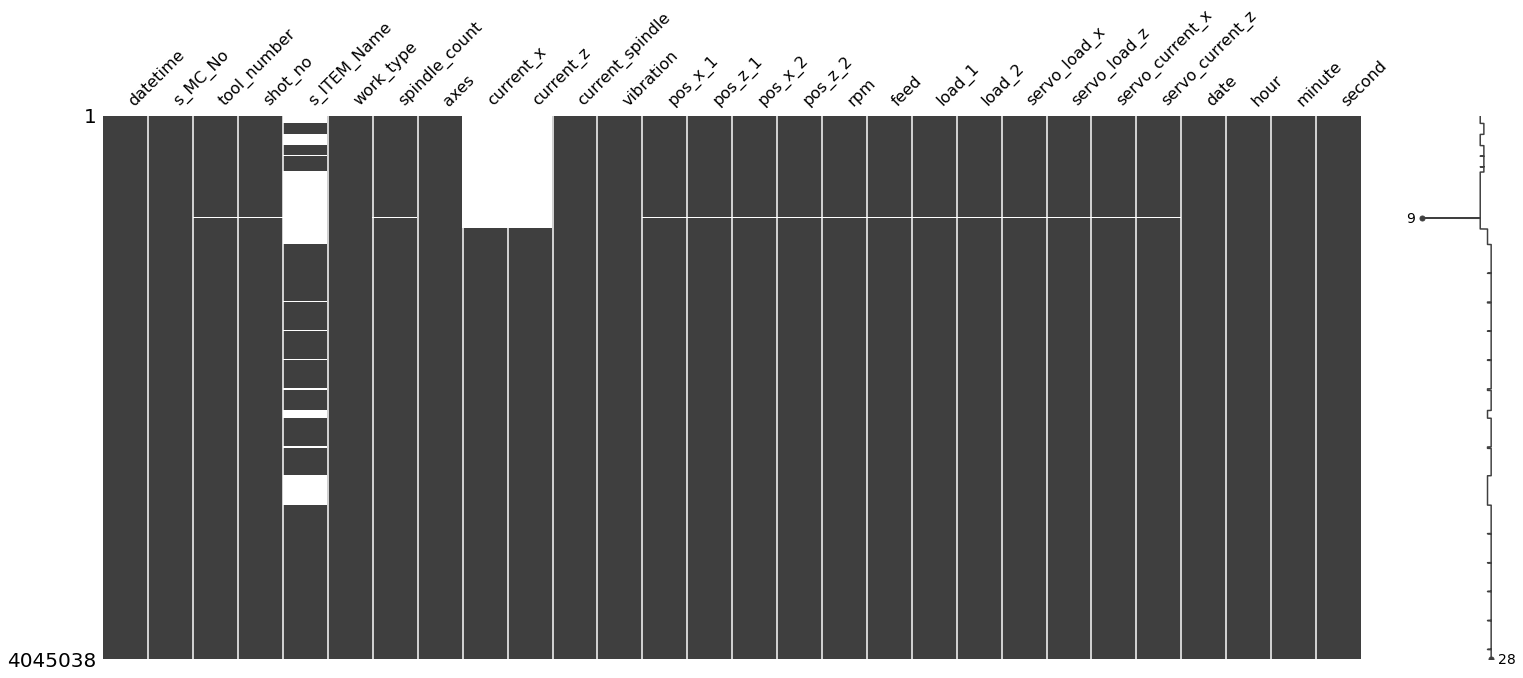

In [12]:
msno.matrix(df_VL04_mod1)

<AxesSubplot:>

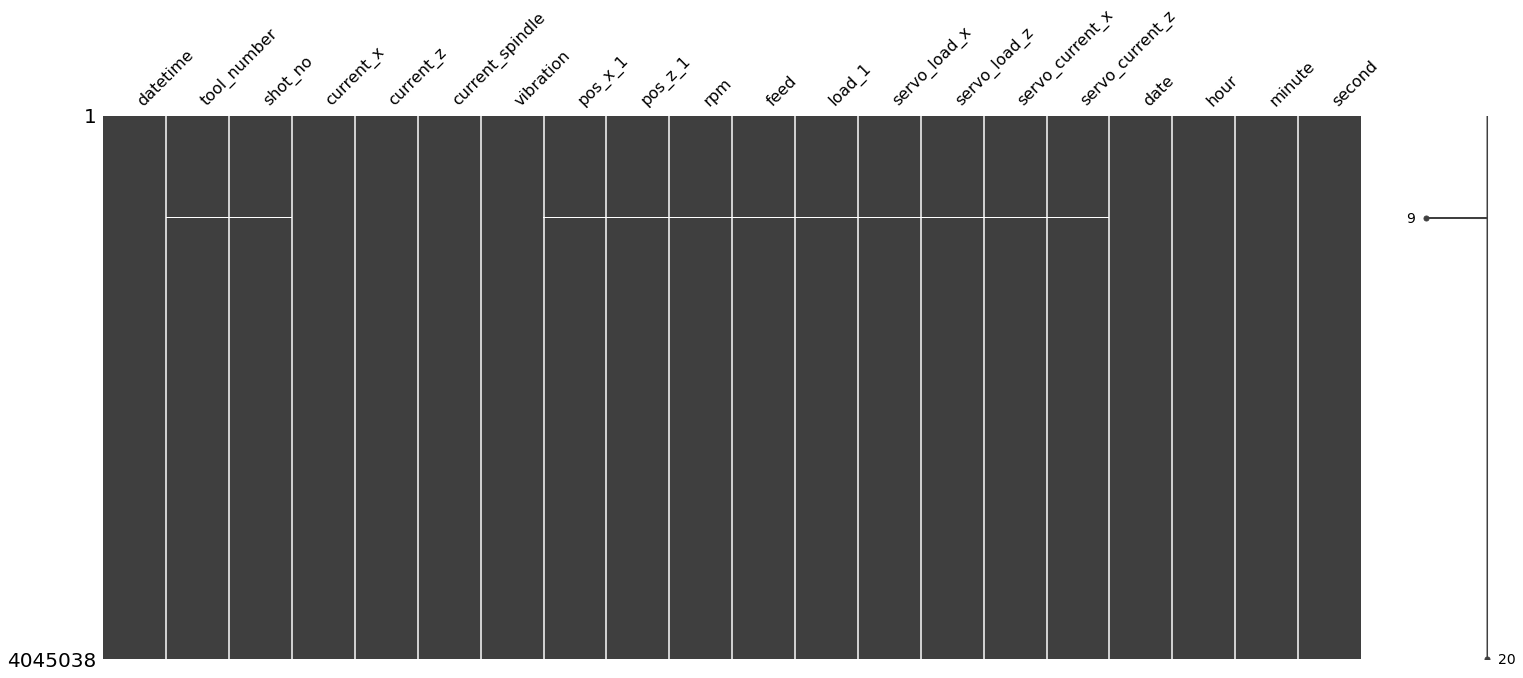

In [13]:
# current_X,Z에 대한 결측치 값, 결측치가 많은 시점에 대한 값 처리
# 필요없는 컬럼 삭제
df_VL04_mod2 = df_VL04_mod1.drop(['s_MC_No', 's_ITEM_Name', 'work_type', 'spindle_count', 'axes', 'pos_x_2', 'pos_z_2', 'load_2'], axis = 1)
df_VL04_mod2['current_x'] = df_VL04_mod2['current_x'].fillna(0)
df_VL04_mod2['current_z'] = df_VL04_mod2['current_z'].fillna(0)
msno.matrix(df_VL04_mod2)

In [14]:
df_VL04_mod2.isnull().sum()

datetime              0
tool_number        1802
shot_no            1596
current_x             0
current_z             0
current_spindle       0
vibration             0
pos_x_1            1465
pos_z_1            1465
rpm                1465
feed               1465
load_1             1999
servo_load_x       1907
servo_load_z       1907
servo_current_x    1907
servo_current_z    1907
date                  0
hour                  0
minute                0
second                0
dtype: int64

In [15]:
len(df_VL04_mod2)

4045038

In [16]:
df_VL04_mod3 = df_VL04_mod2.dropna(axis = 0)

<AxesSubplot:>

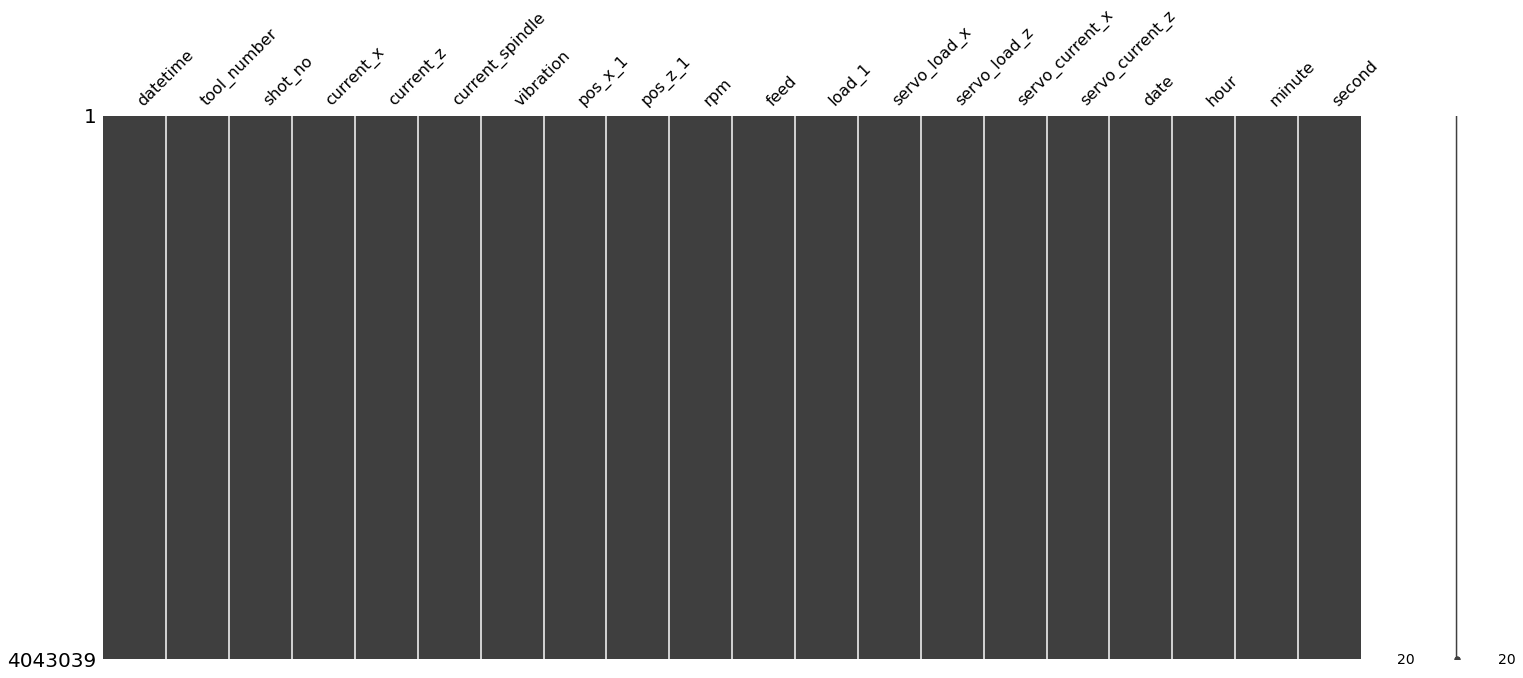

In [17]:
msno.matrix(df_VL04_mod3)

In [18]:
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043039 entries, 848031 to 1723085
Data columns (total 20 columns):
 #   Column           Dtype         
---  ------           -----         
 0   datetime         datetime64[ns]
 1   tool_number      float64       
 2   shot_no          float64       
 3   current_x        float64       
 4   current_z        float64       
 5   current_spindle  int64         
 6   vibration        int64         
 7   pos_x_1          float64       
 8   pos_z_1          float64       
 9   rpm              float64       
 10  feed             float64       
 11  load_1           float64       
 12  servo_load_x     float64       
 13  servo_load_z     float64       
 14  servo_current_x  float64       
 15  servo_current_z  float64       
 16  date             datetime64[ns]
 17  hour             int64         
 18  minute           int64         
 19  second           int64         
dtypes: datetime64[ns](2), float64(13), int64(5)
memory usage: 647.8

In [19]:
# nano second -> second로 변경
# nano second 값 평균값으로 대체
# groupby를 통해 초단위로 변경
# df_VL04_mod3 = df_VL04_mod1.resample('s').mean()
df_VL04_mod3 = df_VL04_mod3.groupby(['date', 'hour', 'minute', 'second', 'tool_number', 'shot_no']).mean()
df_VL04_mod3.reset_index(inplace=True)
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947236 entries, 0 to 947235
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             947236 non-null  datetime64[ns]
 1   hour             947236 non-null  int64         
 2   minute           947236 non-null  int64         
 3   second           947236 non-null  int64         
 4   tool_number      947236 non-null  float64       
 5   shot_no          947236 non-null  float64       
 6   current_x        947236 non-null  float64       
 7   current_z        947236 non-null  float64       
 8   current_spindle  947236 non-null  float64       
 9   vibration        947236 non-null  float64       
 10  pos_x_1          947236 non-null  float64       
 11  pos_z_1          947236 non-null  float64       
 12  rpm              947236 non-null  float64       
 13  feed             947236 non-null  float64       
 14  load_1           947

In [20]:
df_VL04_mod3['date'] = df_VL04_mod3['date'].astype('str')
df_VL04_mod3['hour'] = df_VL04_mod3['hour'].astype('str')
df_VL04_mod3['minute'] = df_VL04_mod3['minute'].astype('str')
df_VL04_mod3['second'] = df_VL04_mod3['second'].astype('str')
df_VL04_mod3['datetime'] = df_VL04_mod3['date'] + ' ' + df_VL04_mod3['hour']+ ':' + df_VL04_mod3['minute'] + ':' + df_VL04_mod3['second']
df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])

In [21]:
# tool_number 고유값 추출
list(df_VL04_mod3['tool_number'].unique())

[101.0,
 100.0,
 500.0,
 505.0,
 900.0,
 909.0,
 1100.0,
 1111.0,
 700.0,
 707.0,
 300.0,
 303.0,
 1199.0,
 399.0,
 199.0,
 799.0,
 999.0,
 599.0]

In [22]:
df_VL04_mod3.sort_values(['datetime'])

date hour minute second  tool_number  shot_no  current_x  \
0       2022-07-10    0      0      0        101.0   5774.0        0.0   
1       2022-07-10    0      0      1        101.0   5774.0        0.0   
2       2022-07-10    0      0      2        101.0   5774.0        0.0   
3       2022-07-10    0      0      3        101.0   5774.0        0.0   
4       2022-07-10    0      0      4        101.0   5774.0        0.0   
...            ...  ...    ...    ...          ...      ...        ...   
947231  2022-07-20   23     59     55        101.0   5989.0       31.2   
947232  2022-07-20   23     59     56        101.0   5989.0       31.2   
947233  2022-07-20   23     59     57        101.0   5989.0       31.0   
947234  2022-07-20   23     59     58        101.0   5989.0       31.6   
947235  2022-07-20   23     59     59        101.0   5989.0       31.2   

        current_z  current_spindle   vibration   pos_x_1   pos_z_1    rpm  \
0             0.0              0.0  200.000000  640000.0  483830.0    0.0   
1             0.0              0.0  201.500000  640000.0  483830.0    0.0   
2             0.0              0.0  199.000000  640000.0  483830.0    0.0   
3             0.0              0.0  199.666667  640000.0  483830.0    0.0   
4             0.0              0.0  201.500000  640000.0  483830.0    0.0   
...           ...              ...         ...       ...       ...    ...   
947231        2.0           2018.8   85.000000  528317.4    8250.0  299.6   
947232        2.0           2020.0   85.400000  526241.0    8250.0  299.2   
947233        2.0           2019.4   86.800000  523333.6    8250.0  299.4   
947234        2.0           2019.8   85.600000  520937.6    8250.0  299.2   
947235        2.0           2019.0   85.000000  518301.6    8250.0  299.2   

        feed  load_1  servo_load_x  servo_load_z  servo_current_x  \
0        0.0     0.0           3.5          70.5              3.5   
1        0.0     0.0           3.5          71.0              3.5   
2        0.0     0.0           4.0          71.0              4.0   
3        0.0     0.0           4.0          71.0              4.0   
4        0.0     0.0           3.5          71.0              3.5   
...      ...     ...           ...           ...              ...   
947231  75.0     0.4           9.6          60.0             -9.6   
947232  75.0     0.8          10.0          60.0            -10.0   
947233  75.0     0.8          10.0          60.6            -10.0   
947234  75.0     0.6          10.0          61.0            -10.0   
947235  75.0     0.6           9.6          60.6             -9.6   

        servo_current_z            datetime  
0                 -70.5 2022-07-10 00:00:00  
1                 -71.0 2022-07-10 00:00:01  
2                 -71.0 2022-07-10 00:00:02  
3                 -71.0 2022-07-10 00:00:03  
4                 -71.0 2022-07-10 00:00:04  
...                 ...                 ...  
947231            -60.0 2022-07-20 23:59:55  
947232            -60.0 2022-07-20 23:59:56  
947233            -60.6 2022-07-20 23:59:57  
947234            -61.0 2022-07-20 23:59:58  
947235            -60.6 2022-07-20 23:59:59  

[947236 rows x 20 columns]

In [23]:
# tool 번호 및 상태 생성
tool_number_list = list(df_VL04_mod3['tool_number'].unique())
tool_list = [1,1,5,5,9,9,11,11,7,7,3,3,11,3,1,7,9,5]
tool_state = ['가공', '취소', '취소', '가공', '취소', '가공', '취소', '가공', '취소', '가공', '취소', '가공', '종료', '종료', '종료', '종료', '종료', '종료']
df_VL04_mod3['tool'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_list)
df_VL04_mod3['tool'] = df_VL04_mod3['tool'].astype('int64')
df_VL04_mod3['tool_state'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_state)
df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])
df_VL04_mod3 = df_VL04_mod3.sort_values(['datetime'])
df_VL04_mod3 = df_VL04_mod3.set_index('datetime')
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 947236 entries, 2022-07-10 00:00:00 to 2022-07-20 23:59:59
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             947236 non-null  object 
 1   hour             947236 non-null  object 
 2   minute           947236 non-null  object 
 3   second           947236 non-null  object 
 4   tool_number      947236 non-null  float64
 5   shot_no          947236 non-null  float64
 6   current_x        947236 non-null  float64
 7   current_z        947236 non-null  float64
 8   current_spindle  947236 non-null  float64
 9   vibration        947236 non-null  float64
 10  pos_x_1          947236 non-null  float64
 11  pos_z_1          947236 non-null  float64
 12  rpm              947236 non-null  float64
 13  feed             947236 non-null  float64
 14  load_1           947236 non-null  float64
 15  servo_load_x     947236 non-null  float64
 16  serv

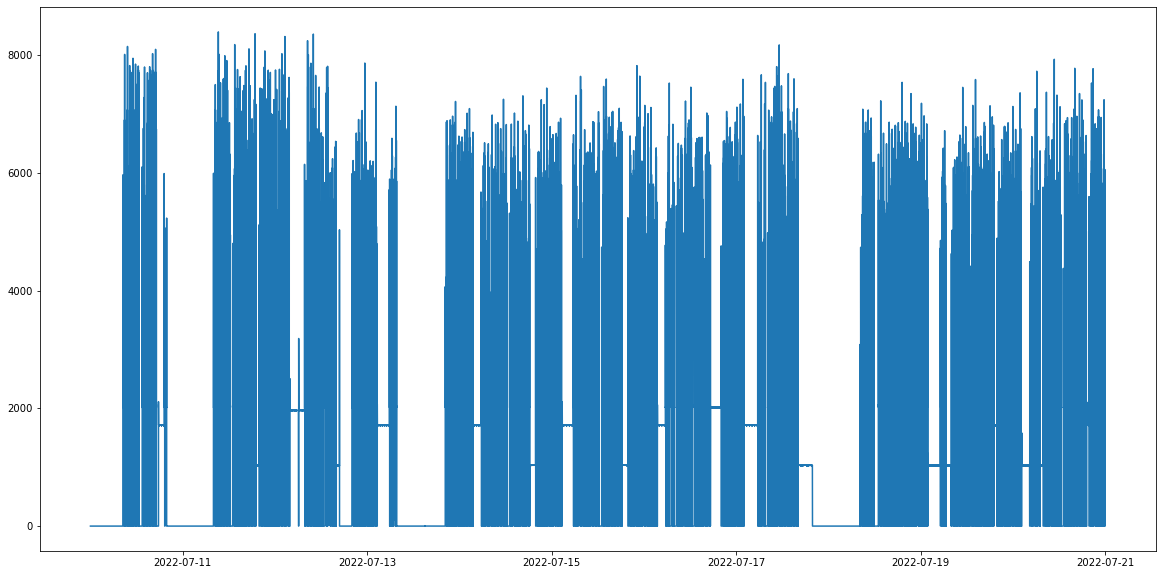

In [24]:
plt.figure(figsize = (20, 10))
plt.plot(df_VL04_mod3['current_spindle'])

7일간의 데이터로 초단위로 데이터 수집
초단위 인덱스가 모두 존재하는지 파악이 필요함
7일을 초단위로 환산할 경우 604800초이며, 위의 인덱스 값을 확인하였을때 607141로
약 2341개의 인덱스가 더 존재함

[ 1  5  9 11  7  3]


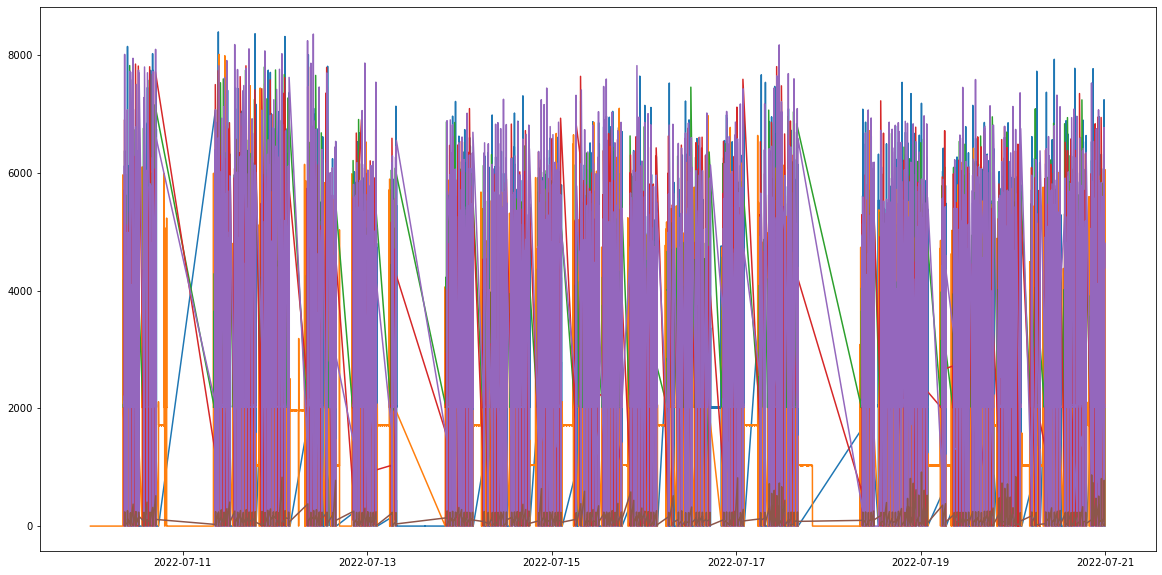

In [25]:
# Tool별 분리
print(df_VL04_mod3['tool'].unique())

for tool_idx in list(df_VL04_mod3['tool'].unique()):
    globals()['df_VL04_Tool{}'.format(tool_idx)] = df_VL04_mod3[df_VL04_mod3['tool'] == tool_idx]

plt.figure(figsize = (20, 10))
plt.plot(df_VL04_Tool7['current_spindle'])
plt.plot(df_VL04_Tool1['current_spindle'])
plt.plot(df_VL04_Tool5['current_spindle'])
plt.plot(df_VL04_Tool9['current_spindle'])
plt.plot(df_VL04_Tool11['current_spindle'])
plt.plot(df_VL04_Tool3['current_spindle'])

In [26]:
df_VL04_mod3['current_x']

datetime
2022-07-10 00:00:00     0.0
2022-07-10 00:00:01     0.0
2022-07-10 00:00:02     0.0
2022-07-10 00:00:03     0.0
2022-07-10 00:00:04     0.0
                       ... 
2022-07-20 23:59:55    31.2
2022-07-20 23:59:56    31.2
2022-07-20 23:59:57    31.0
2022-07-20 23:59:58    31.6
2022-07-20 23:59:59    31.2
Name: current_x, Length: 947236, dtype: float64

In [27]:
df_VL04_mod3['current_z']

datetime
2022-07-10 00:00:00    0.0
2022-07-10 00:00:01    0.0
2022-07-10 00:00:02    0.0
2022-07-10 00:00:03    0.0
2022-07-10 00:00:04    0.0
                      ... 
2022-07-20 23:59:55    2.0
2022-07-20 23:59:56    2.0
2022-07-20 23:59:57    2.0
2022-07-20 23:59:58    2.0
2022-07-20 23:59:59    2.0
Name: current_z, Length: 947236, dtype: float64

In [28]:
df_VL04_mod3

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 00:00:00  2022-07-10    0      0      0        101.0   5774.0   
2022-07-10 00:00:01  2022-07-10    0      0      1        101.0   5774.0   
2022-07-10 00:00:02  2022-07-10    0      0      2        101.0   5774.0   
2022-07-10 00:00:03  2022-07-10    0      0      3        101.0   5774.0   
2022-07-10 00:00:04  2022-07-10    0      0      4        101.0   5774.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:59:55  2022-07-20   23     59     55        101.0   5989.0   
2022-07-20 23:59:56  2022-07-20   23     59     56        101.0   5989.0   
2022-07-20 23:59:57  2022-07-20   23     59     57        101.0   5989.0   
2022-07-20 23:59:58  2022-07-20   23     59     58        101.0   5989.0   
2022-07-20 23:59:59  2022-07-20   23     59     59        101.0   5989.0   

                     current_x  current_z  current_spindle   vibration  \
datetime                                                                 
2022-07-10 00:00:00        0.0        0.0              0.0  200.000000   
2022-07-10 00:00:01        0.0        0.0              0.0  201.500000   
2022-07-10 00:00:02        0.0        0.0              0.0  199.000000   
2022-07-10 00:00:03        0.0        0.0              0.0  199.666667   
2022-07-10 00:00:04        0.0        0.0              0.0  201.500000   
...                        ...        ...              ...         ...   
2022-07-20 23:59:55       31.2        2.0           2018.8   85.000000   
2022-07-20 23:59:56       31.2        2.0           2020.0   85.400000   
2022-07-20 23:59:57       31.0        2.0           2019.4   86.800000   
2022-07-20 23:59:58       31.6        2.0           2019.8   85.600000   
2022-07-20 23:59:59       31.2        2.0           2019.0   85.000000   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-10 00:00:00  640000.0  483830.0    0.0   0.0     0.0           3.5   
2022-07-10 00:00:01  640000.0  483830.0    0.0   0.0     0.0           3.5   
2022-07-10 00:00:02  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-10 00:00:03  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-10 00:00:04  640000.0  483830.0    0.0   0.0     0.0           3.5   
...                       ...       ...    ...   ...     ...           ...   
2022-07-20 23:59:55  528317.4    8250.0  299.6  75.0     0.4           9.6   
2022-07-20 23:59:56  526241.0    8250.0  299.2  75.0     0.8          10.0   
2022-07-20 23:59:57  523333.6    8250.0  299.4  75.0     0.8          10.0   
2022-07-20 23:59:58  520937.6    8250.0  299.2  75.0     0.6          10.0   
2022-07-20 23:59:59  518301.6    8250.0  299.2  75.0     0.6           9.6   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 00:00:00          70.5              3.5            -70.5     1   
2022-07-10 00:00:01          71.0              3.5            -71.0     1   
2022-07-10 00:00:02          71.0              4.0            -71.0     1   
2022-07-10 00:00:03          71.0              4.0            -71.0     1   
2022-07-10 00:00:04          71.0              3.5            -71.0     1   
...                           ...              ...              ...   ...   
2022-07-20 23:59:55          60.0             -9.6            -60.0     1   
2022-07-20 23:59:56          60.0            -10.0            -60.0     1   
2022-07-20 23:59:57          60.6            -10.0            -60.6     1   
2022-07-20 23:59:58          61.0            -10.0            -61.0     1   
2022-07-20 23:59:59          60.6             -9.6            -60.6     1   

                    tool_state  
datetime                 

In [29]:
df_VL04_mod3['shot_no'].unique()

array([5774., 5775., 5776., 5777., 5778., 5779., 5780., 5781., 5782.,
       5783., 5784., 5785., 5786., 5787., 5788., 5789., 5790., 5791.,
       5792., 5793., 5794., 5795., 5796., 5797., 5798., 5799., 5800.,
       5801., 5802., 5803., 5804., 5805., 5806., 5807., 5808., 5809.,
       5810., 5811., 5812., 5813., 5814., 5815., 5816., 5817., 5818.,
       5819., 5820., 5821., 5822., 5823., 5824., 5825., 5826., 5827.,
       5828., 5829., 5830., 5831., 5832., 5833., 5834., 5835., 5836.,
       5837., 5838., 5839., 5840., 5841., 5842., 5843., 5844., 5845.,
       5846., 5847., 5848., 5849., 5850., 5851., 5852., 5853., 5854.,
       5855., 5856., 5857., 5858., 5859., 5860., 5861., 5862., 5863.,
       5864., 5865., 5866., 5867., 5868., 5869., 5870., 5871., 5872.,
       5873., 5874., 5875., 5876., 5877., 5878., 5879., 5880., 5881.,
       5882., 5883., 5884., 5885., 5886., 5887., 5888., 5889., 5890.,
       5891., 5892., 5893., 5894., 5895., 5896., 5897., 5898., 5899.,
       5900., 5901.,

In [30]:
list_date = df_VL04_mod3['date'].unique()
sum_quantity = []
total_date = []
for date_idx in list_date:
    globals()['date_{}'.format(date_idx)] = len(df_VL04_mod3[df_VL04_mod3['date'] == date_idx]['shot_no'].unique())
    sum_quantity.append(globals()['date_{}'.format(date_idx)])
    total_date.append(date_idx)
    print('{} 일자의 생산개수(shot기준)는 {}입니다.'.format(date_idx, globals()['date_{}'.format(date_idx)]))
print('총 {}일 간의 일평균 생산개수는 {:.2f}개 입니다.'.format(len(total_date), np.mean(sum_quantity)))

2022-07-10 일자의 생산개수(shot기준)는 13입니다.
2022-07-11 일자의 생산개수(shot기준)는 18입니다.
2022-07-12 일자의 생산개수(shot기준)는 22입니다.
2022-07-13 일자의 생산개수(shot기준)는 12입니다.
2022-07-14 일자의 생산개수(shot기준)는 26입니다.
2022-07-15 일자의 생산개수(shot기준)는 25입니다.
2022-07-16 일자의 생산개수(shot기준)는 23입니다.
2022-07-17 일자의 생산개수(shot기준)는 18입니다.
2022-07-18 일자의 생산개수(shot기준)는 19입니다.
2022-07-19 일자의 생산개수(shot기준)는 24입니다.
2022-07-20 일자의 생산개수(shot기준)는 26입니다.
총 11일 간의 일평균 생산개수는 20.55개 입니다.


In [31]:
df_VL04_mod3.groupby('shot_no').mean()['current_spindle']==0

shot_no
5774.0    False
5775.0    False
5776.0    False
5777.0    False
5778.0    False
          ...  
5985.0    False
5986.0    False
5987.0    False
5988.0    False
5989.0    False
Name: current_spindle, Length: 216, dtype: bool

<AxesSubplot:xlabel='shot_no'>

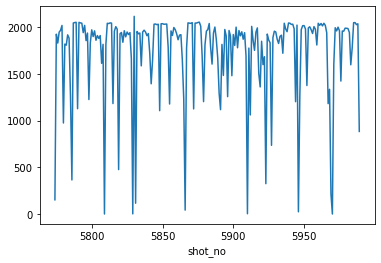

In [32]:
df_VL04_mod3.groupby('shot_no').mean()['current_spindle'].plot()

# Shot5972 Tool 순서
Shot5972의 경우 Tool7 -> Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool11(정삭) -> Tool7(정삭) -> Tool3(정삭) 순으로 생산이 수행되고 있음

[5774. 5775. 5776. 5777. 5778. 5779. 5780. 5781. 5782. 5783. 5784. 5785.
 5786. 5787. 5788. 5789. 5790. 5791. 5792. 5793. 5794. 5795. 5796. 5797.
 5798. 5799. 5800. 5801. 5802. 5803. 5804. 5805. 5806. 5807. 5808. 5809.
 5810. 5811. 5812. 5813. 5814. 5815. 5816. 5817. 5818. 5819. 5820. 5821.
 5822. 5823. 5824. 5825. 5826. 5827. 5828. 5829. 5830. 5831. 5832. 5833.
 5834. 5835. 5836. 5837. 5838. 5839. 5840. 5841. 5842. 5843. 5844. 5845.
 5846. 5847. 5848. 5849. 5850. 5851. 5852. 5853. 5854. 5855. 5856. 5857.
 5858. 5859. 5860. 5861. 5862. 5863. 5864. 5865. 5866. 5867. 5868. 5869.
 5870. 5871. 5872. 5873. 5874. 5875. 5876. 5877. 5878. 5879. 5880. 5881.
 5882. 5883. 5884. 5885. 5886. 5887. 5888. 5889. 5890. 5891. 5892. 5893.
 5894. 5895. 5896. 5897. 5898. 5899. 5900. 5901. 5902. 5903. 5904. 5905.
 5906. 5907. 5908. 5909. 5910. 5911. 5912. 5913. 5914. 5915. 5916. 5917.
 5918. 5919. 5920. 5921. 5922. 5923. 5924. 5925. 5926. 5927. 5928. 5929.
 5930. 5931. 5932. 5933. 5934. 5935. 5936. 5937. 59

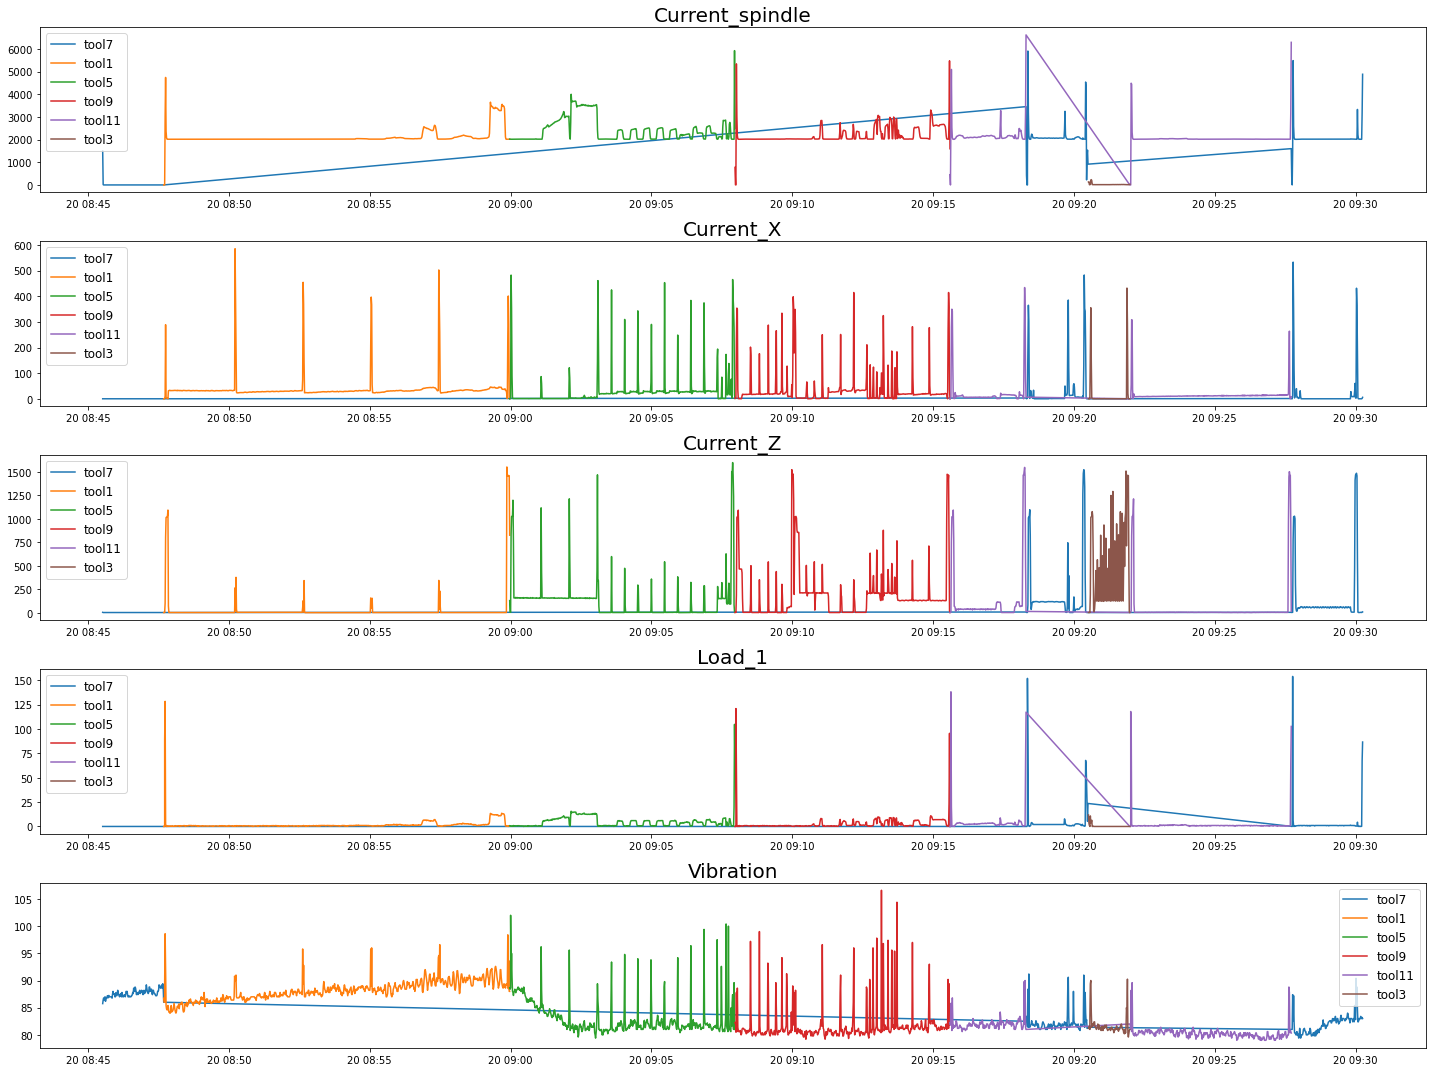

In [33]:
# 1개 shot에 대한 패턴 확인
print(df_VL04_mod3['shot_no'].unique())
Shot5972 = df_VL04_mod3[df_VL04_mod3['shot_no'] == 5972]
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(5,1,1)
plt.plot(Shot5972[Shot5972['tool']==7]['current_spindle'], label = 'tool7')
plt.plot(Shot5972[Shot5972['tool']==1]['current_spindle'], label = 'tool1')
plt.plot(Shot5972[Shot5972['tool']==5]['current_spindle'], label = 'tool5')
plt.plot(Shot5972[Shot5972['tool']==9]['current_spindle'], label = 'tool9')
plt.plot(Shot5972[Shot5972['tool']==11]['current_spindle'], label = 'tool11')
plt.plot(Shot5972[Shot5972['tool']==3]['current_spindle'], label = 'tool3')
ax1.set_title('Current_spindle', fontsize = 20)
plt.legend(fontsize = 12)

ax2 = fig.add_subplot(5,1,2)
ax2.plot(Shot5972[Shot5972['tool']==7]['current_x'], label = 'tool7')
ax2.plot(Shot5972[Shot5972['tool']==1]['current_x'], label = 'tool1')
ax2.plot(Shot5972[Shot5972['tool']==5]['current_x'], label = 'tool5')
ax2.plot(Shot5972[Shot5972['tool']==9]['current_x'], label = 'tool9')
ax2.plot(Shot5972[Shot5972['tool']==11]['current_x'], label = 'tool11')
ax2.plot(Shot5972[Shot5972['tool']==3]['current_x'], label = 'tool3')
ax2.set_title('Current_X', fontsize = 20)
ax2.legend(fontsize = 12)

ax3 = fig.add_subplot(5,1,3)
ax3.plot(Shot5972[Shot5972['tool']==7]['current_z'], label = 'tool7')
ax3.plot(Shot5972[Shot5972['tool']==1]['current_z'], label = 'tool1')
ax3.plot(Shot5972[Shot5972['tool']==5]['current_z'], label = 'tool5')
ax3.plot(Shot5972[Shot5972['tool']==9]['current_z'], label = 'tool9')
ax3.plot(Shot5972[Shot5972['tool']==11]['current_z'], label = 'tool11')
ax3.plot(Shot5972[Shot5972['tool']==3]['current_z'], label = 'tool3')
ax3.set_title('Current_Z', fontsize = 20)
ax3.legend(fontsize = 12)

ax4 = fig.add_subplot(5,1,4)
ax4.plot(Shot5972[Shot5972['tool']==7]['load_1'], label = 'tool7')
ax4.plot(Shot5972[Shot5972['tool']==1]['load_1'], label = 'tool1')
ax4.plot(Shot5972[Shot5972['tool']==5]['load_1'], label = 'tool5')
ax4.plot(Shot5972[Shot5972['tool']==9]['load_1'], label = 'tool9')
ax4.plot(Shot5972[Shot5972['tool']==11]['load_1'], label = 'tool11')
ax4.plot(Shot5972[Shot5972['tool']==3]['load_1'], label = 'tool3')
ax4.set_title('Load_1', fontsize = 20)
ax4.legend(fontsize = 12)

ax5 = fig.add_subplot(5,1,5)
ax5.plot(Shot5972[Shot5972['tool']==7]['vibration'], label = 'tool7')
ax5.plot(Shot5972[Shot5972['tool']==1]['vibration'], label = 'tool1')
ax5.plot(Shot5972[Shot5972['tool']==5]['vibration'], label = 'tool5')
ax5.plot(Shot5972[Shot5972['tool']==9]['vibration'], label = 'tool9')
ax5.plot(Shot5972[Shot5972['tool']==11]['vibration'], label = 'tool11')
ax5.plot(Shot5972[Shot5972['tool']==3]['vibration'], label = 'tool3')
ax5.set_title('Vibration', fontsize = 20)
ax5.legend(fontsize = 12)

fig.tight_layout()
plt.show()

1. Current spindle과 Load_1은 거의 같은 패턴이 나타나고 있음
2. Current X, Current Z와 진동이 거의 비슷한 패턴이 발생하고 있음

                 tool_number   shot_no  current_x  current_z  current_spindle  \
tool_number         1.000000  0.036492   0.019148   0.129825         0.171969   
shot_no             0.036492  1.000000   0.114355   0.110065         0.160878   
current_x           0.019148  0.114355   1.000000   0.420625         0.198986   
current_z           0.129825  0.110065   0.420625   1.000000         0.119756   
current_spindle     0.171969  0.160878   0.198986   0.119756         1.000000   
vibration          -0.079991 -0.719152  -0.136274  -0.140127        -0.198546   
pos_x_1            -0.417530 -0.124725  -0.125515  -0.191496        -0.601763   
pos_z_1            -0.068860 -0.209263  -0.099791  -0.082113        -0.805669   
rpm                 0.337731  0.164727   0.220827   0.146352         0.859682   
feed                0.061624  0.024004   0.481068   0.557373         0.080300   
load_1              0.081352  0.028768   0.022782   0.016459         0.327626   
servo_load_x       -0.168191

<AxesSubplot:>

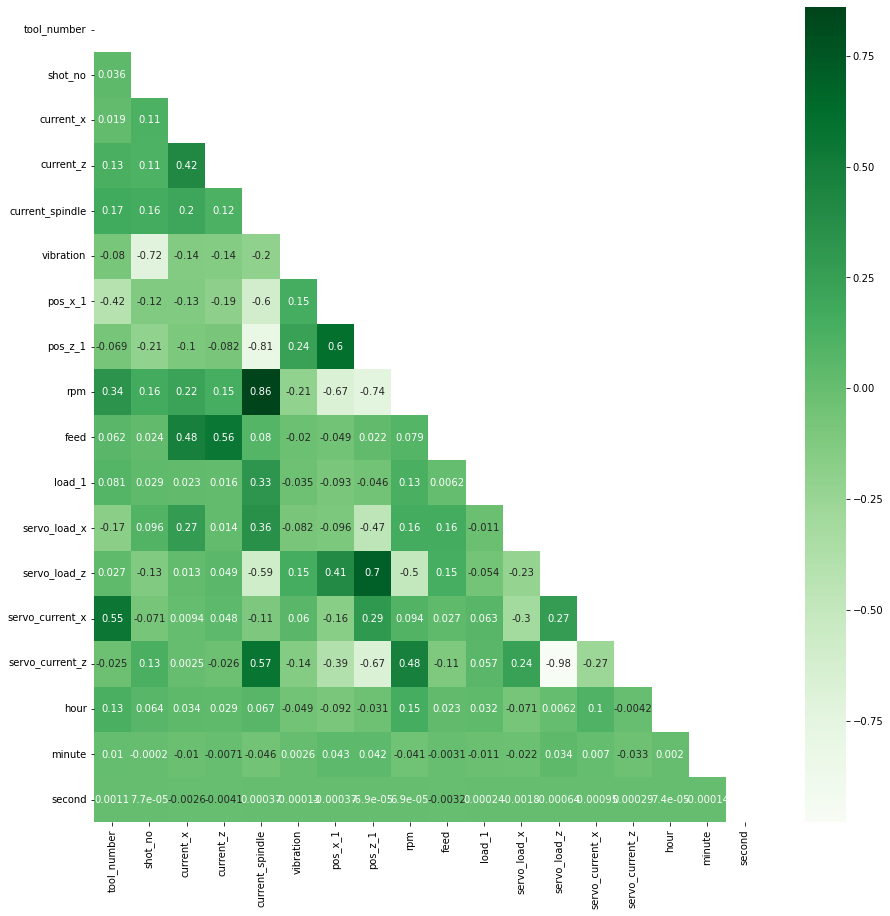

In [34]:
import seaborn as sns
VL04_corr = df_VL04_mod2.corr()
print(VL04_corr)

#삼각형 마스크 만들기
mask = np.zeros_like(VL04_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(VL04_corr, annot = True, cmap = 'Greens', mask = mask)

In [35]:
df_VL04_mod3[(df_VL04_mod3['shot_no'] == 5890)]

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-16 06:37:51  2022-07-16    6     37     51        707.0   5890.0   
2022-07-16 06:37:52  2022-07-16    6     37     52        707.0   5890.0   
2022-07-16 06:37:53  2022-07-16    6     37     53        707.0   5890.0   
2022-07-16 06:37:54  2022-07-16    6     37     54        707.0   5890.0   
2022-07-16 06:37:55  2022-07-16    6     37     55        707.0   5890.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-16 07:48:37  2022-07-16    7     48     37        707.0   5890.0   
2022-07-16 07:48:38  2022-07-16    7     48     38        707.0   5890.0   
2022-07-16 07:48:39  2022-07-16    7     48     39        707.0   5890.0   
2022-07-16 07:48:40  2022-07-16    7     48     40        707.0   5890.0   
2022-07-16 07:48:41  2022-07-16    7     48     41        707.0   5890.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-16 06:37:51   2.333333   4.000000      1717.000000  85.000000   
2022-07-16 06:37:52   0.000000   4.000000        18.500000  85.833333   
2022-07-16 06:37:53   0.000000   2.800000         0.000000  85.800000   
2022-07-16 06:37:54   0.000000   4.000000         0.000000  86.000000   
2022-07-16 06:37:55   0.000000   4.000000         0.000000  85.400000   
...                        ...        ...              ...        ...   
2022-07-16 07:48:37   0.000000   4.000000      2018.400000  89.400000   
2022-07-16 07:48:38   0.000000   4.000000      2019.000000  89.200000   
2022-07-16 07:48:39   0.000000   4.000000      2019.000000  89.600000   
2022-07-16 07:48:40   1.400000   7.200000      4677.200000  90.600000   
2022-07-16 07:48:41   4.666667   6.666667      5840.333333  91.666667   

                           pos_x_1        pos_z_1         rpm  feed  load_1  \
datetime                                                                      
2022-07-16 06:37:51  668946.666667  413356.666667    1.333333   0.0     0.0   
2022-07-16 06:37:52  640000.000000  483830.000000    0.000000   0.0     0.0   
2022-07-16 06:37:53  640000.000000  483830.000000    0.000000   0.0     0.0   
2022-07-16 06:37:54  640000.000000  483830.000000    0.000000   0.0     0.0   
2022-07-16 06:37:55  640000.000000  483830.000000    0.000000   0.0     0.0   
...                            ...            ...         ...   ...     ...   
2022-07-16 07:48:37  683420.000000  378120.000000  299.400000   0.0     0.4   
2022-07-16 07:48:38  683420.000000  378120.000000  299.000000   0.0     0.0   
2022-07-16 07:48:39  683420.000000  378120.000000  299.000000   0.0     0.6   
2022-07-16 07:48:40  683420.000000  378120.000000  248.800000   0.0    90.8   
2022-07-16 07:48:41  683420.000000  378120.000000   61.666667   0.0    80.0   

                     servo_load_x  servo_load_z  servo_current_x  \
datetime                                                           
2022-07-16 06:37:51      4.000000          73.0         4.000000   
2022-07-16 06:37:52      4.000000          73.0         4.000000   
2022-07-16 06:37:53      4.000000          73.2         4.000000   
2022-07-16 06:37:54      4.000000          73.0         4.000000   
2022-07-16 06:37:55      4.000000          73.4         4.000000   
...                           ...           ...              ...   
2022-07-16 07:48:37      4.000000          73.8         4.000000   
2022-07-16 07:48:38      4.000000          73.6         4.000000   
2022-07-16 07:48:39      4.000000          73.4         4.000000   
2022-07-16 07:48:40      4.000000          73.4         4.000000   
2022-07-16 07:48:41      3.333333          73.0         3.333333   

                     servo_current_z  tool tool_state  
datetime                                               
2022-07-16 06:37:51            -73.0     7         가공  
2022-07

# 3개 연속 Shot5836 Tool 순서 확인
Shot 5888. 5889. 5890에 대하여 확인 

[5774. 5775. 5776. 5777. 5778. 5779. 5780. 5781. 5782. 5783. 5784. 5785.
 5786. 5787. 5788. 5789. 5790. 5791. 5792. 5793. 5794. 5795. 5796. 5797.
 5798. 5799. 5800. 5801. 5802. 5803. 5804. 5805. 5806. 5807. 5808. 5809.
 5810. 5811. 5812. 5813. 5814. 5815. 5816. 5817. 5818. 5819. 5820. 5821.
 5822. 5823. 5824. 5825. 5826. 5827. 5828. 5829. 5830. 5831. 5832. 5833.
 5834. 5835. 5836. 5837. 5838. 5839. 5840. 5841. 5842. 5843. 5844. 5845.
 5846. 5847. 5848. 5849. 5850. 5851. 5852. 5853. 5854. 5855. 5856. 5857.
 5858. 5859. 5860. 5861. 5862. 5863. 5864. 5865. 5866. 5867. 5868. 5869.
 5870. 5871. 5872. 5873. 5874. 5875. 5876. 5877. 5878. 5879. 5880. 5881.
 5882. 5883. 5884. 5885. 5886. 5887. 5888. 5889. 5890. 5891. 5892. 5893.
 5894. 5895. 5896. 5897. 5898. 5899. 5900. 5901. 5902. 5903. 5904. 5905.
 5906. 5907. 5908. 5909. 5910. 5911. 5912. 5913. 5914. 5915. 5916. 5917.
 5918. 5919. 5920. 5921. 5922. 5923. 5924. 5925. 5926. 5927. 5928. 5929.
 5930. 5931. 5932. 5933. 5934. 5935. 5936. 5937. 59

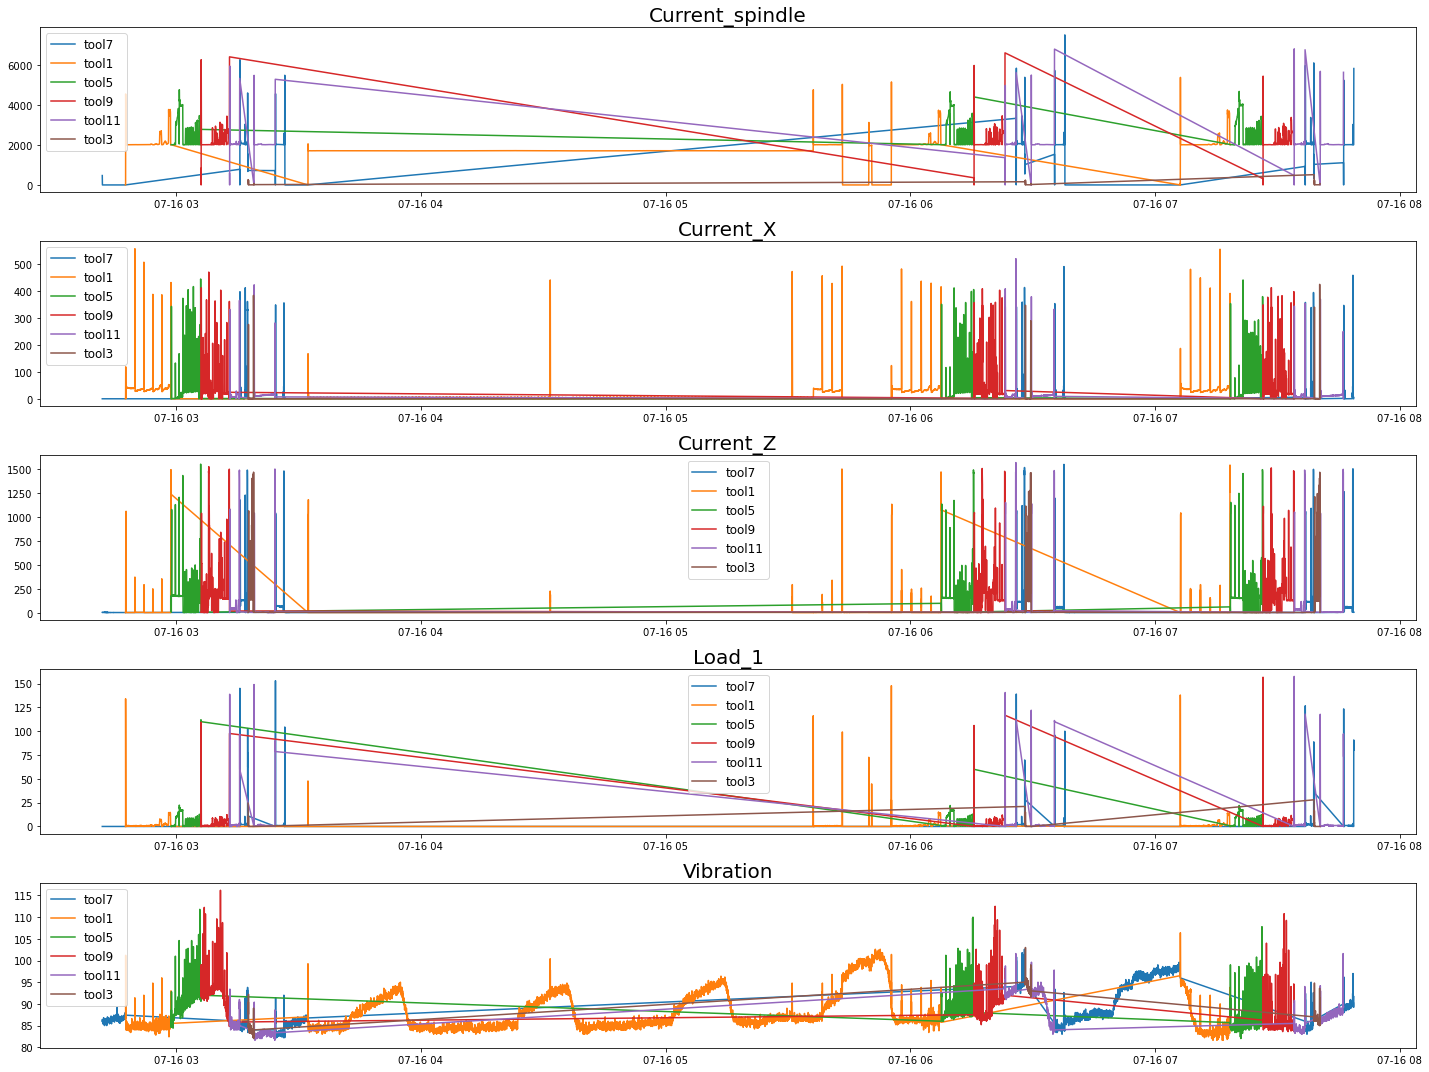

In [36]:
# 1개 shot에 대한 패턴 확인
print(df_VL04_mod3['shot_no'].unique())
Shot5888_3 = df_VL04_mod3[(df_VL04_mod3['shot_no'] == 5888) | (df_VL04_mod3['shot_no'] == 5889) | (df_VL04_mod3['shot_no'] == 5890)]
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(5,1,1)
plt.plot(Shot5888_3[Shot5888_3['tool']==7]['current_spindle'], label = 'tool7')
plt.plot(Shot5888_3[Shot5888_3['tool']==1]['current_spindle'], label = 'tool1')
plt.plot(Shot5888_3[Shot5888_3['tool']==5]['current_spindle'], label = 'tool5')
plt.plot(Shot5888_3[Shot5888_3['tool']==9]['current_spindle'], label = 'tool9')
plt.plot(Shot5888_3[Shot5888_3['tool']==11]['current_spindle'], label = 'tool11')
plt.plot(Shot5888_3[Shot5888_3['tool']==3]['current_spindle'], label = 'tool3')
ax1.set_title('Current_spindle', fontsize = 20)
plt.legend(fontsize = 12)

ax2 = fig.add_subplot(5,1,2)
ax2.plot(Shot5888_3[Shot5888_3['tool']==7]['current_x'], label = 'tool7')
ax2.plot(Shot5888_3[Shot5888_3['tool']==1]['current_x'], label = 'tool1')
ax2.plot(Shot5888_3[Shot5888_3['tool']==5]['current_x'], label = 'tool5')
ax2.plot(Shot5888_3[Shot5888_3['tool']==9]['current_x'], label = 'tool9')
ax2.plot(Shot5888_3[Shot5888_3['tool']==11]['current_x'], label = 'tool11')
ax2.plot(Shot5888_3[Shot5888_3['tool']==3]['current_x'], label = 'tool3')
ax2.set_title('Current_X', fontsize = 20)
ax2.legend(fontsize = 12)

ax3 = fig.add_subplot(5,1,3)
ax3.plot(Shot5888_3[Shot5888_3['tool']==7]['current_z'], label = 'tool7')
ax3.plot(Shot5888_3[Shot5888_3['tool']==1]['current_z'], label = 'tool1')
ax3.plot(Shot5888_3[Shot5888_3['tool']==5]['current_z'], label = 'tool5')
ax3.plot(Shot5888_3[Shot5888_3['tool']==9]['current_z'], label = 'tool9')
ax3.plot(Shot5888_3[Shot5888_3['tool']==11]['current_z'], label = 'tool11')
ax3.plot(Shot5888_3[Shot5888_3['tool']==3]['current_z'], label = 'tool3')
ax3.set_title('Current_Z', fontsize = 20)
ax3.legend(fontsize = 12)

ax4 = fig.add_subplot(5,1,4)
ax4.plot(Shot5888_3[Shot5888_3['tool']==7]['load_1'], label = 'tool7')
ax4.plot(Shot5888_3[Shot5888_3['tool']==1]['load_1'], label = 'tool1')
ax4.plot(Shot5888_3[Shot5888_3['tool']==5]['load_1'], label = 'tool5')
ax4.plot(Shot5888_3[Shot5888_3['tool']==9]['load_1'], label = 'tool9')
ax4.plot(Shot5888_3[Shot5888_3['tool']==11]['load_1'], label = 'tool11')
ax4.plot(Shot5888_3[Shot5888_3['tool']==3]['load_1'], label = 'tool3')
ax4.set_title('Load_1', fontsize = 20)
ax4.legend(fontsize = 12)

ax5 = fig.add_subplot(5,1,5)
ax5.plot(Shot5888_3[Shot5888_3['tool']==7]['vibration'], label = 'tool7')
ax5.plot(Shot5888_3[Shot5888_3['tool']==1]['vibration'], label = 'tool1')
ax5.plot(Shot5888_3[Shot5888_3['tool']==5]['vibration'], label = 'tool5')
ax5.plot(Shot5888_3[Shot5888_3['tool']==9]['vibration'], label = 'tool9')
ax5.plot(Shot5888_3[Shot5888_3['tool']==11]['vibration'], label = 'tool11')
ax5.plot(Shot5888_3[Shot5888_3['tool']==3]['vibration'], label = 'tool3')
ax5.set_title('Vibration', fontsize = 20)
ax5.legend(fontsize = 12)

fig.tight_layout()
plt.show()

# 3 shot Tool 순서
Tool7(미세하게) -> Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool11(정삭) -> Tool7(정삭) -> Tool3(정삭) 순으로 생산이 수행되고 있음
shot5836과 같은 순서로 이루어지고 있음

# 공구별 교체 이력 정보
1. Tool1 : 2022-07-10 9:36, 2022-07-18 10:56
2. Tool5 : 2022-07-10 9:36, 2022-07-18 10:56, 2022-07-20 5:55 교체
3. Tool9 : 2022-07-10 9:36, 2022-07-15 15:23, 2022-07-18 10:56 교체
4. Tool11 : 교체정보 없음
5. Tool7 : 2022-07-14 10:51 교체

In [37]:
df_VL04_mod3.loc['2022-07-10 09:36:10':'2022-07-10 09:38:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 09:36:10  2022-07-10    9     36     10       1111.0   5775.0   
2022-07-10 09:36:11  2022-07-10    9     36     11       1111.0   5775.0   
2022-07-10 09:36:12  2022-07-10    9     36     12       1111.0   5775.0   
2022-07-10 09:36:13  2022-07-10    9     36     13       1111.0   5775.0   
2022-07-10 09:36:14  2022-07-10    9     36     14       1111.0   5775.0   
2022-07-10 09:36:15  2022-07-10    9     36     15       1111.0   5775.0   
2022-07-10 09:36:16  2022-07-10    9     36     16       1111.0   5775.0   
2022-07-10 09:36:17  2022-07-10    9     36     17       1111.0   5775.0   
2022-07-10 09:36:18  2022-07-10    9     36     18       1111.0   5775.0   
2022-07-10 09:36:19  2022-07-10    9     36     19       1111.0   5775.0   
2022-07-10 09:36:20  2022-07-10    9     36     20       1111.0   5775.0   
2022-07-10 09:36:21  2022-07-10    9     36     21       1111.0   5775.0   
2022-07-10 09:36:22  2022-07-10    9     36     22       1111.0   5775.0   
2022-07-10 09:36:23  2022-07-10    9     36     23       1111.0   5775.0   
2022-07-10 09:36:24  2022-07-10    9     36     24       1111.0   5775.0   
2022-07-10 09:36:25  2022-07-10    9     36     25       1111.0   5775.0   
2022-07-10 09:36:26  2022-07-10    9     36     26       1111.0   5775.0   
2022-07-10 09:36:27  2022-07-10    9     36     27       1111.0   5775.0   
2022-07-10 09:36:28  2022-07-10    9     36     28       1111.0   5775.0   
2022-07-10 09:36:29  2022-07-10    9     36     29       1111.0   5775.0   
2022-07-10 09:36:30  2022-07-10    9     36     30       1111.0   5775.0   
2022-07-10 09:36:31  2022-07-10    9     36     31       1111.0   5775.0   
2022-07-10 09:36:32  2022-07-10    9     36     32       1111.0   5775.0   
2022-07-10 09:36:33  2022-07-10    9     36     33       1111.0   5775.0   
2022-07-10 09:36:34  2022-07-10    9     36     34       1111.0   5775.0   
2022-07-10 09:36:35  2022-07-10    9     36     35       1111.0   5775.0   
2022-07-10 09:36:36  2022-07-10    9     36     36       1111.0   5775.0   
2022-07-10 09:36:37  2022-07-10    9     36     37       1111.0   5775.0   
2022-07-10 09:36:38  2022-07-10    9     36     38       1111.0   5775.0   
2022-07-10 09:36:39  2022-07-10    9     36     39       1111.0   5775.0   
2022-07-10 09:36:40  2022-07-10    9     36     40       1111.0   5775.0   
2022-07-10 09:36:41  2022-07-10    9     36     41       1111.0   5775.0   
2022-07-10 09:36:42  2022-07-10    9     36     42       1111.0   5775.0   
2022-07-10 09:36:43  2022-07-10    9     36     43       1111.0   5775.0   
2022-07-10 09:36:44  2022-07-10    9     36     44       1111.0   5775.0   
2022-07-10 09:36:45  2022-07-10    9     36     45       1111.0   5775.0   
2022-07-10 09:36:46  2022-07-10    9     36     46       1111.0   5775.0   
2022-07-10 09:36:47  2022-07-10    9     36     47       1111.0   5775.0   
2022-07-10 09:36:48  2022-07-10    9     36     48       1111.0   5775.0   
2022-07-10 09:36:49  2022-07-10    9     36     49       1111.0   5775.0   
2022-07-10 09:36:50  2022-07-10    9     36     50       1111.0   5775.0   
2022-07-10 09:36:51  2022-07-10    9     36     51       1111.0   5775.0   
2022-07-10 09:36:52  2022-07-10    9     36     52       1111.0   5775.0   
2022-07-10 09:36:53  2022-07-10    9     36     53       1111.0   5775.0   
2022-07-10 09:36:54  2022-07-10    9     36     54       1111.0   5775.0   
2022-07-10 09:36:55  2022-07-10    9     36     55       1111.0   5775.0   
2022-07-10 09:36:55  2022-07-10    9     36     55       1199.0   5775.0   
2022-07-10 09:36:56  2022-07-10    9     36     56       1111.0   5775.0   
2022-07-10 09:36:57  2022-07-10    9     36     57        700.0   5775.0   
2022-07-10 09:36:58  2022-07-10    9     36     58        700.0   5775.0   
2022-07-10 09:36:59  2022-07-10    9     36     59        700.0   5775.0   

# Tool9 시각화

<AxesSubplot:>

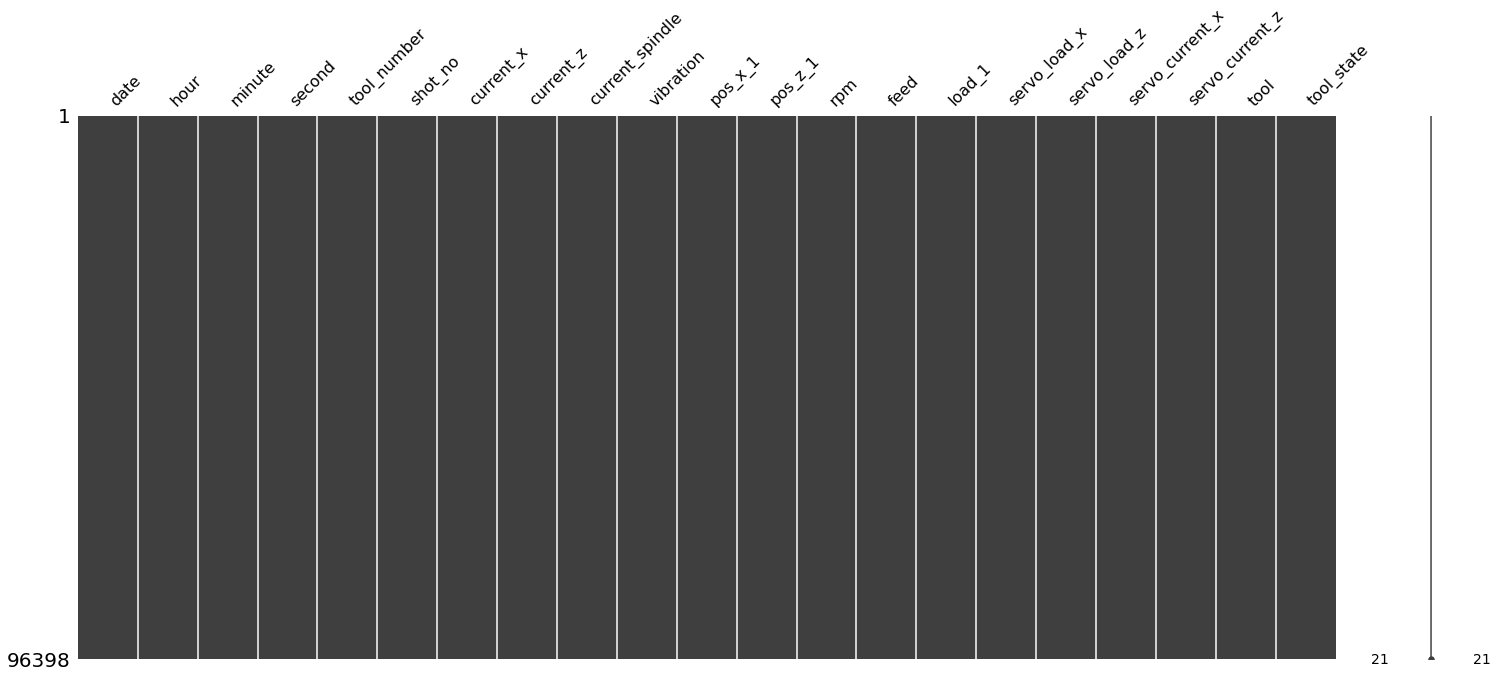

In [38]:
msno.matrix(df_VL04_Tool9)

In [39]:
df_VL04_Tool9.head()

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 08:44:33  2022-07-10    8     44     33        900.0   5774.0   
2022-07-10 08:44:34  2022-07-10    8     44     34        900.0   5774.0   
2022-07-10 08:44:35  2022-07-10    8     44     35        900.0   5774.0   
2022-07-10 08:44:35  2022-07-10    8     44     35        909.0   5774.0   
2022-07-10 08:44:36  2022-07-10    8     44     36        909.0   5774.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-10 08:44:33        0.0        0.0           2198.5      199.0   
2022-07-10 08:44:34        0.0        0.0             10.0      198.5   
2022-07-10 08:44:35        0.0        0.0              0.0      198.0   
2022-07-10 08:44:35        0.0        0.0            745.0      199.0   
2022-07-10 08:44:36        0.0        0.0           5707.0      198.0   

                      pos_x_1   pos_z_1    rpm     feed  load_1  servo_load_x  \
datetime                                                                        
2022-07-10 08:44:33  661770.0  441226.5   10.5      0.0     0.0           5.0   
2022-07-10 08:44:34  640000.0  483830.0    0.0  12000.0     0.0           4.0   
2022-07-10 08:44:35  640000.0  483830.0    0.0      0.0    39.0           5.0   
2022-07-10 08:44:35  595780.0  362160.0   10.0      0.0   161.0           0.0   
2022-07-10 08:44:36  573780.0  351160.0  237.0   3535.5    31.0          43.5   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 08:44:33          73.0              5.0            -73.0     9   
2022-07-10 08:44:34          73.0              4.0            -73.0     9   
2022-07-10 08:44:35          73.0              5.0            -73.0     9   
2022-07-10 08:44:35          72.0              0.0            -72.0     9   
2022-07-10 08:44:36          41.0            -43.5            -16.0     9   

                    tool_state  
datetime                        
2022-07-10 08:44:33         취소  
2022-07-10 08:44:34         취소  
2022-07-10 08:44:35         취소  
2022-07-10 08:44:35         가공  
2022-07-10 08:44:36         가공

* 사전에 전달받은 공구교체이력에 따르면 2022-07-18 10:56, 2022-07-11 13:14 에서 팁 교체가 발생하지만 실제 데이터 확인 결과, 각각의 시점에서 tool5가 작동중인 것을 확인

# 1차 교체지점 탐색(07-10 9:36)

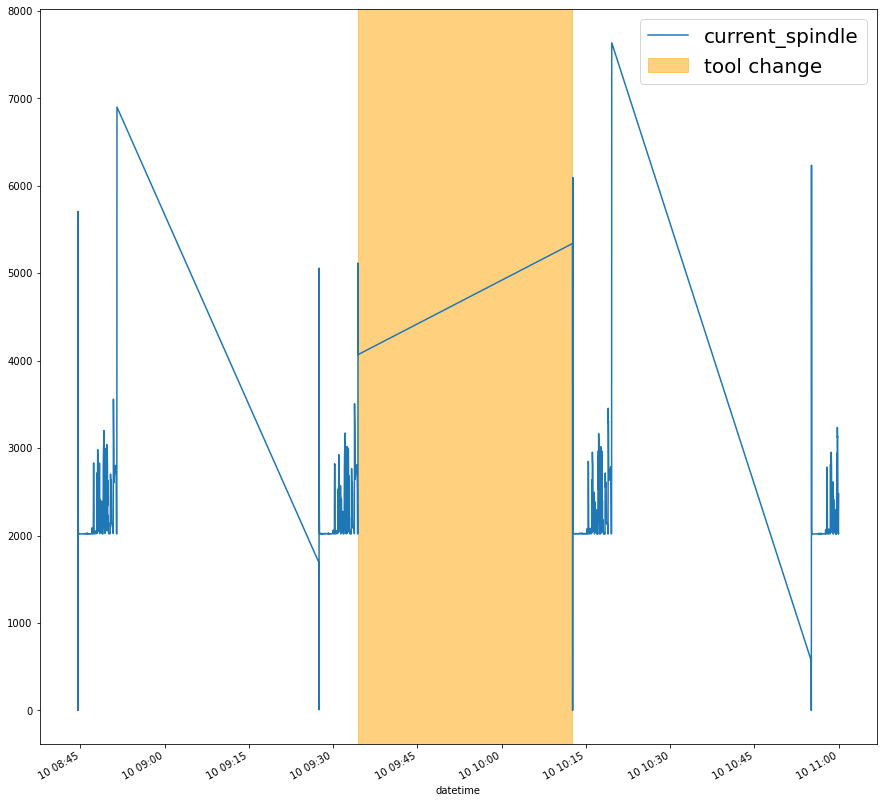

In [40]:
df_VL04_Tool9[(df_VL04_Tool9['date'] == '2022-07-10') & ((df_VL04_Tool9['hour'] == '8') | (df_VL04_Tool9['hour'] == '9') | (df_VL04_Tool9['hour'] == '10'))]['current_spindle'].plot()
plt.axvspan('2022-07-10 09:34:27', '2022-07-10 10:12:36', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

In [41]:
df_VL04_Tool9.loc['2022-07-10 09:27:10':'2022-07-10 09:36:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 09:27:28  2022-07-10    9     27     28        900.0   5775.0   
2022-07-10 09:27:29  2022-07-10    9     27     29        900.0   5775.0   
2022-07-10 09:27:30  2022-07-10    9     27     30        909.0   5775.0   
2022-07-10 09:27:31  2022-07-10    9     27     31        909.0   5775.0   
2022-07-10 09:27:32  2022-07-10    9     27     32        909.0   5775.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-10 09:34:23  2022-07-10    9     34     23        909.0   5775.0   
2022-07-10 09:34:24  2022-07-10    9     34     24        909.0   5775.0   
2022-07-10 09:34:25  2022-07-10    9     34     25        909.0   5775.0   
2022-07-10 09:34:26  2022-07-10    9     34     26        909.0   5775.0   
2022-07-10 09:34:27  2022-07-10    9     34     27        909.0   5775.0   

                     current_x  current_z  current_spindle   vibration  \
datetime                                                                 
2022-07-10 09:27:28        0.0        0.0           1692.0  199.500000   
2022-07-10 09:27:29        0.0        0.0              7.5  200.000000   
2022-07-10 09:27:30        0.0        0.0           1241.0  202.000000   
2022-07-10 09:27:31        0.0        0.0           5059.5  199.000000   
2022-07-10 09:27:32        0.0        0.0           2391.0  198.500000   
...                        ...        ...              ...         ...   
2022-07-10 09:34:23        0.0        0.0           2020.0  200.000000   
2022-07-10 09:34:24        0.0        0.0           2020.0  199.000000   
2022-07-10 09:34:25        0.0        0.0           2019.0  198.666667   
2022-07-10 09:34:26        0.0        0.0           5117.5  200.000000   
2022-07-10 09:34:27        0.0        0.0           4070.0  201.000000   

                           pos_x_1        pos_z_1         rpm         feed  \
datetime                                                                     
2022-07-10 09:27:28  640000.000000  483830.000000    0.000000     0.000000   
2022-07-10 09:27:29  640000.000000  483830.000000    0.000000  6000.000000   
2022-07-10 09:27:30  617890.000000  422995.000000   43.000000     0.000000   
2022-07-10 09:27:31  545113.500000  336826.500000  301.000000  3535.500000   
2022-07-10 09:27:32  355780.000000  242160.000000  299.000000  7071.000000   
...                            ...            ...         ...          ...   
2022-07-10 09:34:23  219266.500000  182902.000000  299.500000  2500.000000   
2022-07-10 09:34:24  310600.000000  246000.000000  300.000000  7071.000000   
2022-07-10 09:34:25  484822.333333  330053.333333  299.333333  6380.666667   
2022-07-10 09:34:26  595780.000000  362160.000000  259.000000     0.000000   
2022-07-10 09:34:27  595780.000000  362160.000000   67.000000     0.000000   

                         load_1  servo_load_x  servo_load_z  servo_current_x  \
datetime                                                                       
2022-07-10 09:27:28    0.000000           4.0     72.500000         4.000000   
2022-07-10 09:27:29    0.000000           5.5     73.000000         5.500000   
2022-07-10 09:27:30  154.000000           3.5     72.000000         2.500000   
2022-07-10 09:27:31    3.000000          18.5     56.000000       -18.500000   
2022-07-10 09:27:32    0.000000          18.0     57.000000       -18.000000   
...                         ...           ...           ...              ...   
2022-07-10 09:34:23    1.000000          12.5     80.000000        12.500000   
2022-07-10 09:34:24    1.000000          20.0     80.000000        20.000000   
2022-07-10 09:34:25    0.666667          24.0     78.666667         1.333333   
2022-07-10 09:34:26  118.500000           5.5     73.000000         5.500000   
2022-07-10 09:34:27    0.000000           4.0     72.000000         4.000000   

                   

In [42]:
df_VL04_Tool9.loc['2022-07-10 10:10:10':'2022-07-10 10:19:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 10:12:36  2022-07-10   10     12     36        900.0   5776.0   
2022-07-10 10:12:37  2022-07-10   10     12     37        900.0   5776.0   
2022-07-10 10:12:38  2022-07-10   10     12     38        900.0   5776.0   
2022-07-10 10:12:38  2022-07-10   10     12     38        909.0   5776.0   
2022-07-10 10:12:39  2022-07-10   10     12     39        909.0   5776.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-10 10:19:00  2022-07-10   10     19      0        909.0   5776.0   
2022-07-10 10:19:01  2022-07-10   10     19      1        909.0   5776.0   
2022-07-10 10:19:02  2022-07-10   10     19      2        909.0   5776.0   
2022-07-10 10:19:03  2022-07-10   10     19      3        909.0   5776.0   
2022-07-10 10:19:04  2022-07-10   10     19      4        909.0   5776.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-10 10:12:36        0.0        0.0           5340.0      200.0   
2022-07-10 10:12:37        0.0        0.0            376.5      200.0   
2022-07-10 10:12:38        0.0        0.0              0.0      199.0   
2022-07-10 10:12:38        0.0        0.0              0.0      201.0   
2022-07-10 10:12:39        0.0        0.0           1596.0      200.0   
...                        ...        ...              ...        ...   
2022-07-10 10:19:00        0.0        0.0           3309.0      197.5   
2022-07-10 10:19:01        0.0        0.0           3251.5      198.5   
2022-07-10 10:19:02        0.0        0.0           2997.0      200.0   
2022-07-10 10:19:03        0.0        0.0           2709.0      200.0   
2022-07-10 10:19:04        0.0        0.0           2630.0      199.0   

                      pos_x_1   pos_z_1    rpm    feed  load_1  servo_load_x  \
datetime                                                                       
2022-07-10 10:12:36  683540.0  398623.0    8.0     0.0     0.0           4.0   
2022-07-10 10:12:37  640000.0  483830.0    0.0  6000.0     0.0           5.0   
2022-07-10 10:12:38  640000.0  483830.0    0.0     0.0     0.0           5.0   
2022-07-10 10:12:38  640000.0  483830.0    0.0     0.0    53.0           4.0   
2022-07-10 10:12:39  595780.0  362160.0   86.5     0.0   112.5          31.5   
...                       ...       ...    ...     ...     ...           ...   
2022-07-10 10:19:00  161325.0  -10981.5  299.5    82.0    11.5           7.5   
2022-07-10 10:19:01  163377.5  -12005.0  300.0    82.0    10.5           7.5   
2022-07-10 10:19:02  165306.0  -12966.5  299.5    82.0     8.5           8.5   
2022-07-10 10:19:03  167265.5  -13943.0  299.5    82.0     7.0           8.5   
2022-07-10 10:19:04  169225.5  -14919.5  299.0    82.0     7.0           8.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 10:12:36          73.0              4.0            -73.0     9   
2022-07-10 10:12:37          72.0              5.0            -72.0     9   
2022-07-10 10:12:38          72.0              5.0            -72.0     9   
2022-07-10 10:12:38          73.0              4.0            -73.0     9   
2022-07-10 10:12:39          45.5            -31.5            -26.5     9   
...                           ...              ...              ...   ...   
2022-07-10 10:19:00          55.0              7.5            -55.0     9   
2022-07-10 10:19:01          54.0              7.5            -54.0     9   
2022-07-10 10:19:02          54.0              8.5            -54.0     9   
2022-07-10 10:19:03          54.0              8.5            -54.0     9   
2022-07-10 10:19:04          54.5              8.0            -54.5     9   

                    tool_state  
datetime    

In [43]:
pd.Timestamp('2022-07-10 10:12:36') - pd.Timestamp('2022-07-10 09:34:27') 

Timedelta('0 days 00:38:09')

* tool9 교체시간 범위 2022-07-10 09:34:27 ~ 2022-07-10 10:12:36로 약 38분 09초
* 교체 시점은 9시 36분경

# 2차 교체지점 탐색(07-12 10:13)

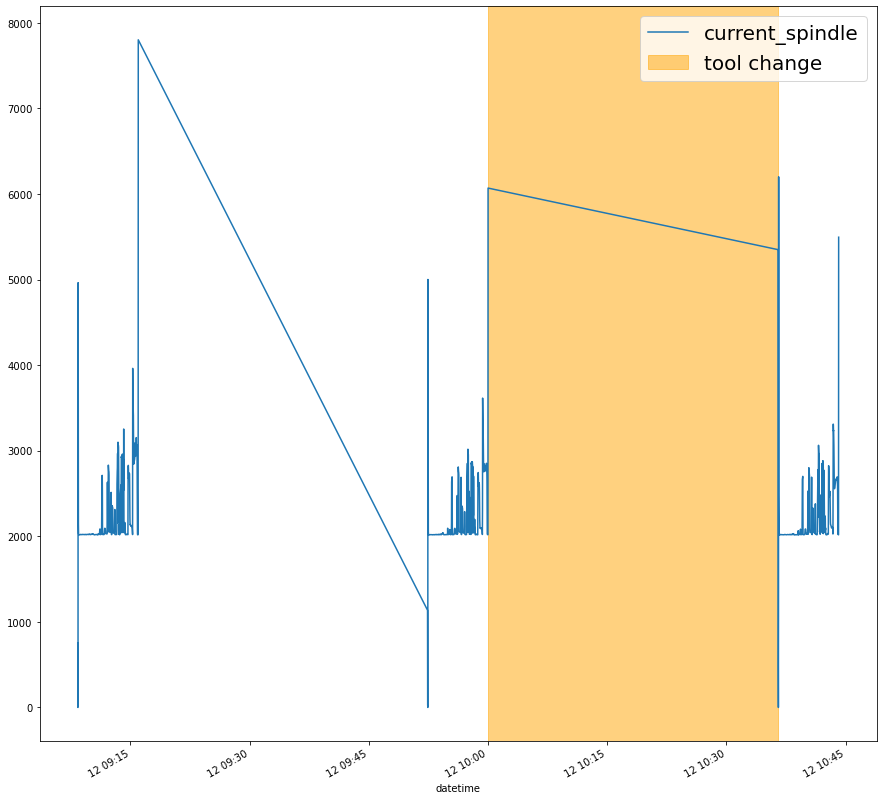

In [44]:
df_VL04_Tool9[(df_VL04_Tool9['date'] == '2022-07-12') & ((df_VL04_Tool9['hour'] == '9') | (df_VL04_Tool9['hour'] == '10'))]['current_spindle'].plot()
plt.axvspan('2022-07-12 10:00:01', '2022-07-12 10:36:31', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

In [45]:
df_VL04_Tool9.loc['2022-07-12 9:50:10':'2022-07-12 10:08:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-12 09:52:24  2022-07-12    9     52     24        900.0   5811.0   
2022-07-12 09:52:25  2022-07-12    9     52     25        900.0   5811.0   
2022-07-12 09:52:26  2022-07-12    9     52     26        900.0   5811.0   
2022-07-12 09:52:26  2022-07-12    9     52     26        909.0   5811.0   
2022-07-12 09:52:27  2022-07-12    9     52     27        909.0   5811.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-12 09:59:57  2022-07-12    9     59     57        909.0   5811.0   
2022-07-12 09:59:58  2022-07-12    9     59     58        909.0   5811.0   
2022-07-12 09:59:59  2022-07-12    9     59     59        909.0   5811.0   
2022-07-12 10:00:00  2022-07-12   10      0      0        909.0   5811.0   
2022-07-12 10:00:01  2022-07-12   10      0      1        909.0   5811.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-12 09:52:24        0.0        0.0           1136.0      201.0   
2022-07-12 09:52:25        0.0        0.0             32.0      201.0   
2022-07-12 09:52:26        0.0        0.0              0.0      201.0   
2022-07-12 09:52:26        0.0        0.0              0.0      200.0   
2022-07-12 09:52:27        0.0        0.0           5000.5      201.0   
...                        ...        ...              ...        ...   
2022-07-12 09:59:57        0.0        0.0           2020.0      202.0   
2022-07-12 09:59:58        0.0        0.0           2019.0      203.0   
2022-07-12 09:59:59        0.0        0.0           2018.5      204.0   
2022-07-12 10:00:00        0.0        0.0           2018.0      203.5   
2022-07-12 10:00:01        0.0        0.0           6068.5      204.5   

                      pos_x_1   pos_z_1    rpm    feed  load_1  servo_load_x  \
datetime                                                                       
2022-07-12 09:52:24  683540.0  398623.0  111.0     0.0     0.0           5.0   
2022-07-12 09:52:25  640000.0  483830.0    0.0  6000.0     0.0           5.0   
2022-07-12 09:52:26  640000.0  483830.0    0.0     0.0     0.0           5.0   
2022-07-12 09:52:26  640000.0  483830.0    0.0     0.0   145.0           1.0   
2022-07-12 09:52:27  595780.0  362160.0  183.5     0.0    87.5          11.0   
...                       ...       ...    ...     ...     ...           ...   
2022-07-12 09:59:57  218600.0  136470.0  299.0  5000.0     1.0           2.0   
2022-07-12 09:59:58  218600.0  200000.0  300.0  5000.0     1.0          24.0   
2022-07-12 09:59:59  342600.0  262000.0  299.0  7071.0     1.0          20.0   
2022-07-12 10:00:00  523933.5  346746.5  299.5  6035.5     1.0          13.0   
2022-07-12 10:00:01  595780.0  362160.0  230.0     0.0   120.0           5.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-12 09:52:24          71.0              5.0            -71.0     9   
2022-07-12 09:52:25          72.0              5.0            -72.0     9   
2022-07-12 09:52:26          72.0              5.0            -72.0     9   
2022-07-12 09:52:26          72.0              1.0            -72.0     9   
2022-07-12 09:52:27          63.5            -11.0            -63.5     9   
...                           ...              ...              ...   ...   
2022-07-12 09:59:57          79.0              2.0            -79.0     9   
2022-07-12 09:59:58          79.0             24.0            -79.0     9   
2022-07-12 09:59:59          79.0             20.0            -79.0     9   
2022-07-12 10:00:00          77.0             13.0            -77.0     9   
2022-07-12 10:00:01          71.5              5.0            -71.5     9   

                    tool_state  
datetime    

In [46]:
df_VL04_Tool9.loc['2022-07-12 10:34:10':'2022-07-12 10:40:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-12 10:36:31  2022-07-12   10     36     31        900.0   5812.0   
2022-07-12 10:36:32  2022-07-12   10     36     32        900.0   5812.0   
2022-07-12 10:36:33  2022-07-12   10     36     33        900.0   5812.0   
2022-07-12 10:36:34  2022-07-12   10     36     34        909.0   5812.0   
2022-07-12 10:36:35  2022-07-12   10     36     35        909.0   5812.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-12 10:40:00  2022-07-12   10     40      0        909.0   5812.0   
2022-07-12 10:40:01  2022-07-12   10     40      1        909.0   5812.0   
2022-07-12 10:40:02  2022-07-12   10     40      2        909.0   5812.0   
2022-07-12 10:40:03  2022-07-12   10     40      3        909.0   5812.0   
2022-07-12 10:40:04  2022-07-12   10     40      4        909.0   5812.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-12 10:36:31        0.0        0.0           5349.0      204.0   
2022-07-12 10:36:32        0.0        0.0            492.5      204.5   
2022-07-12 10:36:33        0.0        0.0              0.0      203.5   
2022-07-12 10:36:34        0.0        0.0           1386.0      202.5   
2022-07-12 10:36:35        0.0        0.0           6200.0      202.0   
...                        ...        ...              ...        ...   
2022-07-12 10:40:00        0.0        0.0           2063.0      203.5   
2022-07-12 10:40:01        0.0        0.0           2031.0      202.5   
2022-07-12 10:40:02        0.0        0.0           2028.5      203.0   
2022-07-12 10:40:03        0.0        0.0           2029.0      202.0   
2022-07-12 10:40:04        0.0        0.0           2029.5      202.5   

                      pos_x_1   pos_z_1    rpm    feed  load_1  servo_load_x  \
datetime                                                                       
2022-07-12 10:36:31  683540.0  398623.0   19.0     0.0     0.0           5.0   
2022-07-12 10:36:32  640000.0  483830.0    0.0  6000.0     0.0           5.0   
2022-07-12 10:36:33  640000.0  483830.0    0.0  6000.0     0.0           5.0   
2022-07-12 10:36:34  595780.0  362160.0   72.5     0.0   132.5           1.0   
2022-07-12 10:36:35  525113.5  326826.5  304.0  7071.0     2.5          19.0   
...                       ...       ...    ...     ...     ...           ...   
2022-07-12 10:40:00  259426.0  -45500.0  299.5    75.0     1.5           8.0   
2022-07-12 10:40:01  256710.5  -45500.0  299.5    75.0     1.0           7.5   
2022-07-12 10:40:02  254035.0  -45500.0  299.0    75.0     1.0           7.5   
2022-07-12 10:40:03  252078.0  -45500.0  300.0    75.0     1.0           8.0   
2022-07-12 10:40:04  249881.0  -45500.0  300.0    75.0     1.0           8.0   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-12 10:36:31          72.0              5.0            -72.0     9   
2022-07-12 10:36:32          72.5              5.0            -72.5     9   
2022-07-12 10:36:33          72.0              5.0            -72.0     9   
2022-07-12 10:36:34          71.5              0.0            -71.5     9   
2022-07-12 10:36:35          55.5            -19.0            -55.5     9   
...                           ...              ...              ...   ...   
2022-07-12 10:40:00          64.0             -8.0            -64.0     9   
2022-07-12 10:40:01          64.5             -7.5            -64.5     9   
2022-07-12 10:40:02          64.0             -7.5            -64.0     9   
2022-07-12 10:40:03          64.0             -8.0            -64.0     9   
2022-07-12 10:40:04          64.5             -8.0            -64.5     9   

                    tool_state  
datetime    

In [47]:
pd.Timestamp('2022-07-12 10:36:31') - pd.Timestamp('2022-07-12 10:00:01') 

Timedelta('0 days 00:36:30')

* tool9 교체시간 범위 2022-07-12 10:00:01 ~ 2022-07-12 10:36:31로 약 36분 30초
* 교체 시점은 10시 13분경

# 3차 교체지점 탐색(07-15 15:23)

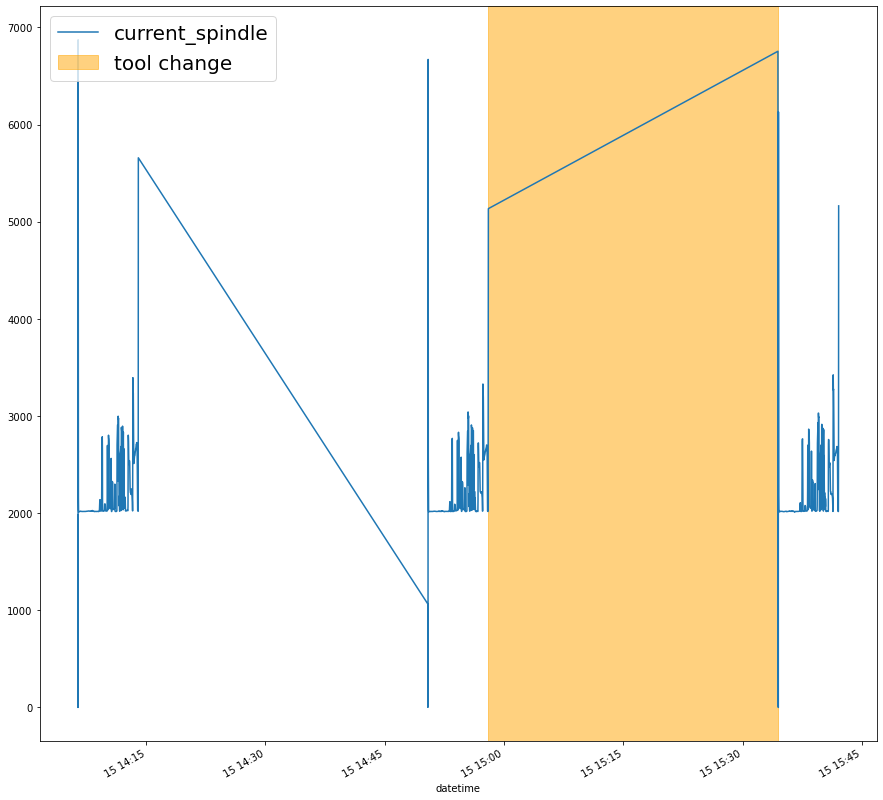

In [48]:
df_VL04_Tool9[(df_VL04_Tool9['date'] == '2022-07-15') & ((df_VL04_Tool9['hour'] == '14') | (df_VL04_Tool9['hour'] == '15'))]['current_spindle'].plot()
plt.axvspan('2022-07-15 14:58:01', '2022-07-15 15:34:25', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

In [49]:
df_VL04_Tool9.loc['2022-07-15 14:50:10':'2022-07-15 15:23:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-15 14:50:24  2022-07-15   14     50     24        900.0   5874.0   
2022-07-15 14:50:25  2022-07-15   14     50     25        900.0   5874.0   
2022-07-15 14:50:26  2022-07-15   14     50     26        900.0   5874.0   
2022-07-15 14:50:26  2022-07-15   14     50     26        909.0   5874.0   
2022-07-15 14:50:27  2022-07-15   14     50     27        909.0   5874.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-15 14:57:57  2022-07-15   14     57     57        909.0   5874.0   
2022-07-15 14:57:58  2022-07-15   14     57     58        909.0   5874.0   
2022-07-15 14:57:59  2022-07-15   14     57     59        909.0   5874.0   
2022-07-15 14:58:00  2022-07-15   14     58      0        909.0   5874.0   
2022-07-15 14:58:01  2022-07-15   14     58      1        909.0   5874.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-15 14:50:24        0.2       2.80          1065.80      87.60   
2022-07-15 14:50:25        1.8       2.00             1.20      87.00   
2022-07-15 14:50:26        0.0       2.00           118.00      87.00   
2022-07-15 14:50:26       10.5       3.75          1118.75      86.75   
2022-07-15 14:50:27      258.2     329.40          6669.80      92.60   
...                        ...        ...              ...        ...   
2022-07-15 14:57:57        0.0    1454.20          2018.00      91.80   
2022-07-15 14:57:58      311.2    1432.80          2017.40      90.40   
2022-07-15 14:57:59      365.2    1459.00          2017.40      87.00   
2022-07-15 14:58:00      239.4     448.80          3787.20      94.40   
2022-07-15 14:58:01       26.0      16.50          5134.00      87.50   

                      pos_x_1   pos_z_1     rpm    feed  load_1  servo_load_x  \
datetime                                                                        
2022-07-15 14:50:24  640000.0  483830.0    0.00     0.0    0.00          4.40   
2022-07-15 14:50:25  640000.0  483830.0    0.00  7200.0    0.00          4.60   
2022-07-15 14:50:26  640000.0  483830.0    0.00     0.0    0.00          4.00   
2022-07-15 14:50:26  595780.0  362160.0   69.75     0.0  150.00          3.00   
2022-07-15 14:50:27  542446.6  335493.4  280.80  5454.8   36.60         15.20   
...                       ...       ...     ...     ...     ...           ...   
2022-07-15 14:57:57  218600.0  165803.4  299.40  5000.0    0.60          2.00   
2022-07-15 14:57:58  300200.0  240800.0  299.80  7071.0    1.00         22.00   
2022-07-15 14:57:59  471933.4  325232.0  299.00  6656.8    0.40         18.40   
2022-07-15 14:58:00  588077.4  362160.0  281.00  1000.0   45.80          8.80   
2022-07-15 14:58:01  595780.0  362160.0  159.00     0.0  121.75          4.25   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-15 14:50:24         72.00             4.40           -72.00     9   
2022-07-15 14:50:25         72.40             4.60           -72.40     9   
2022-07-15 14:50:26         72.00             4.00           -72.00     9   
2022-07-15 14:50:26         72.25             2.00           -72.25     9   
2022-07-15 14:50:27         59.00           -15.20           -59.00     9   
...                           ...              ...              ...   ...   
2022-07-15 14:57:57         48.00             2.00           -47.20     9   
2022-07-15 14:57:58         79.00            22.00           -79.00     9   
2022-07-15 14:57:59         78.40            18.40           -78.40     9   
2022-07-15 14:58:00         74.80             8.80           -74.80     9   
2022-07-15 14:58:01         72.50             4.25           -72.50     9   

                    tool_state  

In [50]:
df_VL04_Tool9.loc['2022-07-15 15:23:10':'2022-07-15 15:50:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-15 15:34:25  2022-07-15   15     34     25        900.0   5875.0   
2022-07-15 15:34:26  2022-07-15   15     34     26        900.0   5875.0   
2022-07-15 15:34:27  2022-07-15   15     34     27        900.0   5875.0   
2022-07-15 15:34:28  2022-07-15   15     34     28        900.0   5875.0   
2022-07-15 15:34:28  2022-07-15   15     34     28        909.0   5875.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-15 15:41:59  2022-07-15   15     41     59        909.0   5875.0   
2022-07-15 15:42:00  2022-07-15   15     42      0        909.0   5875.0   
2022-07-15 15:42:01  2022-07-15   15     42      1        909.0   5875.0   
2022-07-15 15:42:02  2022-07-15   15     42      2        909.0   5875.0   
2022-07-15 15:42:03  2022-07-15   15     42      3        909.0   5875.0   

                     current_x    current_z  current_spindle  vibration  \
datetime                                                                  
2022-07-15 15:34:25       0.00    12.000000      6754.000000  87.000000   
2022-07-15 15:34:26       0.00     3.200000      1329.400000  88.000000   
2022-07-15 15:34:27       1.40     2.000000        14.000000  87.600000   
2022-07-15 15:34:28       3.00     2.000000         0.000000  88.500000   
2022-07-15 15:34:28       8.00     3.333333      1205.333333  87.333333   
...                        ...          ...              ...        ...   
2022-07-15 15:41:59       2.40  1446.000000      2017.800000  92.800000   
2022-07-15 15:42:00     181.60  1420.000000      2017.000000  92.000000   
2022-07-15 15:42:01     359.40  1458.400000      2016.600000  88.000000   
2022-07-15 15:42:02     287.25   730.000000      2626.750000  97.250000   
2022-07-15 15:42:03      47.00    22.000000      5162.666667  88.166667   

                      pos_x_1   pos_z_1         rpm    feed      load_1  \
datetime                                                                  
2022-07-15 15:34:25  683540.0  398623.0    5.000000     0.0    0.000000   
2022-07-15 15:34:26  648708.0  466788.6    1.000000     0.0    0.000000   
2022-07-15 15:34:27  640000.0  483830.0    0.000000  9600.0    0.000000   
2022-07-15 15:34:28  640000.0  483830.0    0.000000     0.0   13.000000   
2022-07-15 15:34:28  595780.0  362160.0   93.333333     0.0  154.666667   
...                       ...       ...         ...     ...         ...   
2022-07-15 15:41:59  218600.0  159136.6  299.400000  5000.0    0.600000   
2022-07-15 15:42:00  284733.2  232360.8  299.400000  6656.8    0.600000   
2022-07-15 15:42:01  445533.2  313466.8  299.400000  7071.0    0.600000   
2022-07-15 15:42:02  585190.0  362160.0  292.750000  2500.0   33.500000   
2022-07-15 15:42:03  595780.0  362160.0  138.166667     0.0   80.000000   

                     servo_load_x  servo_load_z  servo_current_x  \
datetime                                                           
2022-07-15 15:34:25      4.000000     72.000000         4.000000   
2022-07-15 15:34:26      4.000000     72.600000         4.000000   
2022-07-15 15:34:27      5.000000     72.400000         5.000000   
2022-07-15 15:34:28      4.000000     72.000000         4.000000   
2022-07-15 15:34:28      1.666667     72.333333         1.000000   
...                           ...           ...              ...   
2022-07-15 15:41:59      1.600000     66.200000         1.600000   
2022-07-15 15:42:00     17.400000     65.600000        17.400000   
2022-07-15 15:42:01     18.800000     79.200000        18.800000   
2022-07-15 15:42:02     12.500000     75.000000        12.500000   
2022-07-15 15:42:03      4.333333     72.333333         4.333333   

                     servo_current_z  tool tool_state  
datetime                                               
2022-07-15 15:34:25       -72.000000     9         취소  
2022-07-15 15:34:26       -72.600

In [51]:
pd.Timestamp('2022-07-15 15:34:25') - pd.Timestamp('2022-07-15 14:58:01') 

Timedelta('0 days 00:36:24')

* tool9 교체시간 범위 2022-07-15 14:58:01 ~ 2022-07-15 15:34:25로 약 36분 24초
* 교체 시점은 15시 23분경

# 4차 교체지점 탐색(07-18 10:56)

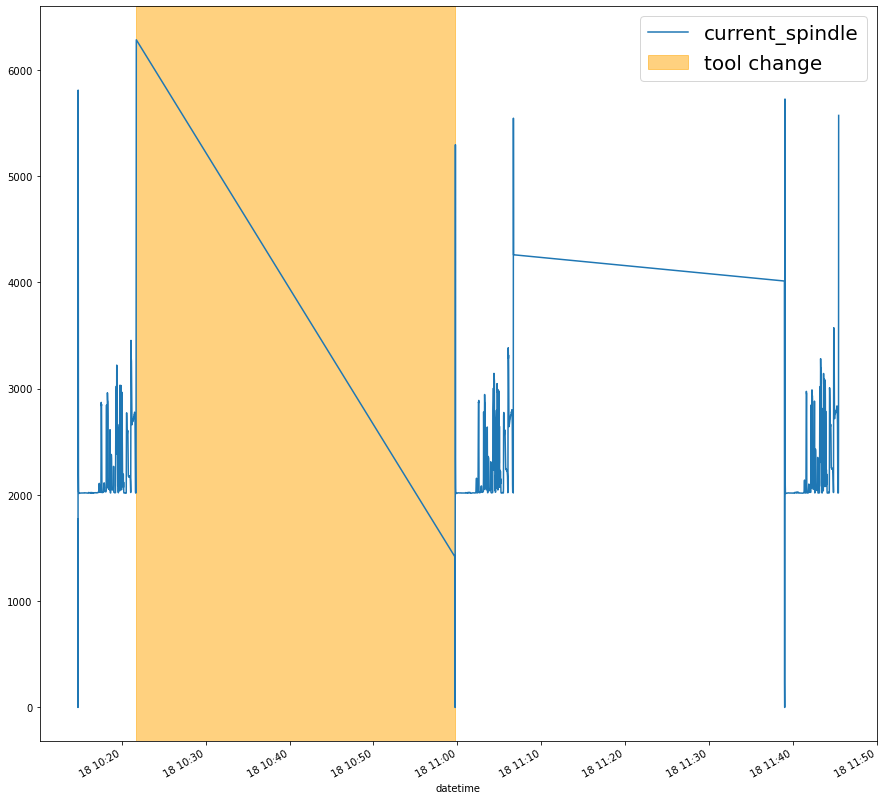

In [52]:
df_VL04_Tool9[(df_VL04_Tool9['date'] == '2022-07-18') & ((df_VL04_Tool9['hour'] == '10') | (df_VL04_Tool9['hour'] == '11'))]['current_spindle'].plot()
plt.axvspan('2022-07-18 10:21:43', '2022-07-18 10:59:42', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

In [53]:
df_VL04_Tool9.loc['2022-07-18 10:20:10':'2022-07-18 10:59:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-18 10:20:10  2022-07-18   10     20     10        909.0   5925.0   
2022-07-18 10:20:11  2022-07-18   10     20     11        909.0   5925.0   
2022-07-18 10:20:12  2022-07-18   10     20     12        909.0   5925.0   
2022-07-18 10:20:13  2022-07-18   10     20     13        909.0   5925.0   
2022-07-18 10:20:14  2022-07-18   10     20     14        909.0   5925.0   
2022-07-18 10:20:15  2022-07-18   10     20     15        909.0   5925.0   
2022-07-18 10:20:16  2022-07-18   10     20     16        909.0   5925.0   
2022-07-18 10:20:17  2022-07-18   10     20     17        909.0   5925.0   
2022-07-18 10:20:18  2022-07-18   10     20     18        909.0   5925.0   
2022-07-18 10:20:19  2022-07-18   10     20     19        909.0   5925.0   
2022-07-18 10:20:20  2022-07-18   10     20     20        909.0   5925.0   
2022-07-18 10:20:21  2022-07-18   10     20     21        909.0   5925.0   
2022-07-18 10:20:22  2022-07-18   10     20     22        909.0   5925.0   
2022-07-18 10:20:23  2022-07-18   10     20     23        909.0   5925.0   
2022-07-18 10:20:24  2022-07-18   10     20     24        909.0   5925.0   
2022-07-18 10:20:25  2022-07-18   10     20     25        909.0   5925.0   
2022-07-18 10:20:26  2022-07-18   10     20     26        909.0   5925.0   
2022-07-18 10:20:27  2022-07-18   10     20     27        909.0   5925.0   
2022-07-18 10:20:28  2022-07-18   10     20     28        909.0   5925.0   
2022-07-18 10:20:29  2022-07-18   10     20     29        909.0   5925.0   
2022-07-18 10:20:30  2022-07-18   10     20     30        909.0   5925.0   
2022-07-18 10:20:31  2022-07-18   10     20     31        909.0   5925.0   
2022-07-18 10:20:32  2022-07-18   10     20     32        909.0   5925.0   
2022-07-18 10:20:33  2022-07-18   10     20     33        909.0   5925.0   
2022-07-18 10:20:34  2022-07-18   10     20     34        909.0   5925.0   
2022-07-18 10:20:35  2022-07-18   10     20     35        909.0   5925.0   
2022-07-18 10:20:36  2022-07-18   10     20     36        909.0   5925.0   
2022-07-18 10:20:37  2022-07-18   10     20     37        909.0   5925.0   
2022-07-18 10:20:38  2022-07-18   10     20     38        909.0   5925.0   
2022-07-18 10:20:39  2022-07-18   10     20     39        909.0   5925.0   
2022-07-18 10:20:40  2022-07-18   10     20     40        909.0   5925.0   
2022-07-18 10:20:41  2022-07-18   10     20     41        909.0   5925.0   
2022-07-18 10:20:42  2022-07-18   10     20     42        909.0   5925.0   
2022-07-18 10:20:43  2022-07-18   10     20     43        909.0   5925.0   
2022-07-18 10:20:44  2022-07-18   10     20     44        909.0   5925.0   
2022-07-18 10:20:45  2022-07-18   10     20     45        909.0   5925.0   
2022-07-18 10:20:46  2022-07-18   10     20     46        909.0   5925.0   
2022-07-18 10:20:47  2022-07-18   10     20     47        909.0   5925.0   
2022-07-18 10:20:48  2022-07-18   10     20     48        909.0   5925.0   
2022-07-18 10:20:49  2022-07-18   10     20     49        909.0   5925.0   
2022-07-18 10:20:50  2022-07-18   10     20     50        909.0   5925.0   
2022-07-18 10:20:51  2022-07-18   10     20     51        909.0   5925.0   
2022-07-18 10:20:52  2022-07-18   10     20     52        909.0   5925.0   
2022-07-18 10:20:53  2022-07-18   10     20     53        909.0   5925.0   
2022-07-18 10:20:54  2022-07-18   10     20     54        909.0   5925.0   
2022-07-18 10:20:55  2022-07-18   10     20     55        909.0   5925.0   
2022-07-18 10:20:56  2022-07-18   10     20     56        909.0   5925.0   
2022-07-18 10:20:57  2022-07-18   10     20     57        909.0   5925.0   
2022-07-18 10:20:58  2022-07-18   10     20     58        909.0   5925.0   
2022-07-18 10:20:59  2022-07-18   10     20     59        909.0   5925.0   
2022-07-18 10:21:00  2022-07-18   10     21      0        909.0   5925.0   

In [54]:
df_VL04_Tool9.loc['2022-07-18 10:30:10':'2022-07-18 11:00:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-18 10:59:42  2022-07-18   10     59     42        900.0   5926.0   
2022-07-18 10:59:43  2022-07-18   10     59     43        900.0   5926.0   
2022-07-18 10:59:44  2022-07-18   10     59     44        900.0   5926.0   
2022-07-18 10:59:44  2022-07-18   10     59     44        909.0   5926.0   
2022-07-18 10:59:45  2022-07-18   10     59     45        909.0   5926.0   
2022-07-18 10:59:46  2022-07-18   10     59     46        909.0   5926.0   
2022-07-18 10:59:47  2022-07-18   10     59     47        909.0   5926.0   
2022-07-18 10:59:48  2022-07-18   10     59     48        909.0   5926.0   
2022-07-18 10:59:49  2022-07-18   10     59     49        909.0   5926.0   
2022-07-18 10:59:50  2022-07-18   10     59     50        909.0   5926.0   
2022-07-18 10:59:51  2022-07-18   10     59     51        909.0   5926.0   
2022-07-18 10:59:52  2022-07-18   10     59     52        909.0   5926.0   
2022-07-18 10:59:53  2022-07-18   10     59     53        909.0   5926.0   
2022-07-18 10:59:54  2022-07-18   10     59     54        909.0   5926.0   
2022-07-18 10:59:55  2022-07-18   10     59     55        909.0   5926.0   
2022-07-18 10:59:56  2022-07-18   10     59     56        909.0   5926.0   
2022-07-18 10:59:57  2022-07-18   10     59     57        909.0   5926.0   
2022-07-18 10:59:58  2022-07-18   10     59     58        909.0   5926.0   
2022-07-18 10:59:59  2022-07-18   10     59     59        909.0   5926.0   
2022-07-18 11:00:00  2022-07-18   11      0      0        909.0   5926.0   
2022-07-18 11:00:01  2022-07-18   11      0      1        909.0   5926.0   
2022-07-18 11:00:02  2022-07-18   11      0      2        909.0   5926.0   
2022-07-18 11:00:03  2022-07-18   11      0      3        909.0   5926.0   
2022-07-18 11:00:04  2022-07-18   11      0      4        909.0   5926.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-18 10:59:42        0.5        3.0           1419.0       87.5   
2022-07-18 10:59:43        1.2        2.0             90.6       87.6   
2022-07-18 10:59:44        3.0        2.0              0.0       87.0   
2022-07-18 10:59:44        0.0        4.0           1034.0       88.0   
2022-07-18 10:59:45       62.8       19.4           2405.0       92.0   
2022-07-18 10:59:46      273.4      642.6           5295.8       87.2   
2022-07-18 10:59:47      341.8     1031.2           2345.2       90.0   
2022-07-18 10:59:48      165.4     1033.0           2063.8       88.8   
2022-07-18 10:59:49        1.2     1033.4           2020.0       85.8   
2022-07-18 10:59:50        0.0     1110.4           2013.6       86.2   
2022-07-18 10:59:51        0.0      525.2           2012.8       86.0   
2022-07-18 10:59:52        1.2      514.4           2013.0       86.6   
2022-07-18 10:59:53        1.2      513.8           2014.2       86.0   
2022-07-18 10:59:54        0.0      513.2           2015.4       86.0   
2022-07-18 10:59:55        0.0      513.0           2017.2       86.0   
2022-07-18 10:59:56        0.0      514.2           2018.0       85.8   
2022-07-18 10:59:57        3.2      514.0           2018.0       86.2   
2022-07-18 10:59:58       16.8       16.0           2017.2       86.0   
2022-07-18 10:59:59       19.2        4.0           2016.0       85.6   
2022-07-18 11:00:00       19.2        4.0           2016.6       86.2   
2022-07-18 11:00:01       19.4        4.0           2016.8       86.2   
2022-07-18 11:00:02       19.4        4.0           2018.0       85.6   
2022-07-18 11:00:03       19.4        4.0           2019.0       85.6   
2022-07-18 11:00:04       18.8        4.0           2019.4       85.8   

                      pos_x_1   pos_z_1    rpm    feed  load_1  servo_load_x  \
datetime                                                               

In [55]:
pd.Timestamp('2022-07-18 10:59:42') - pd.Timestamp('2022-07-18 10:21:43') 

Timedelta('0 days 00:37:59')

* tool9 교체시간 범위 2022-07-18 10:21:43 ~ 2022-07-18 10:59:42로 약 37분 59초
* 교체 시점은 10시 56분경

# 5차 교체지점 탐색(07-20 5:55)

<AxesSubplot:xlabel='datetime'>

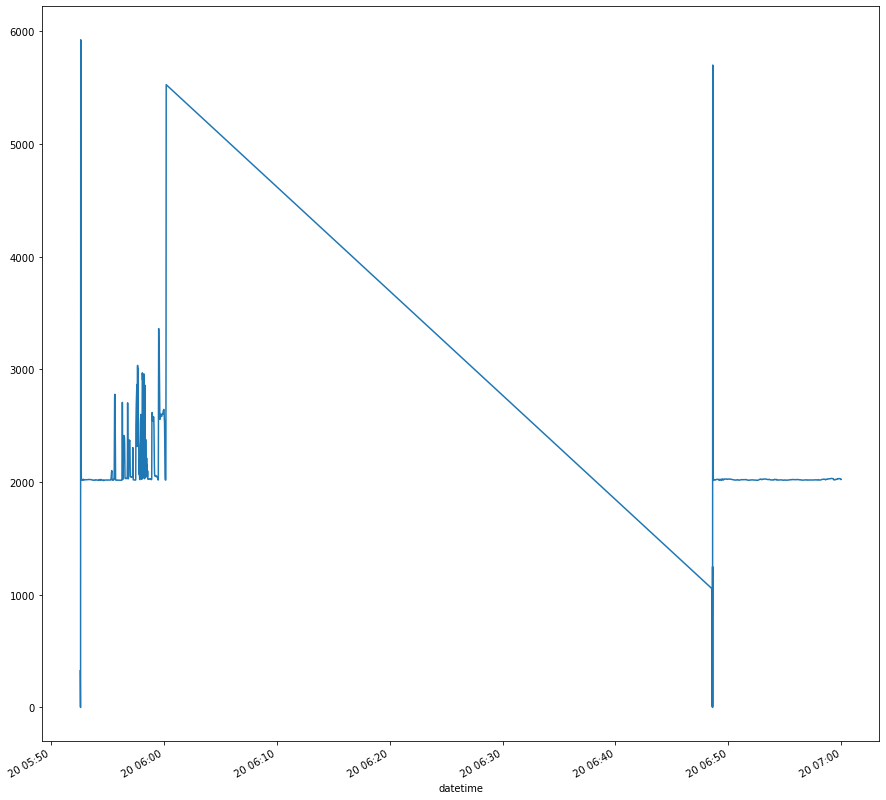

In [56]:
df_VL04_Tool9[(df_VL04_Tool9['date'] == '2022-07-20') & ((df_VL04_Tool9['hour'] == '5') | (df_VL04_Tool9['hour'] == '6'))]['current_spindle'].plot()

In [57]:
df_VL04_Tool9.loc['2022-07-20 5:55:10':'2022-07-20 5:56:04']

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-20 05:55:10  2022-07-20    5     55     10        909.0   5968.0   
2022-07-20 05:55:11  2022-07-20    5     55     11        909.0   5968.0   
2022-07-20 05:55:12  2022-07-20    5     55     12        909.0   5968.0   
2022-07-20 05:55:13  2022-07-20    5     55     13        909.0   5968.0   
2022-07-20 05:55:14  2022-07-20    5     55     14        909.0   5968.0   
2022-07-20 05:55:15  2022-07-20    5     55     15        909.0   5968.0   
2022-07-20 05:55:16  2022-07-20    5     55     16        909.0   5968.0   
2022-07-20 05:55:17  2022-07-20    5     55     17        909.0   5968.0   
2022-07-20 05:55:18  2022-07-20    5     55     18        909.0   5968.0   
2022-07-20 05:55:19  2022-07-20    5     55     19        909.0   5968.0   
2022-07-20 05:55:20  2022-07-20    5     55     20        909.0   5968.0   
2022-07-20 05:55:21  2022-07-20    5     55     21        909.0   5968.0   
2022-07-20 05:55:22  2022-07-20    5     55     22        909.0   5968.0   
2022-07-20 05:55:23  2022-07-20    5     55     23        909.0   5968.0   
2022-07-20 05:55:24  2022-07-20    5     55     24        909.0   5968.0   
2022-07-20 05:55:25  2022-07-20    5     55     25        909.0   5968.0   
2022-07-20 05:55:26  2022-07-20    5     55     26        909.0   5968.0   
2022-07-20 05:55:27  2022-07-20    5     55     27        909.0   5968.0   
2022-07-20 05:55:28  2022-07-20    5     55     28        909.0   5968.0   
2022-07-20 05:55:29  2022-07-20    5     55     29        909.0   5968.0   
2022-07-20 05:55:30  2022-07-20    5     55     30        909.0   5968.0   
2022-07-20 05:55:31  2022-07-20    5     55     31        909.0   5968.0   
2022-07-20 05:55:32  2022-07-20    5     55     32        909.0   5968.0   
2022-07-20 05:55:33  2022-07-20    5     55     33        909.0   5968.0   
2022-07-20 05:55:34  2022-07-20    5     55     34        909.0   5968.0   
2022-07-20 05:55:35  2022-07-20    5     55     35        909.0   5968.0   
2022-07-20 05:55:36  2022-07-20    5     55     36        909.0   5968.0   
2022-07-20 05:55:37  2022-07-20    5     55     37        909.0   5968.0   
2022-07-20 05:55:38  2022-07-20    5     55     38        909.0   5968.0   
2022-07-20 05:55:39  2022-07-20    5     55     39        909.0   5968.0   
2022-07-20 05:55:40  2022-07-20    5     55     40        909.0   5968.0   
2022-07-20 05:55:41  2022-07-20    5     55     41        909.0   5968.0   
2022-07-20 05:55:42  2022-07-20    5     55     42        909.0   5968.0   
2022-07-20 05:55:43  2022-07-20    5     55     43        909.0   5968.0   
2022-07-20 05:55:44  2022-07-20    5     55     44        909.0   5968.0   
2022-07-20 05:55:45  2022-07-20    5     55     45        909.0   5968.0   
2022-07-20 05:55:46  2022-07-20    5     55     46        909.0   5968.0   
2022-07-20 05:55:47  2022-07-20    5     55     47        909.0   5968.0   
2022-07-20 05:55:48  2022-07-20    5     55     48        909.0   5968.0   
2022-07-20 05:55:49  2022-07-20    5     55     49        909.0   5968.0   
2022-07-20 05:55:50  2022-07-20    5     55     50        909.0   5968.0   
2022-07-20 05:55:51  2022-07-20    5     55     51        909.0   5968.0   
2022-07-20 05:55:52  2022-07-20    5     55     52        909.0   5968.0   
2022-07-20 05:55:53  2022-07-20    5     55     53        909.0   5968.0   
2022-07-20 05:55:54  2022-07-20    5     55     54        909.0   5968.0   
2022-07-20 05:55:55  2022-07-20    5     55     55        909.0   5968.0   
2022-07-20 05:55:56  2022-07-20    5     55     56        909.0   5968.0   
2022-07-20 05:55:57  2022-07-20    5     55     57        909.0   5968.0   
2022-07-20 05:55:58  2022-07-20    5     55     58        909.0   5968.0   
2022-07-20 05:55:59  2022-07-20    5     55     59        909.0   5968.0   
2022-07-20 05:56:00  2022-07-20    5     56      0        909.0   5968.0   

* 07-20 05:55 교체 불가 -> 해당 시간 tool9 가동중

# 공구교체 시간 범위
* 1차 : 2022-07-10 09:34:27 ~ 2022-07-10 10:12:36
* 2차 : 2022-07-12 10:00:01 ~ 2022-07-12 10:36:31
* 3차 : 2022-07-15 14:58:01 ~ 2022-07-15 15:34:25
* 4차 : 2022-07-18 10:21:43 ~ 2022-07-18 10:59:42

# time table

1. 주간 8시 시작
2. 12 ~ 13시 점심
3. 5시 ~ 5시 반 저녁
4. 8시 특근

In [58]:
df_VL04_Tool9['shot_no'].unique()

array([5774., 5775., 5776., 5777., 5778., 5779., 5780., 5781., 5782.,
       5783., 5784., 5786., 5787., 5788., 5789., 5790., 5791., 5792.,
       5793., 5794., 5795., 5796., 5797., 5798., 5799., 5800., 5801.,
       5802., 5803., 5804., 5805., 5806., 5807., 5810., 5811., 5812.,
       5813., 5814., 5815., 5817., 5818., 5819., 5820., 5821., 5822.,
       5823., 5824., 5825., 5826., 5827., 5828., 5830., 5831., 5832.,
       5833., 5834., 5835., 5836., 5837., 5838., 5839., 5840., 5841.,
       5842., 5843., 5844., 5845., 5846., 5847., 5848., 5849., 5850.,
       5851., 5852., 5853., 5854., 5855., 5856., 5857., 5858., 5859.,
       5860., 5861., 5862., 5863., 5864., 5865., 5867., 5868., 5869.,
       5870., 5871., 5872., 5873., 5874., 5875., 5876., 5877., 5878.,
       5879., 5880., 5881., 5882., 5883., 5884., 5885., 5886., 5887.,
       5888., 5889., 5890., 5891., 5892., 5893., 5894., 5895., 5896.,
       5897., 5898., 5899., 5900., 5901., 5902., 5903., 5904., 5905.,
       5906., 5907.,

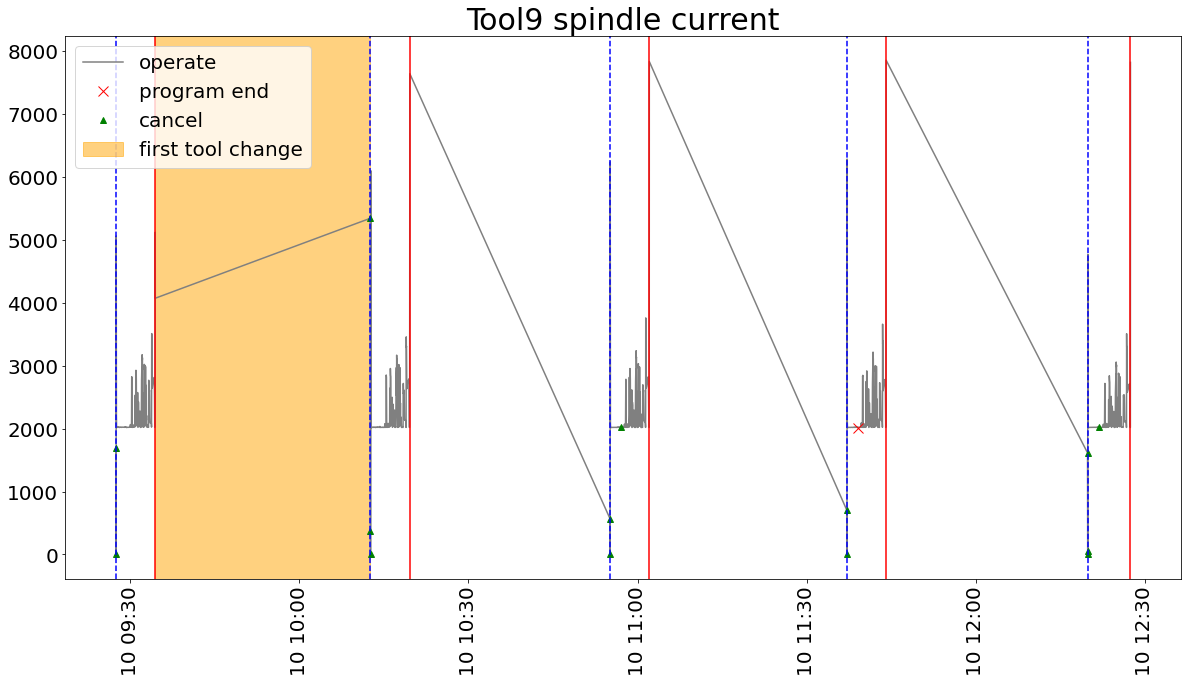

In [59]:
shot_list = [5775.0,5776.0, 5777.0, 5778.0, 5779]
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    shot_df = pd.concat([shot_df, a], axis = 0)
    
shot_df_cancel = shot_df[shot_df['tool_state'] == '취소']
shot_df_end = shot_df[shot_df['tool_state'] == '종료']

plt.figure(figsize = (20,10))
plt.plot(shot_df['current_spindle'], label = 'operate', color = 'gray')
plt.plot(shot_df_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(shot_df_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')

for idx in range(len(shot_list)):
    plt.axvline(x = max(shot_df[(shot_df['shot_no'] == shot_list[idx])].index), color = 'red', linestyle = 'solid')
for idx2 in range(len(shot_list)):
    plt.axvline(x = min(shot_df[(shot_df['shot_no'] == shot_list[idx2])].index), color = 'blue', linestyle = '--')
plt.axvspan('2022-07-10 09:34:27', '2022-07-10 10:12:36', color = 'orange', alpha = 0.5, label = 'first tool change')
#plt.axvspan('2022-07-12 10:00:01 ', '2022-07-12 10:36:31', color = 'orange', alpha = 0.5, label = 'second tool change')
#plt.axvspan('2022-07-10 12:00:00', '2022-07-10 13:00:00', color = 'green', alpha = 0.5, label = 'lunch time')
# plt.axvspan('2022-07-20 17:00:00', '2022-07-20 17:30:00', color = 'green', alpha = 0.5, label = 'dinner time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool9 spindle current', fontsize = 30)
plt.show()

## 첫번째 교체시점 기준 shot 4개 변화 추이

In [60]:
shot_list = [5774, 5775.0,5776.0, 5777.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']

In [61]:
shot_df

value
2022-07-10 08:44:36  5707.0
2022-07-10 08:51:32  6901.0
2022-07-10 09:27:31  5059.5
2022-07-10 09:34:26  5117.5
2022-07-10 10:12:40  6096.0
2022-07-10 10:19:36  7636.0
2022-07-10 10:55:09  6235.5
2022-07-10 11:02:05  7829.0

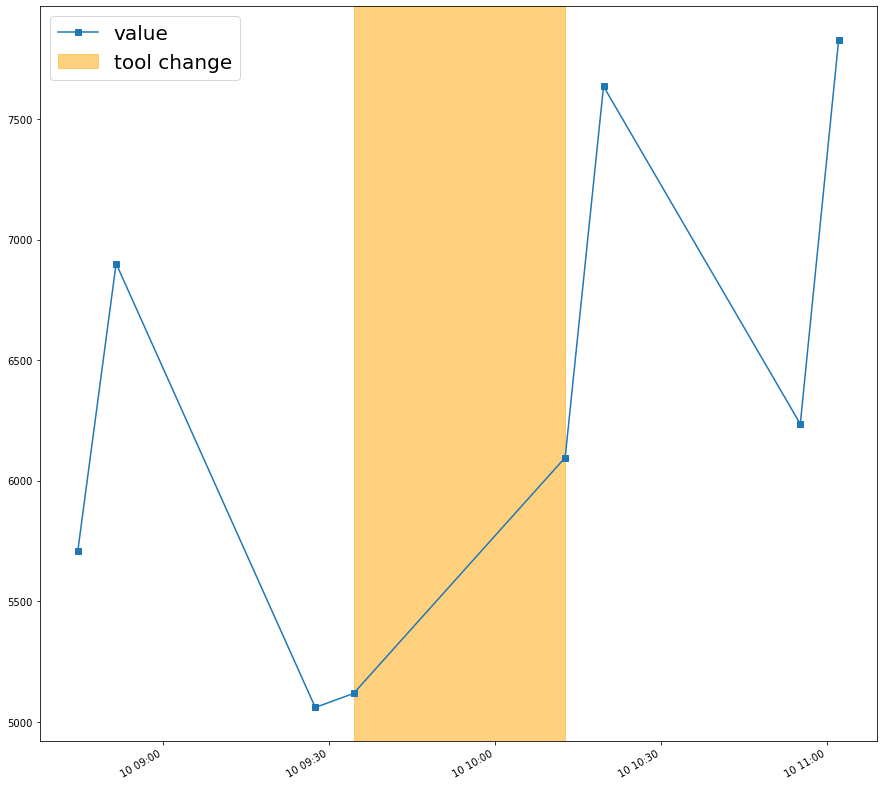

In [62]:
#첫번째 교체 시점을 기준으로 하는 튀는 값 추이 확인
shot_df.sort_index().plot(marker='s')
plt.axvspan('2022-07-10 09:34:27', '2022-07-10 10:12:36', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

## 두번째 교체시점 기준 shot 4개 변화 추이

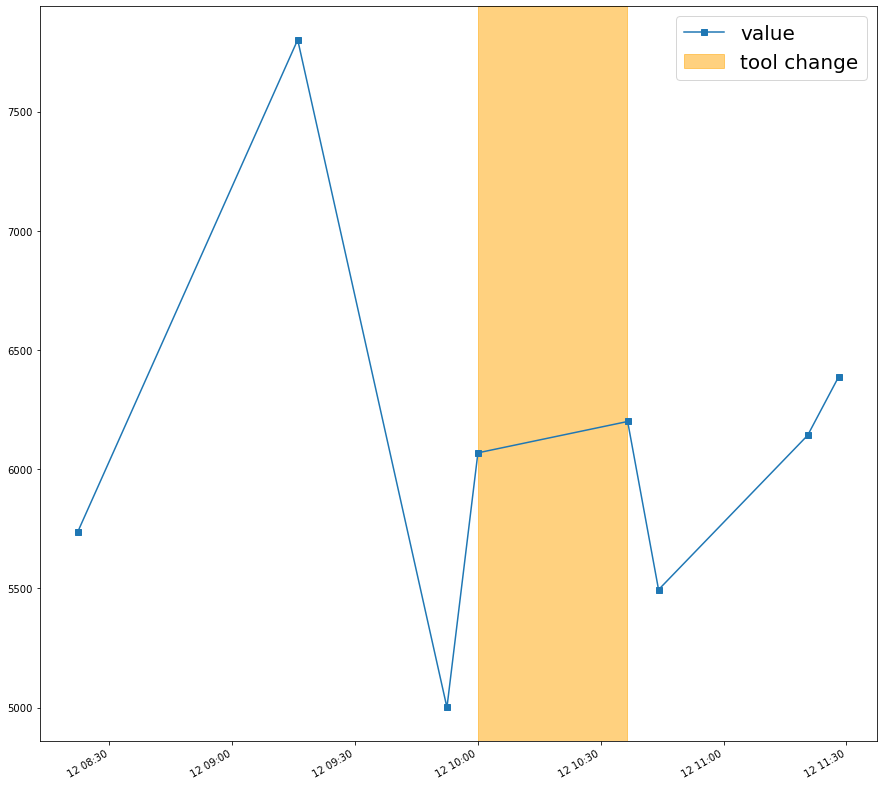

In [63]:
shot_list = [5810, 5811.0,5812.0, 5813.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']

shot_df.sort_index().plot(marker='s')
plt.axvspan('2022-07-12 10:00:01','2022-07-12 10:36:31', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

## 세번째 교체시점 기준 shot 10개 변화 추이

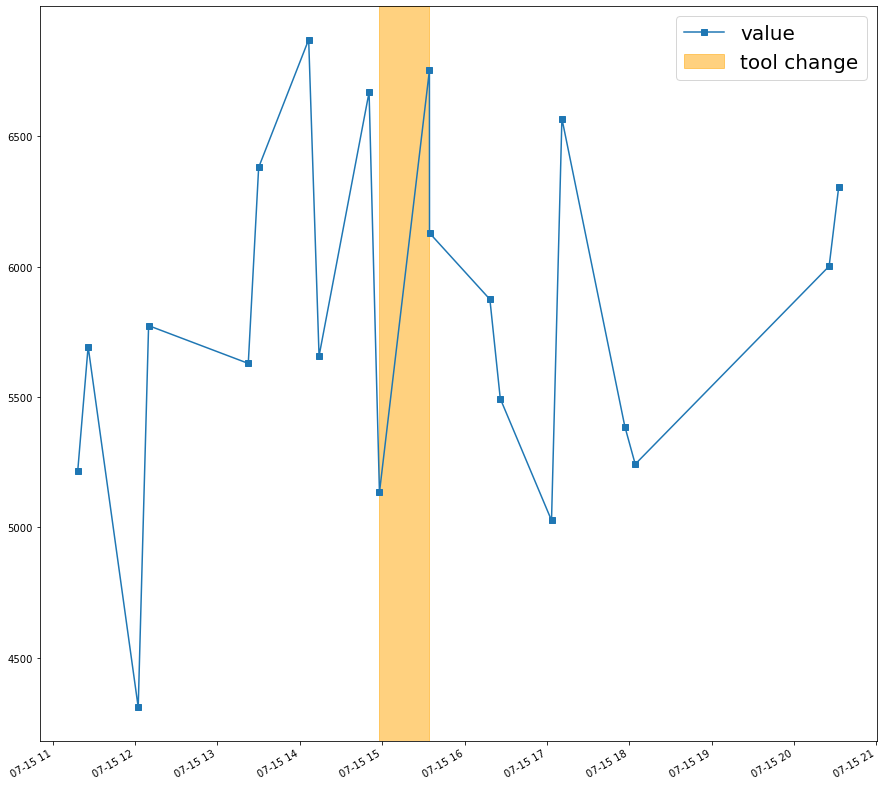

In [64]:
shot_list = [5870,5871,5872, 5873, 5874.0,5875.0, 5876.0, 5877, 5878, 5879]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']

shot_df.sort_index().plot(marker='s')
plt.axvspan('2022-07-15 14:58:01 ','2022-07-15 15:34:25', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

## 네번째 교체시점 기준 shot 10개 변화 추이

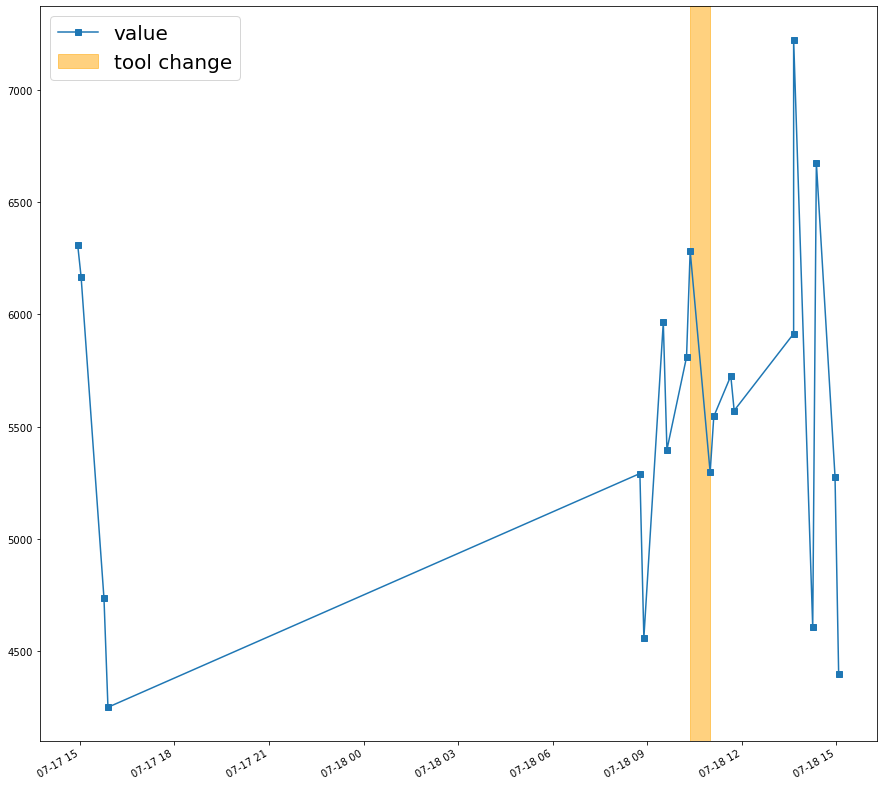

In [65]:
shot_list = [5921,5922,5923,5924, 5925.0,5926.0, 5927.0,5928,5929,5930]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']

shot_df.sort_index().plot(marker='s')
plt.axvspan('2022-07-18 10:21:43' ,'2022-07-18 10:59:42', color = 'orange', alpha = 0.5, label = 'tool change')
plt.legend(fontsize = 20)

## 교체 시점별 시각화(current_spindle)

Text(0.5, 1.0, 'fourth change')

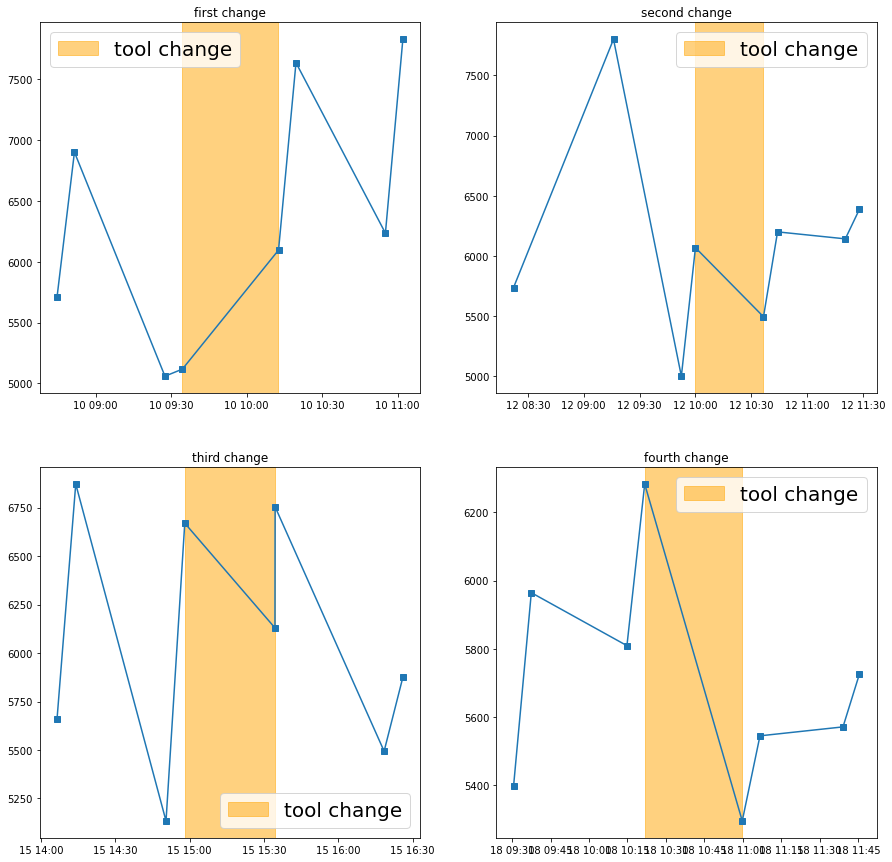

In [66]:
fig, axes = plt.subplots(2,2)

shot_list = [5774, 5775.0,5776.0, 5777.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[0][0].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[0][0].axvspan('2022-07-10 09:34:27', '2022-07-10 10:12:36', color = 'orange', alpha = 0.5, label = 'tool change')
axes[0][0].legend(fontsize = 20)
axes[0][0].set_title("first change")

#shot_list = [5807.0,5808,5809,5810, 5811.0,5812.0, 5813.0,5814,5815,5816]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_list = [5810, 5811.0,5812.0, 5813]
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[0][1].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[0][1].axvspan('2022-07-12 10:00:01','2022-07-12 10:36:31', color = 'orange', alpha = 0.5, label = 'tool change')
axes[0][1].legend(fontsize = 20)
axes[0][1].set_title("second change")

#hot_list = [5870,5871,5872, 5873, 5874.0,5875.0, 5876.0, 5877, 5878, 5879]
shot_list = [ 5873, 5874.0,5875.0, 5876.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[1][0].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[1][0].axvspan('2022-07-15 14:58:01 ','2022-07-15 15:34:25', color = 'orange', alpha = 0.5, label = 'tool change')
axes[1][0].legend(fontsize = 20)
axes[1][0].set_title("third change")
#axes[1][0].xticks(fontsize = 20, rotation = 45)

#shot_list = [5921,5922,5923,5924, 5925.0,5926.0, 5927.0,5928,5929,5930]
shot_list = [5924, 5925.0,5926.0, 5927.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
axes[1][1].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[1][1].axvspan('2022-07-18 10:21:43' ,'2022-07-18 10:59:42', color = 'orange', alpha = 0.5, label = 'tool change')
axes[1][1].legend(fontsize = 20)
axes[1][1].set_title("fourth change")

In [67]:
len(df_VL04_Tool9['shot_no'].unique())

205

## 각각의 shot 길이 분석(진행중)

In [68]:
df_VL04_mod3

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 00:00:00  2022-07-10    0      0      0        101.0   5774.0   
2022-07-10 00:00:01  2022-07-10    0      0      1        101.0   5774.0   
2022-07-10 00:00:02  2022-07-10    0      0      2        101.0   5774.0   
2022-07-10 00:00:03  2022-07-10    0      0      3        101.0   5774.0   
2022-07-10 00:00:04  2022-07-10    0      0      4        101.0   5774.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 23:59:55  2022-07-20   23     59     55        101.0   5989.0   
2022-07-20 23:59:56  2022-07-20   23     59     56        101.0   5989.0   
2022-07-20 23:59:57  2022-07-20   23     59     57        101.0   5989.0   
2022-07-20 23:59:58  2022-07-20   23     59     58        101.0   5989.0   
2022-07-20 23:59:59  2022-07-20   23     59     59        101.0   5989.0   

                     current_x  current_z  current_spindle   vibration  \
datetime                                                                 
2022-07-10 00:00:00        0.0        0.0              0.0  200.000000   
2022-07-10 00:00:01        0.0        0.0              0.0  201.500000   
2022-07-10 00:00:02        0.0        0.0              0.0  199.000000   
2022-07-10 00:00:03        0.0        0.0              0.0  199.666667   
2022-07-10 00:00:04        0.0        0.0              0.0  201.500000   
...                        ...        ...              ...         ...   
2022-07-20 23:59:55       31.2        2.0           2018.8   85.000000   
2022-07-20 23:59:56       31.2        2.0           2020.0   85.400000   
2022-07-20 23:59:57       31.0        2.0           2019.4   86.800000   
2022-07-20 23:59:58       31.6        2.0           2019.8   85.600000   
2022-07-20 23:59:59       31.2        2.0           2019.0   85.000000   

                      pos_x_1   pos_z_1    rpm  feed  load_1  servo_load_x  \
datetime                                                                     
2022-07-10 00:00:00  640000.0  483830.0    0.0   0.0     0.0           3.5   
2022-07-10 00:00:01  640000.0  483830.0    0.0   0.0     0.0           3.5   
2022-07-10 00:00:02  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-10 00:00:03  640000.0  483830.0    0.0   0.0     0.0           4.0   
2022-07-10 00:00:04  640000.0  483830.0    0.0   0.0     0.0           3.5   
...                       ...       ...    ...   ...     ...           ...   
2022-07-20 23:59:55  528317.4    8250.0  299.6  75.0     0.4           9.6   
2022-07-20 23:59:56  526241.0    8250.0  299.2  75.0     0.8          10.0   
2022-07-20 23:59:57  523333.6    8250.0  299.4  75.0     0.8          10.0   
2022-07-20 23:59:58  520937.6    8250.0  299.2  75.0     0.6          10.0   
2022-07-20 23:59:59  518301.6    8250.0  299.2  75.0     0.6           9.6   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 00:00:00          70.5              3.5            -70.5     1   
2022-07-10 00:00:01          71.0              3.5            -71.0     1   
2022-07-10 00:00:02          71.0              4.0            -71.0     1   
2022-07-10 00:00:03          71.0              4.0            -71.0     1   
2022-07-10 00:00:04          71.0              3.5            -71.0     1   
...                           ...              ...              ...   ...   
2022-07-20 23:59:55          60.0             -9.6            -60.0     1   
2022-07-20 23:59:56          60.0            -10.0            -60.0     1   
2022-07-20 23:59:57          60.6            -10.0            -60.6     1   
2022-07-20 23:59:58          61.0            -10.0            -61.0     1   
2022-07-20 23:59:59          60.6             -9.6            -60.6     1   

                    tool_state  
datetime                 

In [69]:
shot_list = df_VL04_mod3['shot_no'].unique()
lag_df = pd.DataFrame()
for shot_idx in shot_list:
    a = df_VL04_mod3[df_VL04_mod3['shot_no'] == shot_idx].iloc[[0]]
    b = df_VL04_mod3[df_VL04_mod3['shot_no'] == shot_idx].iloc[[-1]]
    lag_df = pd.concat([lag_df, a], axis = 0)
    lag_df = pd.concat([lag_df, b], axis = 0)

In [70]:
lag_df = lag_df[['current_spindle']]

In [71]:
lag_df_start = lag_df.iloc[::2,:]
lag_df_end = lag_df.iloc[1::2,:]

<AxesSubplot:xlabel='datetime'>

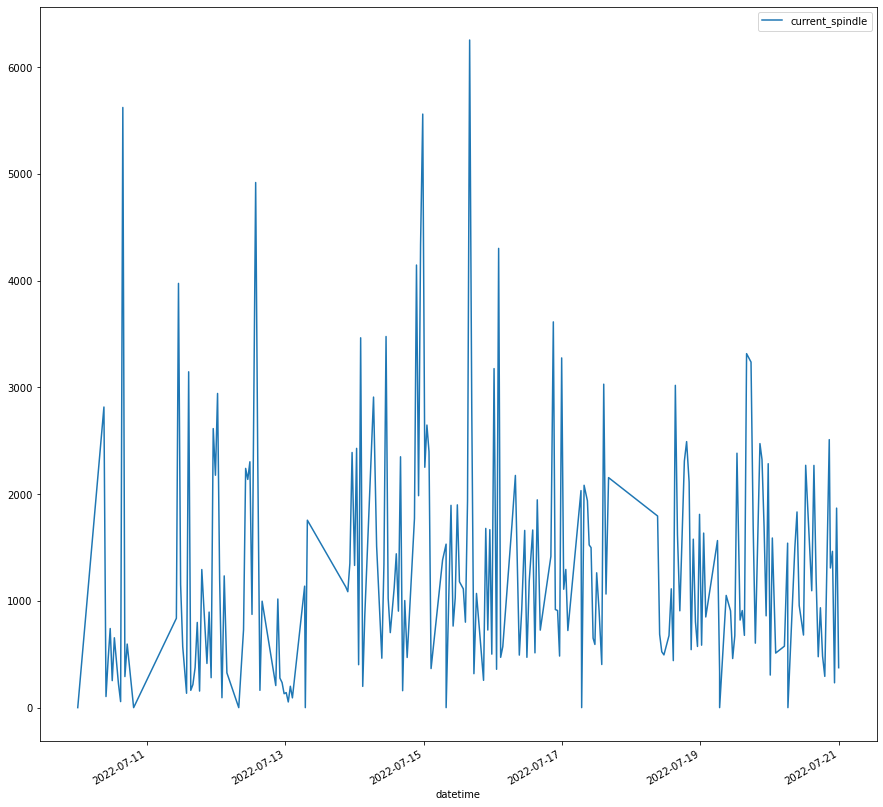

In [72]:
lag_df_start.plot()

## tool9 시작, 끝 지점 기준 - 일관된 형태로 나타남

In [73]:
#shot_list = [5774, 5775.0,5776.0, 5777.0]
shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']

#하나의 shot에서 상위 두개의 값이 항상 시작과 끝을 표시하는 값이라는 것은 검증하지 못함
#경험적으로 봤을 때 만족

In [74]:
shot_df = shot_df.sort_index()

In [75]:
#시작과 끝만 나타냄(가장 많이 튄 두개의 값)
shot_df

value
2022-07-10 08:44:36  5707.0
2022-07-10 08:51:32  6901.0
2022-07-10 09:27:31  5059.5
2022-07-10 09:34:26  5117.5
2022-07-10 10:12:40  6096.0
...                     ...
2022-07-20 22:16:52  6437.5
2022-07-20 22:52:40  5800.0
2022-07-20 22:59:59  6942.0
2022-07-20 23:35:36  4718.2
2022-07-20 23:42:55  5843.0

[410 rows x 1 columns]

In [76]:
shot_df_start = shot_df.iloc[::2,:]
shot_df_end = shot_df.iloc[1::2,:]

<AxesSubplot:>

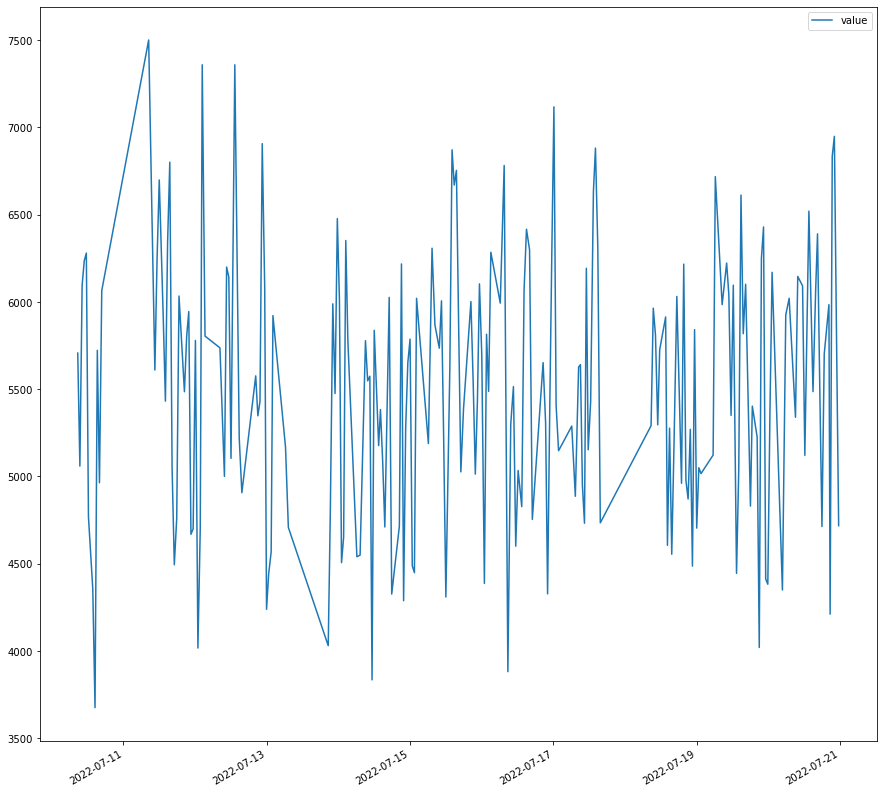

In [77]:
shot_df_start.plot()

In [78]:
shot_df_start.index

DatetimeIndex(['2022-07-10 08:44:36', '2022-07-10 09:27:31',
               '2022-07-10 10:12:40', '2022-07-10 10:55:09',
               '2022-07-10 11:37:10', '2022-07-10 12:19:52',
               '2022-07-10 13:46:31', '2022-07-10 14:31:57',
               '2022-07-10 15:17:52', '2022-07-10 16:01:04',
               ...
               '2022-07-20 16:30:55', '2022-07-20 17:22:25',
               '2022-07-20 18:00:02', '2022-07-20 18:46:05',
               '2022-07-20 20:20:07', '2022-07-20 20:44:05',
               '2022-07-20 21:26:48', '2022-07-20 22:09:33',
               '2022-07-20 22:52:40', '2022-07-20 23:35:36'],
              dtype='datetime64[ns]', length=205, freq=None)

In [79]:
shot_df_reset = shot_df_start.reset_index()

In [80]:
len(shot_df_reset)

205

In [81]:
#time_diff = pd.DataFrame()
time_diff = []
for i in range(0,len(shot_df_reset)-1):
    time_diff.append((pd.Timestamp(shot_df_reset['index'][i+1]) - pd.Timestamp(shot_df_reset['index'][i])))

timediff_df = pd.DataFrame(time_diff)

In [82]:
timediff_df.median()

0   0 days 00:44:36.500000
dtype: timedelta64[ns]

In [83]:
timediff_df.columns = ['interval']

In [84]:
timediff_df = pd.DataFrame(timediff_df['interval'].dt.total_seconds()//60)

In [85]:
timediff_df['interval'].unique()

array([  42.,   45.,   86.,   43.,   46.,  942.,  124.,   44.,   79.,
         48.,  108.,   41.,   49.,   47.,   39.,   55.,  300.,   90.,
         76.,   88.,   53.,  278.,   36.,   50.,   35.,  252.,   56.,
        801.,  180.,   64.,  153.,  237.,   73.,   57.,   80.,  148.,
         40.,   52.,  189.,   78.,   74.,   54.,   61.,  216.,  264.,
         71.,   66.,   37., 1020.,  119.,   94.,  243.,  137.,   65.,
         96.,  207.,   67.,   68.,  126.,   81.,   82.,   51.,   23.])

In [86]:
timediff_df['interval'].value_counts()

44.0      35
42.0      27
43.0      23
45.0      11
46.0       9
49.0       6
36.0       5
41.0       5
37.0       4
48.0       4
39.0       4
55.0       3
96.0       3
50.0       3
88.0       3
53.0       3
47.0       3
94.0       2
54.0       2
108.0      2
40.0       2
57.0       2
90.0       2
73.0       2
82.0       1
216.0      1
264.0      1
71.0       1
66.0       1
51.0       1
68.0       1
1020.0     1
119.0      1
243.0      1
137.0      1
65.0       1
81.0       1
126.0      1
207.0      1
67.0       1
61.0       1
237.0      1
74.0       1
252.0      1
86.0       1
942.0      1
124.0      1
79.0       1
300.0      1
76.0       1
278.0      1
35.0       1
56.0       1
78.0       1
801.0      1
180.0      1
64.0       1
153.0      1
80.0       1
148.0      1
52.0       1
189.0      1
23.0       1
Name: interval, dtype: int64

In [87]:
shot_df_start.resample('H').mean()

value
2022-07-10 08:00:00  5707.00
2022-07-10 09:00:00  5059.50
2022-07-10 10:00:00  6165.75
2022-07-10 11:00:00  6280.00
2022-07-10 12:00:00  4768.50
...                      ...
2022-07-20 19:00:00      NaN
2022-07-20 20:00:00  5097.80
2022-07-20 21:00:00  6834.60
2022-07-20 22:00:00  6374.40
2022-07-20 23:00:00  4718.20

[256 rows x 1 columns]

<AxesSubplot:>

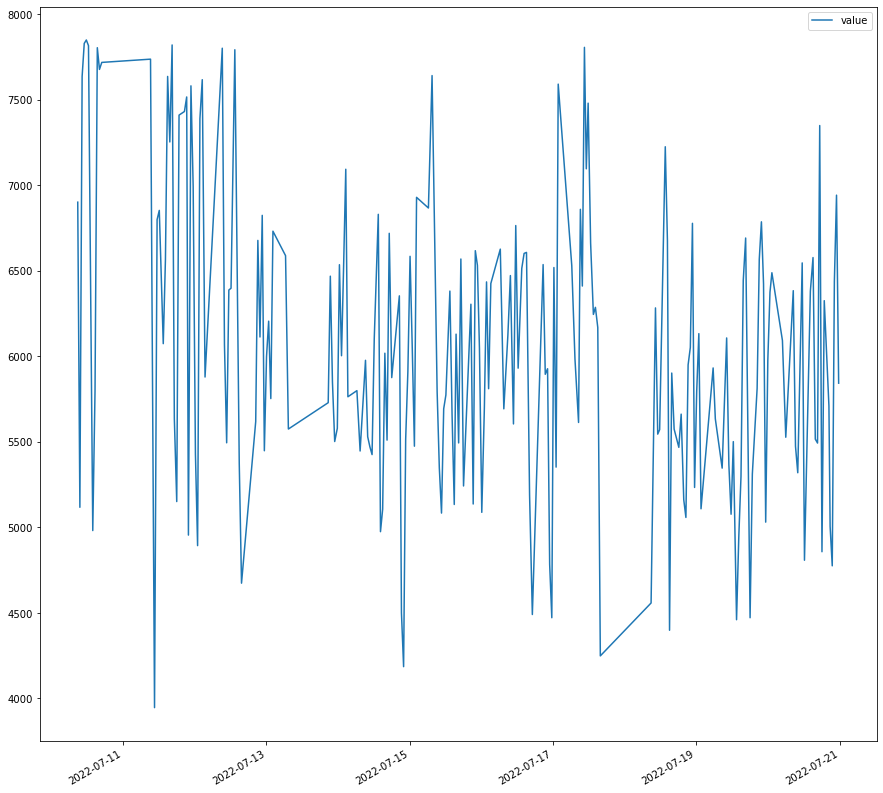

In [88]:
shot_df_end.plot()

<AxesSubplot:xlabel='datetime'>

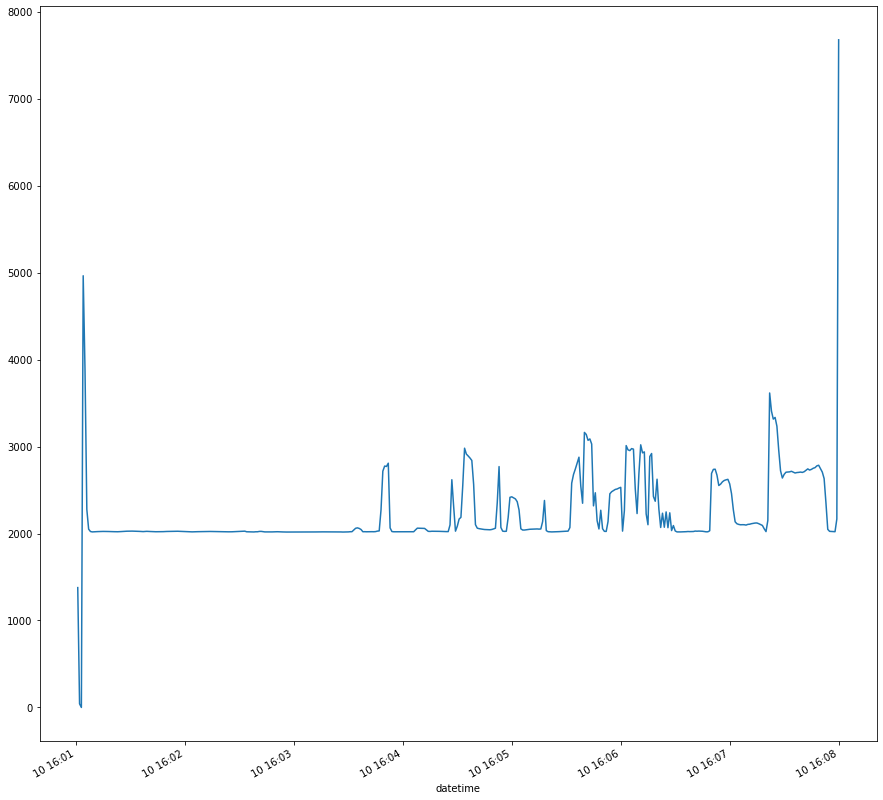

In [89]:
(df_VL04_Tool9[df_VL04_Tool9['shot_no'] == 5783]['current_spindle'].sort_values()).plot()

Text(0.5, 1.0, 'fourth change')

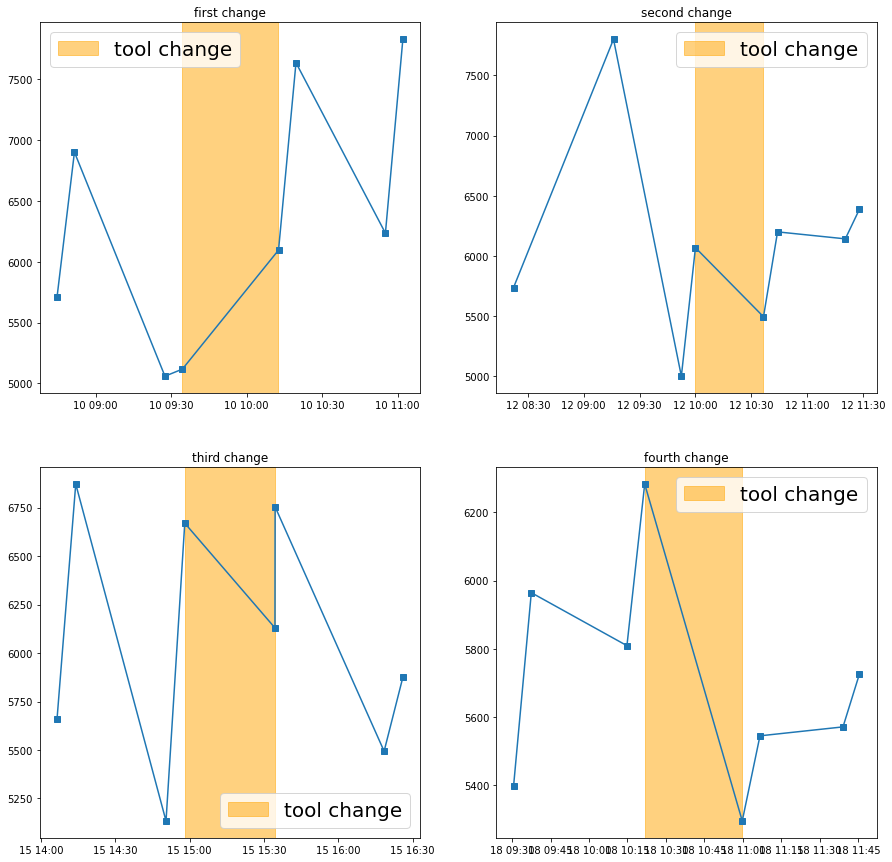

In [90]:
fig, axes = plt.subplots(2,2)

shot_list = [5774, 5775.0,5776.0, 5777.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[0][0].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[0][0].axvspan('2022-07-10 09:34:27', '2022-07-10 10:12:36', color = 'orange', alpha = 0.5, label = 'tool change')
axes[0][0].legend(fontsize = 20)
axes[0][0].set_title("first change")

#shot_list = [5807.0,5808,5809,5810, 5811.0,5812.0, 5813.0,5814,5815,5816]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_list = [5810, 5811.0,5812.0, 5813]
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[0][1].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[0][1].axvspan('2022-07-12 10:00:01','2022-07-12 10:36:31', color = 'orange', alpha = 0.5, label = 'tool change')
axes[0][1].legend(fontsize = 20)
axes[0][1].set_title("second change")

#hot_list = [5870,5871,5872, 5873, 5874.0,5875.0, 5876.0, 5877, 5878, 5879]
shot_list = [ 5873, 5874.0,5875.0, 5876.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
#shot_df.sort_index().plot(marker='s')
axes[1][0].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[1][0].axvspan('2022-07-15 14:58:01 ','2022-07-15 15:34:25', color = 'orange', alpha = 0.5, label = 'tool change')
axes[1][0].legend(fontsize = 20)
axes[1][0].set_title("third change")
#axes[1][0].xticks(fontsize = 20, rotation = 45)

#shot_list = [5921,5922,5923,5924, 5925.0,5926.0, 5927.0,5928,5929,5930]
shot_list = [5924, 5925.0,5926.0, 5927.0]
#, 5810, 5811, 5812, 5813, 5873, 5874, 5875, 5876, 5924, 5925, 5926, 5927
#shot_list = df_VL04_Tool9['shot_no'].unique()
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    #a = df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]
    a = (df_VL04_Tool9[df_VL04_Tool9['shot_no'] == shot_idx]['current_spindle'].sort_values())[-2:]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df.columns = ['value']
axes[1][1].plot(shot_df.sort_index().index, shot_df['value'],marker='s')
axes[1][1].axvspan('2022-07-18 10:21:43' ,'2022-07-18 10:59:42', color = 'orange', alpha = 0.5, label = 'tool change')
axes[1][1].legend(fontsize = 20)
axes[1][1].set_title("fourth change")

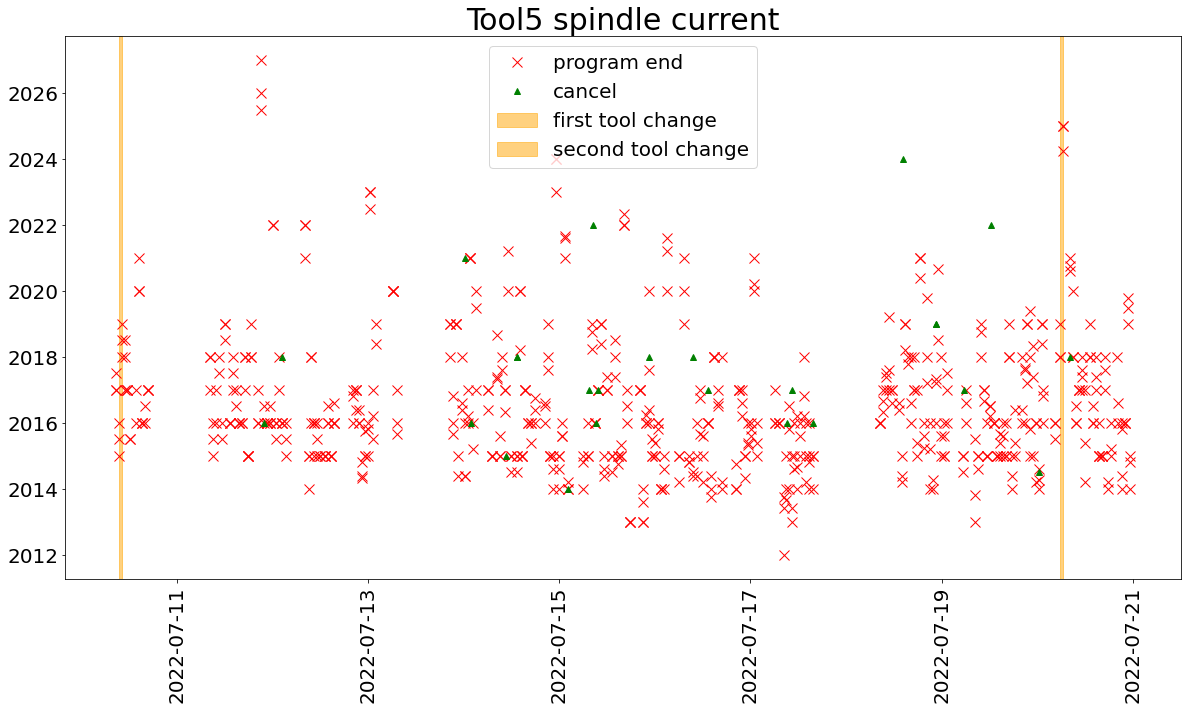

In [91]:
df_VL04_Tool5_cancel = df_VL04_Tool5[df_VL04_Tool5['tool_state'] == '취소']
df_VL04_Tool5_end = df_VL04_Tool5[df_VL04_Tool5['tool_state'] == '종료']

plt.figure(figsize = (20,10))
#plt.plot(df_VL04_Tool5['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_cancel['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_end['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = min(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
plt.axvspan('2022-07-10 09:27:27', '2022-07-10 10:05:18', color = 'orange', alpha = 0.5, label = 'first tool change')
plt.axvspan('2022-07-20 05:52:36', '2022-07-20 06:37:11', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 spindle current', fontsize = 30)
plt.show()

In [92]:
df_VL04_Tool5['tool_state'].unique()

array(['취소', '가공', '종료'], dtype=object)

In [93]:
df_VL04_Tool5[df_VL04_Tool5['tool_state'] == "취소"]['current_spindle']

datetime
2022-07-10 08:37:14    2017.0
2022-07-10 08:37:15    2017.0
2022-07-10 08:37:16    2017.5
2022-07-10 09:20:09    2016.0
2022-07-10 09:20:10    2015.5
                        ...  
2022-07-20 22:44:49    2019.8
2022-07-20 22:44:50    2019.0
2022-07-20 23:27:44    2015.0
2022-07-20 23:27:45    2014.8
2022-07-20 23:27:46    2014.0
Name: current_spindle, Length: 642, dtype: float64

* tool5는 취소 상태일때 spindle current 값이 0이 아니다.(tool1은 0)

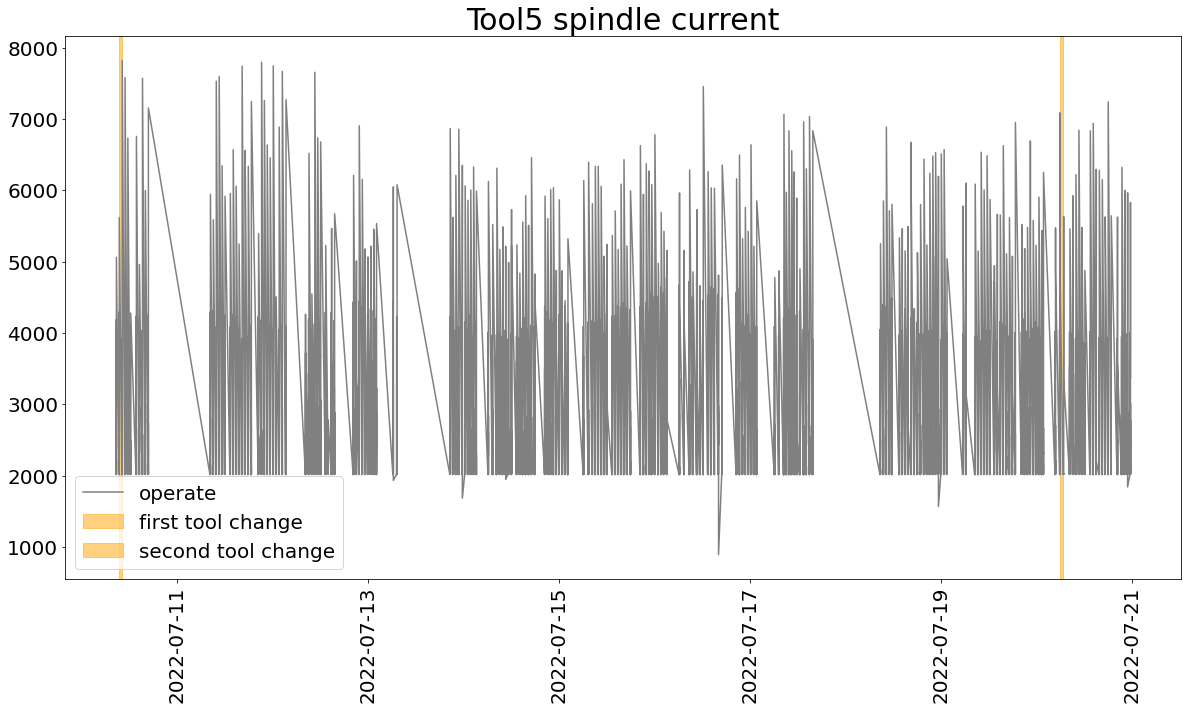

In [94]:
df_VL04_Tool5_cancel = df_VL04_Tool5[df_VL04_Tool5['tool_state'] == '취소']
df_VL04_Tool5_end = df_VL04_Tool5[df_VL04_Tool5['tool_state'] == '종료']

plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5['current_spindle'], label = 'operate', color = 'gray')
#plt.plot(df_VL04_Tool5_cancel['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
#plt.plot(df_VL04_Tool5_end['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = min(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
plt.axvspan('2022-07-10 09:27:27', '2022-07-10 10:05:18', color = 'orange', alpha = 0.5, label = 'first tool change')
plt.axvspan('2022-07-20 05:52:36', '2022-07-20 06:37:11', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 spindle current', fontsize = 30)
plt.show()

In [95]:
df_VL04_Tool5_mod1 = df_VL04_Tool5.loc['2022-07-10 10:05:18':'2022-07-20 05:52:36']

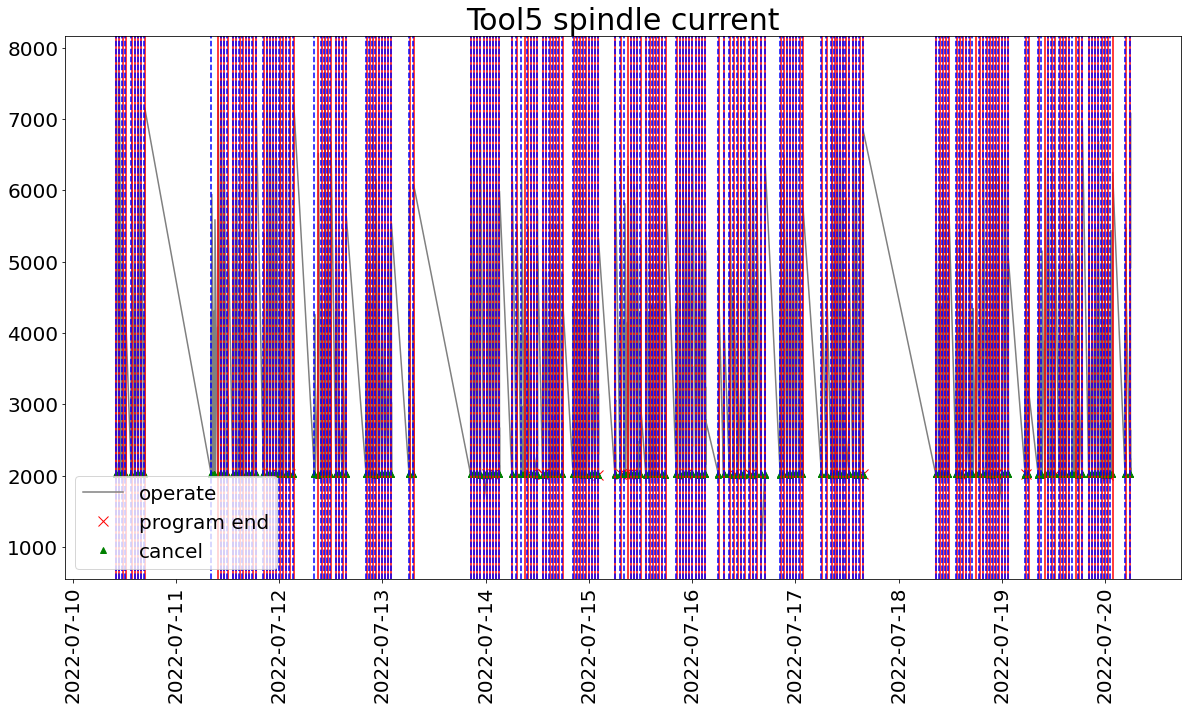

In [96]:
df_VL04_Tool5_mod1_cancel = df_VL04_Tool5_mod1[df_VL04_Tool5_mod1['tool_state'] == '취소']
df_VL04_Tool5_mod1_end = df_VL04_Tool5_mod1[df_VL04_Tool5_mod1['tool_state'] == '종료']

plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5_mod1['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_mod1_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_mod1_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
for idx in range(len(df_VL04_Tool5_mod1['shot_no'].unique())):
    plt.axvline(x = max(df_VL04_Tool5_mod1[(df_VL04_Tool5_mod1['shot_no'] == df_VL04_Tool5_mod1['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
for idx2 in range(len(df_VL04_Tool5_mod1['shot_no'].unique())):
    plt.axvline(x = min(df_VL04_Tool5_mod1[(df_VL04_Tool5_mod1['shot_no'] == df_VL04_Tool5_mod1['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
# plt.axvspan('2022-07-10 09:20:10', '2022-07-10 09:54:04', color = 'orange', alpha = 0.5, label = 'first tool change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 spindle current', fontsize = 30)
plt.show()

In [97]:
df_VL04_Tool5_mod1

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 10:05:18  2022-07-10   10      5     18        500.0   5776.0   
2022-07-10 10:05:19  2022-07-10   10      5     19        500.0   5776.0   
2022-07-10 10:05:20  2022-07-10   10      5     20        500.0   5776.0   
2022-07-10 10:05:20  2022-07-10   10      5     20        505.0   5776.0   
2022-07-10 10:05:21  2022-07-10   10      5     21        505.0   5776.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 05:52:32  2022-07-20    5     52     32        505.0   5968.0   
2022-07-20 05:52:33  2022-07-20    5     52     33        505.0   5968.0   
2022-07-20 05:52:34  2022-07-20    5     52     34        505.0   5968.0   
2022-07-20 05:52:35  2022-07-20    5     52     35        505.0   5968.0   
2022-07-20 05:52:36  2022-07-20    5     52     36        505.0   5968.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-10 10:05:18       0.00       0.00          2019.00      203.0   
2022-07-10 10:05:19       0.00       0.00          2018.50      204.5   
2022-07-10 10:05:20       0.00       0.00          2018.00      206.0   
2022-07-10 10:05:20       0.00       0.00          2018.00      205.0   
2022-07-10 10:05:21       0.00       0.00          2018.50      205.5   
...                        ...        ...              ...        ...   
2022-07-20 05:52:32     390.00    1462.20          2022.40       91.2   
2022-07-20 05:52:33     352.40    1237.20          2021.60       90.4   
2022-07-20 05:52:34     222.20      49.20          2021.00       98.6   
2022-07-20 05:52:35       9.25      11.25          7089.25       91.5   
2022-07-20 05:52:36       2.00       9.00          4921.00       92.0   

                      pos_x_1   pos_z_1     rpm    feed  load_1  servo_load_x  \
datetime                                                                        
2022-07-10 10:05:18  652903.5  483629.5  300.00     0.0    1.00          4.00   
2022-07-10 10:05:19  640000.0  483830.0  299.50  6000.0    1.00          5.00   
2022-07-10 10:05:20  640000.0  483830.0  300.00     0.0    1.00          5.00   
2022-07-10 10:05:20  680873.0  397290.0  299.00     0.0    1.00         20.00   
2022-07-10 10:05:21  560873.5  337289.5  299.50  7071.0    0.50         18.50   
...                       ...       ...     ...     ...     ...           ...   
2022-07-20 05:52:32  391079.8  323600.2  299.40  7071.0    0.20         20.00   
2022-07-20 05:52:33  561746.4  394498.4  299.60  5489.0    0.40         19.00   
2022-07-20 05:52:34  671942.8  398623.0  297.00  2000.0   23.80         11.60   
2022-07-20 05:52:35  683540.0  398623.0  176.75     0.0  120.25          5.25   
2022-07-20 05:52:36  683540.0  398623.0    7.00     0.0    0.00          5.00   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 10:05:18         74.50             4.00           -74.50     5   
2022-07-10 10:05:19         74.00             5.00           -74.00     5   
2022-07-10 10:05:20         73.00             5.00           -73.00     5   
2022-07-10 10:05:20         56.00           -20.00           -56.00     5   
2022-07-10 10:05:21         56.00           -18.50           -56.00     5   
...                           ...              ...              ...   ...   
2022-07-20 05:52:32         79.00            20.00           -79.00     5   
2022-07-20 05:52:33         74.20            19.00           -74.20     5   
2022-07-20 05:52:34         73.60            11.60           -73.60     5   
2022-07-20 05:52:35         72.25             5.25           -72.25     5   
2022-07-20 05:52:36         72.00             5.00           -72.00     5   

                    tool_state  

In [98]:
df_VL04_Tool5_mod1['date'].unique()

array(['2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13',
       '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17',
       '2022-07-18', '2022-07-19', '2022-07-20'], dtype=object)

In [99]:
len(df_VL04_Tool5_mod1['shot_no'].unique())

186

In [100]:
df_VL04_Tool5_mod1

date hour minute second  tool_number  shot_no  \
datetime                                                                   
2022-07-10 10:05:18  2022-07-10   10      5     18        500.0   5776.0   
2022-07-10 10:05:19  2022-07-10   10      5     19        500.0   5776.0   
2022-07-10 10:05:20  2022-07-10   10      5     20        500.0   5776.0   
2022-07-10 10:05:20  2022-07-10   10      5     20        505.0   5776.0   
2022-07-10 10:05:21  2022-07-10   10      5     21        505.0   5776.0   
...                         ...  ...    ...    ...          ...      ...   
2022-07-20 05:52:32  2022-07-20    5     52     32        505.0   5968.0   
2022-07-20 05:52:33  2022-07-20    5     52     33        505.0   5968.0   
2022-07-20 05:52:34  2022-07-20    5     52     34        505.0   5968.0   
2022-07-20 05:52:35  2022-07-20    5     52     35        505.0   5968.0   
2022-07-20 05:52:36  2022-07-20    5     52     36        505.0   5968.0   

                     current_x  current_z  current_spindle  vibration  \
datetime                                                                
2022-07-10 10:05:18       0.00       0.00          2019.00      203.0   
2022-07-10 10:05:19       0.00       0.00          2018.50      204.5   
2022-07-10 10:05:20       0.00       0.00          2018.00      206.0   
2022-07-10 10:05:20       0.00       0.00          2018.00      205.0   
2022-07-10 10:05:21       0.00       0.00          2018.50      205.5   
...                        ...        ...              ...        ...   
2022-07-20 05:52:32     390.00    1462.20          2022.40       91.2   
2022-07-20 05:52:33     352.40    1237.20          2021.60       90.4   
2022-07-20 05:52:34     222.20      49.20          2021.00       98.6   
2022-07-20 05:52:35       9.25      11.25          7089.25       91.5   
2022-07-20 05:52:36       2.00       9.00          4921.00       92.0   

                      pos_x_1   pos_z_1     rpm    feed  load_1  servo_load_x  \
datetime                                                                        
2022-07-10 10:05:18  652903.5  483629.5  300.00     0.0    1.00          4.00   
2022-07-10 10:05:19  640000.0  483830.0  299.50  6000.0    1.00          5.00   
2022-07-10 10:05:20  640000.0  483830.0  300.00     0.0    1.00          5.00   
2022-07-10 10:05:20  680873.0  397290.0  299.00     0.0    1.00         20.00   
2022-07-10 10:05:21  560873.5  337289.5  299.50  7071.0    0.50         18.50   
...                       ...       ...     ...     ...     ...           ...   
2022-07-20 05:52:32  391079.8  323600.2  299.40  7071.0    0.20         20.00   
2022-07-20 05:52:33  561746.4  394498.4  299.60  5489.0    0.40         19.00   
2022-07-20 05:52:34  671942.8  398623.0  297.00  2000.0   23.80         11.60   
2022-07-20 05:52:35  683540.0  398623.0  176.75     0.0  120.25          5.25   
2022-07-20 05:52:36  683540.0  398623.0    7.00     0.0    0.00          5.00   

                     servo_load_z  servo_current_x  servo_current_z  tool  \
datetime                                                                    
2022-07-10 10:05:18         74.50             4.00           -74.50     5   
2022-07-10 10:05:19         74.00             5.00           -74.00     5   
2022-07-10 10:05:20         73.00             5.00           -73.00     5   
2022-07-10 10:05:20         56.00           -20.00           -56.00     5   
2022-07-10 10:05:21         56.00           -18.50           -56.00     5   
...                           ...              ...              ...   ...   
2022-07-20 05:52:32         79.00            20.00           -79.00     5   
2022-07-20 05:52:33         74.20            19.00           -74.20     5   
2022-07-20 05:52:34         73.60            11.60           -73.60     5   
2022-07-20 05:52:35         72.25             5.25           -72.25     5   
2022-07-20 05:52:36         72.00             5.00           -72.00     5   

                    tool_state  

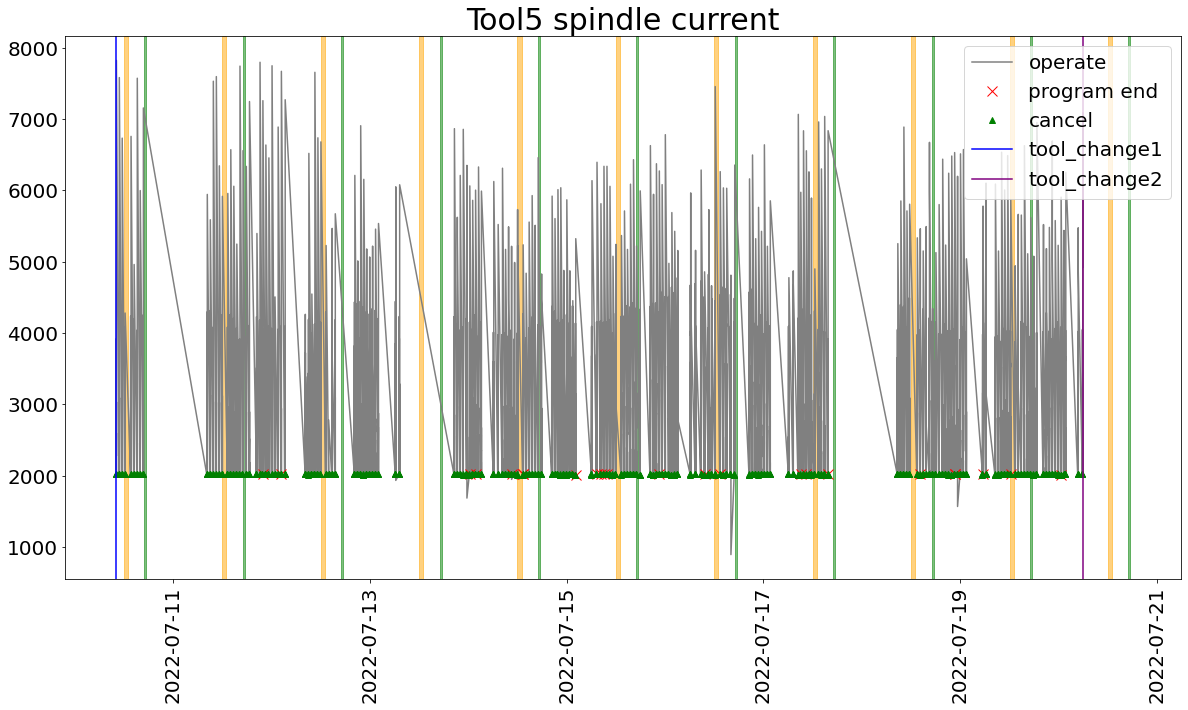

In [101]:
date_list = df_VL04_Tool5_mod1['date'].unique()
df_VL04_Tool5_mod1_cancel = df_VL04_Tool5_mod1[df_VL04_Tool5_mod1['tool_state'] == '취소']
df_VL04_Tool5_mod1_end = df_VL04_Tool5_mod1[df_VL04_Tool5_mod1['tool_state'] == '종료']

plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5_mod1['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_mod1_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_mod1_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline(pd.to_datetime('2022-07-10 10:05:18'), color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline(pd.to_datetime('2022-07-20 05:52:36'), color = 'purple', label = 'tool_change2', linestyle = 'solid')

#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 spindle current', fontsize = 30)
plt.show()

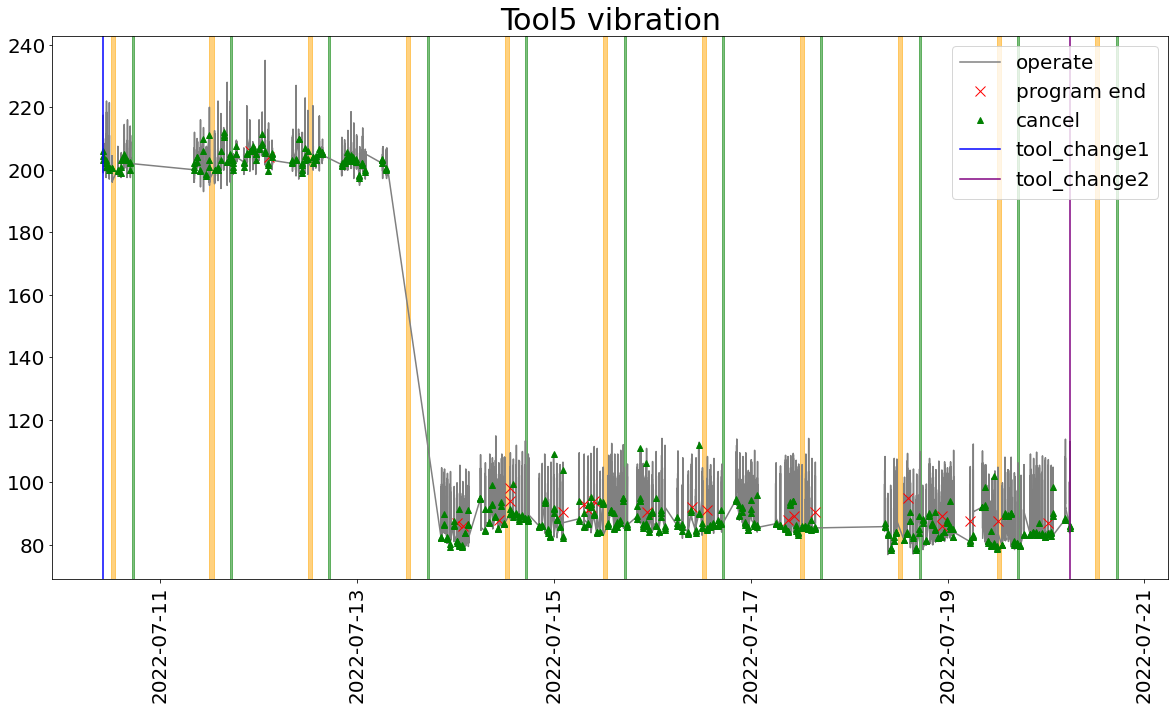

In [102]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5_mod1['vibration'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_mod1_end['vibration'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_mod1_cancel['vibration'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline(pd.to_datetime('2022-07-10 10:05:18'), color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline(pd.to_datetime('2022-07-20 05:52:36'), color = 'purple', label = 'tool_change2', linestyle = 'solid')

#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 vibration', fontsize = 30)
plt.show()

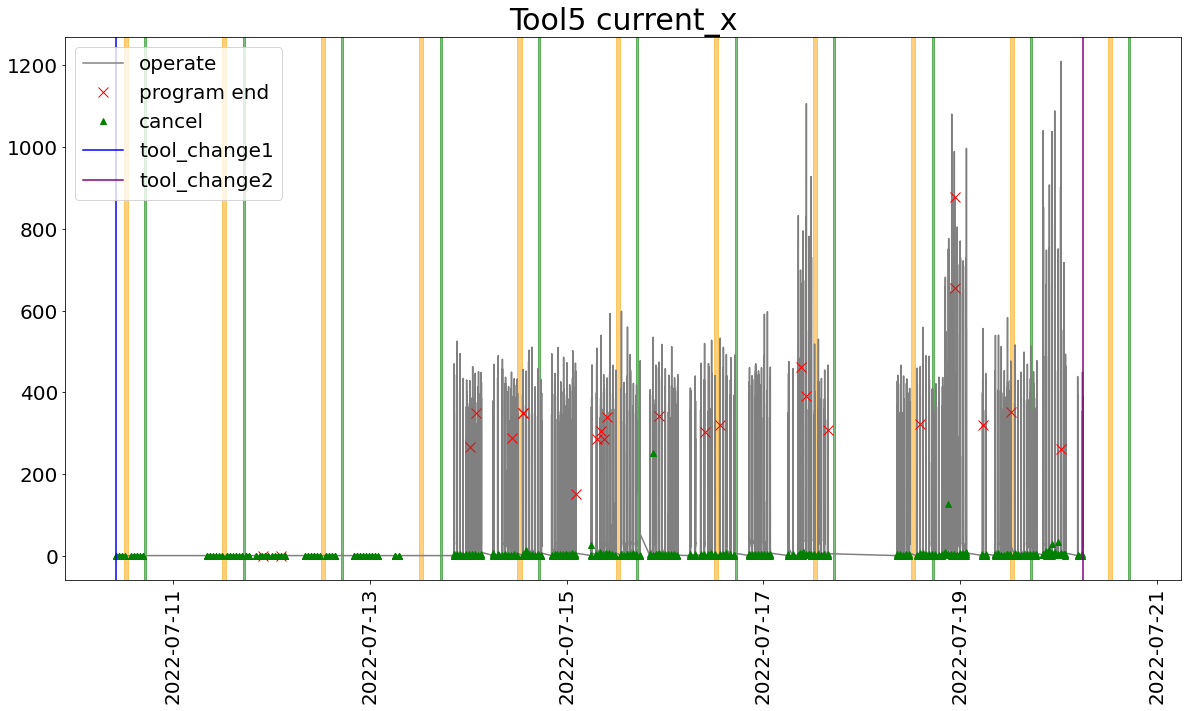

In [103]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5_mod1['current_x'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_mod1_end['current_x'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_mod1_cancel['current_x'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline(pd.to_datetime('2022-07-10 10:05:18'), color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline(pd.to_datetime('2022-07-20 05:52:36'), color = 'purple', label = 'tool_change2', linestyle = 'solid')

#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 current_x', fontsize = 30)
plt.show()

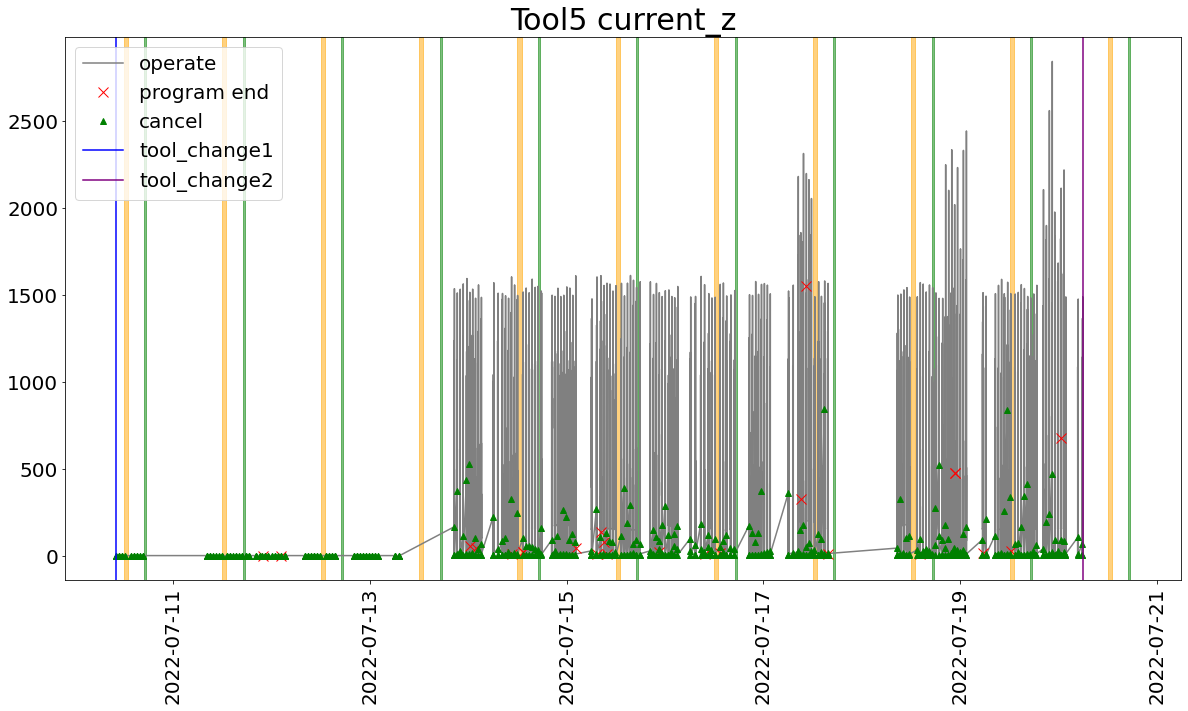

In [104]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool5_mod1['current_z'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool5_mod1_end['current_z'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool5_mod1_cancel['current_z'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline(pd.to_datetime('2022-07-10 10:05:18'), color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline(pd.to_datetime('2022-07-20 05:52:36'), color = 'purple', label = 'tool_change2', linestyle = 'solid')

#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool5 current_z', fontsize = 30)
plt.show()

In [105]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

current_seasonal_decompose = seasonal_decompose(df_VL04_Tool1_mod2['current_spindle'], model = 'Additive', freq = 840)

# observed data
plt.figure(figsize = (20,15))
plt.subplot(4,1,1)
current_seasonal_decompose.observed.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Observed', fontsize = 20)
plt.title('Observed', fontsize = 20)

# trend factor
plt.subplot(4,1,2)
current_seasonal_decompose.trend.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Trend', fontsize = 20)

# seasonal factor
plt.subplot(4,1,3)
current_seasonal_decompose.seasonal.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Seasonal', fontsize = 20)

# seasonal factor
plt.subplot(4,1,4)
current_seasonal_decompose.resid.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Residual', fontsize = 20)

plt.tight_layout()
plt.show()

NameError: name 'df_VL04_Tool1_mod2' is not defined

In [ ]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

current_seasonal_decompose = seasonal_decompose(df_VL04_Tool1_mod2['vibration'], model = 'Additive', freq = 840)

# observed data
plt.figure(figsize = (20,15))
plt.subplot(4,1,1)
current_seasonal_decompose.observed.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Observed', fontsize = 20)
plt.title('Observed', fontsize = 20)

# trend factor
plt.subplot(4,1,2)
current_seasonal_decompose.trend.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Trend', fontsize = 20)

# seasonal factor
plt.subplot(4,1,3)
current_seasonal_decompose.seasonal.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Seasonal', fontsize = 20)

# seasonal factor
plt.subplot(4,1,4)
current_seasonal_decompose.resid.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Residual', fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
# 시계열 current_spindle 분해값 출력
decompose_ob_tr = pd.concat([current_seasonal_decompose.observed, current_seasonal_decompose.trend],axis = 1)
decompose_ob_tr_ss = pd.concat([decompose_ob_tr, current_seasonal_decompose.seasonal], axis = 1)
decompose_ob_tr_ss_rs = pd.concat([decompose_ob_tr_ss, current_seasonal_decompose.resid], axis = 1)
decompose_ob_tr_ss_rs.head(50)

In [ ]:
df_VL04_Tool1_mod3 = df_VL04_Tool1_mod2.reset_index()

In [ ]:
df_VL04_Tool1_mod3

In [ ]:
df_VL04_Tool1_mod3.drop_duplicates(['datetime'], keep = 'first',inplace = True)
df_VL04_Tool1_mod3 = df_VL04_Tool1_mod3.set_index('datetime')
df_VL04_Tool1_mod3_para = df_VL04_Tool1_mod3[['current_spindle','vibration', 'rpm',	'feed',	'load_1',	'servo_load_x',	'servo_load_z',	'servo_current_x',	'servo_current_z']]
df_VL04_Tool1_mod3_info = df_VL04_Tool1_mod3[['tool_number', 'shot_no', 'tool_state']]

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# parameter_scaler = pd.DataFrame(scaler.fit_transform(df_VL04_Tool1_mod3_para), columns = df_VL04_Tool1_mod3_para.columns, index = df_VL04_Tool1_mod3.index)
# parameter_scaler = parameter_scaler.reset_index()
# spindle_scaler = parameter_scaler[['datetime','current_spindle']]
# vibration_scaler = parameter_scaler['vibration']
# rpm_scaler = parameter_scaler['rpm']
# feed_scaler = parameter_scaler['feed']
# load1_scaler = parameter_scaler['load_1']
# servo_load_x_scaler = parameter_scaler['servo_load_x']
# servo_load_z_scaler = parameter_scaler['servo_load_z']
# servo_current_x_scaler = parameter_scaler['servo_current_x']
# servo_current_z_scaler = parameter_scaler['servo_current_z']

# anomaly detection

1. Statistical Anomaly Detection Techniques
 - Gaussian Model Based
 - Histogram Based
2. Cluster based technique
3. Support Vector Machines based techniques
4. Tree based techniques
 - Isolation Forest를 활용한 이상탐지 수행

# 1. Statistical technique

# 2. Cluster based technique

In [ ]:
from sklearn.cluster import KMeans

#Elbow 시각화
X1 = df_VL04_Tool1_mod3[['current_spindle']].values

SST= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    SST.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), SST, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('SST')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X1)

In [ ]:
df_VL04_Tool1_mod3['k-means_cluster'] = kmeans.predict(X1)
df_VL04_Tool1_mod3['k-means_cluster'].value_counts()

In [ ]:
plt.plot(df_VL04_Tool1_mod3['current_spindle'])

# 3. Support Vector Machines based techniques\
One class SVM

In [ ]:
df_VL04_Tool1_mod3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

data = df_VL04_Tool1_mod3[['current_spindle', 'current_x', 'current_z']]
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
st_scaled_data = standard_scaler.fit_transform(data)
mm_scaled_data = minmax_scaler.fit_transform(data)

model = OneClassSVM(nu=0.005)
scaled_data = pd.DataFrame(mm_scaled_data)
model.fit(scaled_data)
df_VL04_Tool1_mod3['SVM_anomaly'] = pd.Series(model.predict(scaled_data), index = df_VL04_Tool1_mod3.index)
df_VL04_Tool1_mod3['SVM_anomaly'] = df_VL04_Tool1_mod3['SVM_anomaly'].map({1:0, -1:1})

In [ ]:
df_VL04_Tool1_mod3['SVM_anomaly'].value_counts()

In [ ]:
a.index

In [ ]:
a = df_VL04_Tool1_mod3.query('SVM_anomaly == 1')
a.reset_index(inplace = True)

plt.plot(df_VL04_Tool1_mod3['current_spindle'])
plt.scatter(a['datetime'], a['current_spindle'], color = 'red')

# 4. Tree based techniques
IsolationForest (https://partrita.github.io/posts/isolation-forest/)
1. 밀도기반으로 이상 탐지하는 Isolation forest
2. Isolation forest는 기본적으로 데이터셋을 의사결정나무 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 의사결정 나무 상단부에서 분리할수 있음
3. 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적음

In [ ]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(random_state = 0, contamination = 0.0001, n_estimators = 200, max_samples = 0.5)
IF.fit(df_VL04_Tool1_mod3[['current_spindle']])

# Outlier column 생성
df_VL04_Tool1_mod3['Isolation_anomaly'] = pd.Series(IF.predict(df_VL04_Tool1_mod3[['current_spindle']]), index = df_VL04_Tool1_mod3.index).apply(lambda x: 1 if x == -1 else 0)

In [ ]:
df_VL04_Tool1_mod3['Outliers'].value_counts()

In [ ]:
# Get Anomaly Score
score = IF.decision_function(df_VL04_Tool1_mod3[['current_spindle']])

# New Anomaly Score column
df_VL04_Tool1_mod3['Score'] = score
df_VL04_Tool1_mod3.head()

In [ ]:
x = df_VL04_Tool1_mod3.query('Outliers == 1').index
y = df_VL04_Tool1_mod3.loc[x]['current_spindle']

In [ ]:
df_VL04_Tool1_mod3.query('Outliers == 1')['current_spindle']

In [ ]:
y

In [ ]:
date_list = df_VL04_Tool1_mod3['date'].unique()
df_VL04_Tool1_mod3_cancel = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '취소']
df_VL04_Tool1_mod3_end = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '종료']
df_VL04_Tool1_mod3_change = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '공구교체']


plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod3['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod3_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'brown', markersize = 10)
plt.plot(df_VL04_Tool1_mod3_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
plt.scatter(x, y,label = 'Outlier', color = 'red', s = 10)
# for idx in range(len(df_VL04_Tool1_mod3['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod3[(df_VL04_Tool1_mod3['shot_no'] == df_VL04_Tool1_mod3['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod3['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod3[(df_VL04_Tool1_mod3['shot_no'] == df_VL04_Tool1_mod3['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

In [ ]:
plt.plot(df_VL04_Tool1_mod3['current_spindle'])
plt.plot(x, y,label = 'Outlier', color = 'red')
plt.legend()